# Predicting used cars prices using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting the right price for a used car, to potentially help people who are looking to buy one not to overpay for it

The following approach will be taken:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

This approach is itertive and it is possible at any point to go back and work further on a prevouis step in the process.

## 1. Problem Definition
In a statment
> Given the details and specs of a used car, is it possible to predict a fair price for it?

## 2. Data
The dataset that came from Kaggle but originally it was scraped off Craigslist  
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data

# 3. Evaluation
> The model's effectiveness can be assessed through various metrics such as RMSE (Root Mean Squared Error), RMSLE (Root Mean Squared Log Error), MAE (Mean Absolute Error), R-squared etc. the model results will be considered good if it is able to accurately predict used cars prices within a 10% error margin.

# 4. Features
**Data Dictionary**:
1. **id** - entry id  this***
2. **url** - kisting URL
3. **region** - Craigslist region
4. **region_url** - region URL
5. **price** - entry price in Dollars
6. **year** - manufacturing year
7. **manufacturer** - manufacturer of vehicle
8. **model** - model of vehicle
9. **condition** - condition of vehecle
10. **cylinders** - number of cylinders
11. **fuel** - fuel type
12. **odometer** - miles travled by vehicle
13. **title_status** - title status of vehicle
14. **transmission** - transmission of vehicle
15. **VIN** - vehicle identification number   this***
16. **drive** - type of drive 
17. **size** - size of vehicle
18. **type** - generic type of vehicle
19. **paint_color** - color of vehicle
20. **image_url** - vehicle image URL
21. **description** - listed description of vehicle    this**
22. **county** - useless column left in by mistake **(will be dropped)**
23. **state** - state of listing
24. **lat** - latitude of listing    this***
25. **long** - longitude of listing    this***
26. **posting_date** - date of listing

## Importing the required tools

In [1]:
%matplotlib inline 
# Make plots appear inside the notebook

# EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import missingno as msno 

# Models from Scikit-Learn
import sklearn

# Model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

## Import & Anonymize Data

In [2]:
# Import the dataset
df = pd.read_csv("data/vehicles.csv", low_memory=False, parse_dates=["year"])

df.drop(columns=["VIN", "lat", "long", "url", "region_url", "image_url"], inplace=True)
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,county,state,posting_date
0,7222695916,prescott,6000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,7218891961,fayetteville,11900,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,7221797935,florida keys,21000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,7222270760,worcester / central MA,1500,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,7210384030,greensboro,4900,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019-01-01,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,NaN,wy,2021-04-04T03:21:31-0600
426876,7301591187,wyoming,30590,2020-01-01,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,NaN,wy,2021-04-04T03:21:29-0600
426877,7301591147,wyoming,34990,2020-01-01,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,NaN,wy,2021-04-04T03:21:17-0600
426878,7301591140,wyoming,28990,2018-01-01,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,NaN,wy,2021-04-04T03:21:11-0600


## Exploratory Data Analysis (EDA)

In [3]:
# Import the dataset
# df = pd.read_csv("data/vehicles.csv", low_memory=False, parse_dates=["year"])

### Methods

In [4]:
def visualize_distribution(df, column, label, logscale=False):
    """
    Plot the distribution of a spicific column in a dataframe
    """
    # Subplot of distribution
    fig, (ax0, ax1) = plt.subplots(nrows=2,
                                    ncols=1,
                                    figsize=(35, 30),
                                    sharex=False)

    # Add data to ax0
    red_square = dict(markerfacecolor="lightblue", marker="s")
    ax0.boxplot(df[column], vert=False, flierprops=red_square);
    # Add data to ax1
    ax1.hist(df[column], bins=6);

    # Customize ax0
    ax0.set_title(label="Boxplot ", fontsize=40);
    ax0.set_xlabel(label, fontsize=40)
    ax0.set_xscale('log')
    ax0.tick_params(axis="both", which="major", labelsize=20)

    #ax0.bar_label(fontsize=20)

    # Customize ax1    
    ax1.set_title(label="Histogram ", fontsize=40);
    ax1.set_xlabel(label, fontsize=40)
    
    if logscale:
        ax1.set_yscale('log')
    
    ax1.set_ylabel("Distribution", fontsize=30);
    ax1.tick_params(axis="both", which="major", labelsize=20)

    # Add a title to the figure
    fig.suptitle("The distribution of " + label, fontsize=50, fontweight="bold");

In [5]:
# Calculate the average price of cars for a given column
def calculate_average_price_by_column(column_name, df, items_num=None):
    """
    Calculate the average price of cars for a given column.
    
    Parameters:
        column_name (str): The name of the column to calculate the average against (e.g., 'price').
        df (DataFrame): DataFrame containing the car data with columns 'column_name' and 'price'.
        items_num (int, optional): The number of top categories to include in the calculation. If not specified, all categories will be included.
    """ 
    # Group by the specified column and calculate the mean price for each category
    avg_value = df.groupby(column_name)['price'].mean().sort_values(ascending=False)

    # Sort the average values in descending order and limit to the specified number of items
    if items_num is not None:
        avg_value = avg_value.nlargest(items_num)

    avg_value_dict = avg_value.to_dict()

    print(f"\033[1;35mBelow are the average prices per {column_name} values:\033[0m")
    # Iterate over the dictionary and print each value
    for category, price in avg_value.items():
        # Apply custom formatting as needed
        formatted_price = f"${price:.2f}"  # Format the price to two decimal places with a dollar sign
        print(f"\033[1;4;31m{category.capitalize()}\033[0m: \033[1;32m{formatted_price}\033[0m")

In [6]:
df.groupby("region")['price'].mean().sort_values(ascending=False)

region
frederick              4.914334e+06
delaware               3.205056e+06
humboldt county        2.902730e+06
modesto                1.401324e+06
knoxville              1.369993e+06
                           ...     
sioux city             9.649819e+03
southeast IA           9.624103e+03
klamath falls          9.550169e+03
west virginia (old)    9.423750e+03
siskiyou county        8.293855e+03
Name: price, Length: 404, dtype: float64

In [7]:
# Calculate the distribuation of the price per a column
def calculate_price_quartiles_by_column(column_name, df, items_num=None):
    """
    Calculate quartiles for each group in a specified column.
    
    Parameters:
        column_name (str): The name of the column to calculate quartiles for.
        df (DataFrame): DataFrame containing the data with the specified column.
    
    Returns:
        None
    """
    # Calculate quartiles for each group
    summary_stats = df.groupby(column_name)['price'].describe().sort_values(by='50%', ascending=False)
    
    # Limit to the specified number of items if items_num is provided
    if items_num is not None:
        summary_stats = summary_stats.nlargest(items_num, '50%')
    
    q1_values = summary_stats['25%']
    median_values = summary_stats['50%']
    q3_values = summary_stats['75%']

    # Print quartiles for each group
    print(f"\033[1;35mBelow are the Q1, Q2 (median), & Q3 values:")
    print(f"\033[1;31mQ1 (First Quartile):\033[0m represents the lower quartile, 25% of the data points are less than or equal to Q1")
    print(f"\033[1;31mQ2 (Median):\033[0m represents the middle quartile, dividing the dataset into two equal parts")
    print(f"\033[1;31mQ3 (Third Quartile):\033[0m represents the upper quartile, 75% of the data points are less than or equal to Q3\n")
    
    print(f"\033[1;3;4;35mPrice distribution per {column_name}:")
    for group, q1, median, q3 in zip(summary_stats.index, q1_values, median_values, q3_values):
        # Capitalize group only if it's a string
        if isinstance(group, str):
            group = group.capitalize()
            
        print(f"\033[1;4;31m{group}\033[0m: Q1: \033[1;32m{q1}\033[0m, Median: \033[1;32m{median}\033[0m, Q3: \033[1;32m{q3}\033[0m")

In [8]:
# Calculate the distribuation of numerical values
def calculate_numerical_quartiles(column_name, df):
    """
    Calculate quartiles for a specified column.
    
    Parameters:
        column_name (str): The name of the column to calculate quartiles for.
        df (DataFrame): DataFrame containing the data with the specified column.
    
    Returns:
        None
    """
    q1 = df[column_name].quantile(0.25)
    median = df[column_name].quantile(0.50)
    q3 = df[column_name].quantile(0.75)
 
    # Calculate IQR
    IQR = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Print quartiles for each group
    print(f"\033[1;35mBelow are the Q1, Q2 (median), & Q3 values:")
    print(f"\033[1;31mQ1 (First Quartile):\033[0m represents the lower quartile, 25% of the data points are less than or equal to Q1")
    print(f"\033[1;31mQ2 (Median):\033[0m represents the middle quartile, dividing the dataset into two equal parts")
    print(f"\033[1;31mQ3 (Third Quartile):\033[0m represents the upper quartile, 75% of the data points are less than or equal to Q3\n")
    
    print(f"\033[1;3;4;35mDistribution for {column_name}:\033[0m")    
    print(f"Lower bound: \033[1;32m{lower_bound}\033[0m, Q1: \033[1;32m{q1}\033[0m, Median: \033[1;32m{median}\033[0m, Q3: \033[1;32m{q3}\033[0m, Upper bound: \033[1;32m{upper_bound}\033[0m")

    return lower_bound, upper_bound

In [9]:
# Plot column values frequancy
def plot_column_frequancy(column_name, df, items_num=None):
    """
    Plot the frequancy of a specified column in a DataFrame using a bar chart.
    
    Parameters:
        column_name (str): The name of the column to plot the bar chart for.
        df (DataFrame): DataFrame containing the data.
        items_num (int): The number of categories to plot from the provided column in column_name. if not provided, items_num will be the count of the categories in the column
    Returns:
        None
    """
    # Group by the specified column and count the number of occurrences
    counts_per_category = df[column_name].value_counts()
    
    if items_num is None:
        items_num = len(counts_per_category)

    # Create a bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bar = ax.bar(counts_per_category.index.tolist()[:items_num], counts_per_category.iloc[:items_num])

    # Customize the bar plot
    ax.set(title=f"Used Cars per {column_name.capitalize()} / Top {items_num}",
           xlabel=column_name.capitalize(),
           ylabel='Number of Cars')

    plt.show()

In [10]:
# Plot the price distribution for a specified column
def plot_price_distribution_per_column(column_name, df, items_num=None):
    """
    Plot the price distribution for a specified column in a DataFrame using a box plot.
    
    Parameters:
        column_name (str): The name of the column to plot the distribution for.
        df (DataFrame): DataFrame containing the car data.
        items_num (int, optional): The number of top categories to include in the plot. If not specified, all categories will be included.
    
    Returns:
        None
    """
    # Box plot
    plt.figure(figsize=(10, 6))
    
    if items_num is None:
        ax = sns.boxplot(x=column_name, 
                         y='price', 
                         data=df, 
                         order=df.groupby(column_name)['price'].median().sort_values(ascending=False).index)
    else:
        top_categories = df[column_name].value_counts().index.tolist()
        data = df[df[column_name].isin(top_categories)]
        
        ax = sns.boxplot(x=column_name, 
                         y='price', 
                         data=data, 
                         order=data.groupby(column_name)['price'].median().sort_values(ascending=False).head(items_num).index)
    
    plt.title(f'Price Distribution per {column_name.capitalize()}')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Price')
    
    ax.set_yscale('log')
    plt.show()

In [11]:
df['region'].value_counts()

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

In [12]:
# Plot the average price for each category in a specified column
def plot_price_average_per_column(column_name, df, items_num=None):
    """
    Plot the average price for each category in a specified column using a bar plot.
    
    Parameters:
        column_name (str): The name of the column to plot the average price for.
        df (DataFrame): DataFrame containing the car data.
        items_num (int, optional): The number of top categories to include in the plot. If not specified, all categories will be included.
    
    Returns:
        None
    """
    # Bar plot
    plt.figure(figsize=(10, 6))
    
    if items_num is None:
        sns.barplot(x=column_name, 
                    y='price', 
                    data=df, 
                    order=df.groupby(column_name)['price'].mean().sort_values(ascending=False).index)
    else:
        top_categories = df[column_name].value_counts().index.tolist()
        data = df[df[column_name].isin(top_categories)]
        
        sns.barplot(x=column_name, 
                    y='price', 
                    data=data, 
                    order=data.groupby(column_name)['price'].mean().sort_values(ascending=False).head(items_num).index)
    
    plt.title(f'Average Price per {column_name.capitalize()}')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Price')
    plt.show()

### Check columns, column types and null values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            426880 non-null  int64         
 1   region        426880 non-null  object        
 2   price         426880 non-null  int64         
 3   year          425675 non-null  datetime64[ns]
 4   manufacturer  409234 non-null  object        
 5   model         421603 non-null  object        
 6   condition     252776 non-null  object        
 7   cylinders     249202 non-null  object        
 8   fuel          423867 non-null  object        
 9   odometer      422480 non-null  float64       
 10  title_status  418638 non-null  object        
 11  transmission  424324 non-null  object        
 12  drive         296313 non-null  object        
 13  size          120519 non-null  object        
 14  type          334022 non-null  object        
 15  paint_color   296

### Check a sample of rows

In [14]:
df.sample(20).T

,153071,323831,80211,263090,58997,198922,360347,132647,259577,222568,232153,384554,129166,291196,216456,77103,309049,190844,34290,140910
id,7305304425,7316437174,7306406203,7310603088,7313235419,7315310370,7313104989,7313923951,7315998041,7307917931,7315356730,7311309266,7315080437,7308573880,7315090862,7315966242,7311819724,7309117895,7316237497,7316014384
region,indianapolis,portland,fort collins / north CO,santa fe / taos,santa barbara,flint,nashville,boise,albuquerque,springfield,charlotte,waco,hawaii,cincinnati,minneapolis / st paul,denver,tulsa,western massachusetts,los angeles,chicago
price,14000,8500,7300,12600,26590,14995,19988,9750,9500,24900,45989,53995,34999,23495,10699,40477,15997,0,24590,643
year,2012-01-01 00:00:00,2009-01-01 00:00:00,2004-01-01 00:00:00,2011-01-01 00:00:00,2017-01-01 00:00:00,2016-01-01 00:00:00,2013-01-01 00:00:00,2004-01-01 00:00:00,2015-01-01 00:00:00,2018-01-01 00:00:00,2014-01-01 00:00:00,2019-01-01 00:00:00,2017-01-01 00:00:00,2014-01-01 00:00:00,2011-01-01 00:00:00,2018-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00
manufacturer,audi,cadillac,ford,bmw,nissan,ram,chevrolet,lexus,mazda,toyota,chevrolet,ford,ford,ram,lincoln,dodge,chevrolet,toyota,nissan,lexus
model,q5,sts,f250,328i xdrive,titan xd single cab sv,1500,silverado 2500hd 4x2,ls,mazda5,NaN,camaro,f-150,transit van,pickup 1500 quad cab,mkz,challenger,camaro,rav4,frontier king cab s,is
condition,excellent,good,NaN,excellent,good,NaN,like new,excellent,NaN,NaN,NaN,NaN,excellent,excellent,excellent,NaN,NaN,excellent,good,NaN
cylinders,NaN,8 cylinders,NaN,6 cylinders,8 cylinders,NaN,8 cylinders,8 cylinders,4 cylinders,NaN,8 cylinders,NaN,6 cylinders,8 cylinders,6 cylinders,NaN,NaN,4 cylinders,NaN,6 cylinders
fuel,gas,gas,diesel,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas
odometer,78000.0,91000.0,255000.0,88636.0,47267.0,210976.0,151859.0,93000.0,61000.0,13008.0,13338.0,27786.0,15805.0,92878.0,80634.0,5356.0,81587.0,79350.0,26351.0,9976.0


### Check number of rows

In [15]:
# Number of rows in the dataset
len(df)

426880

### Describe numerical columns

In [16]:
pd.options.display.float_format = "{:.2f}".format

df[["price", "odometer"]].describe()

,price,odometer
count,426880.00,422480.00
mean,75199.03,98043.33
std,12182282.17,213881.50
min,0.00,0.00
25%,5900.00,37704.00
50%,13950.00,85548.00
75%,26485.75,133542.50
max,3736928711.00,10000000.00


**From the above table the price column has a min of 0, max of over 3 and half billion, and a mean of 75 thousand**  
**The odometer on the other hand has a min of 0, max of 10 million miles, and a mean of 98 thousand**

### Check null values per column

In [17]:
# Amount on null values for each column
df.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
description         70
county          426880
state                0
posting_date        68
dtype: int64

In [18]:
# Check missing data percentage
np.round(df.isnull().sum()/len(df)*100)

id               0.00
region           0.00
price            0.00
year             0.00
manufacturer     4.00
model            1.00
condition       41.00
cylinders       42.00
fuel             1.00
odometer         1.00
title_status     2.00
transmission     1.00
drive           31.00
size            72.00
type            22.00
paint_color     31.00
description      0.00
county         100.00
state            0.00
posting_date     0.00
dtype: float64

As can be seen in the prevouis cell, the county column is entirly empty, so it will be droped

### Drop county column

In [19]:
df.drop("county", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            426880 non-null  int64         
 1   region        426880 non-null  object        
 2   price         426880 non-null  int64         
 3   year          425675 non-null  datetime64[ns]
 4   manufacturer  409234 non-null  object        
 5   model         421603 non-null  object        
 6   condition     252776 non-null  object        
 7   cylinders     249202 non-null  object        
 8   fuel          423867 non-null  object        
 9   odometer      422480 non-null  float64       
 10  title_status  418638 non-null  object        
 11  transmission  424324 non-null  object        
 12  drive         296313 non-null  object        
 13  size          120519 non-null  object        
 14  type          334022 non-null  object        
 15  paint_color   296

### Check the date columns types

In [20]:
df['posting_date'].dtype, df['year'].dtype

(dtype('O'), dtype('<M8[ns]'))

### Check the `posting_date` column format

In [21]:
df['posting_date']

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
426875    2021-04-04T03:21:31-0600
426876    2021-04-04T03:21:29-0600
426877    2021-04-04T03:21:17-0600
426878    2021-04-04T03:21:11-0600
426879    2021-04-04T03:21:07-0600
Name: posting_date, Length: 426880, dtype: object

### Transform `posting_date` to datetime and remove last 5 characters

In [22]:
df['posting_date'] = pd.to_datetime(df['posting_date'].str[:-6], format='%Y-%m-%dT%H:%M:%S')

### Check a sample of rows

In [23]:
df.sample(40)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date
56569,7315124394,san diego,7750,2013-01-01,nissan,altima,good,4 cylinders,gas,118700.00,clean,automatic,fwd,NaN,sedan,silver,- New tires (BF Goodrich) a $600 value - Clean...,ca,2021-04-30 17:53:02
158028,7309135921,des moines,14000,2008-01-01,ford,f250,NaN,NaN,diesel,159250.00,lien,automatic,NaN,NaN,NaN,NaN,I have a 2008 f250 for sale it is a super clea...,ia,2021-04-19 06:19:00
155893,7314365205,cedar rapids,15295,2014-01-01,subaru,forester,excellent,NaN,gas,116001.00,clean,automatic,4wd,NaN,NaN,red,2014 *** Subaru Forester 4d SUV XT Premium **...,ia,2021-04-29 11:30:01
204322,7314422834,kalamazoo,0,2012-01-01,dodge,journey,NaN,6 cylinders,gas,80641.00,clean,automatic,fwd,NaN,SUV,red,2012 Dodge Journey R/T -- ☎ Call: (269) 999...,mi,2021-04-29 14:05:04
202303,7307355616,grand rapids,29995,2015-01-01,gmc,yukon,NaN,NaN,gas,121672.00,clean,automatic,NaN,NaN,NaN,NaN,WE HAVE OVER 350 VEHICLES IN STOCK! View Our...,mi,2021-04-15 15:32:01
81515,7304635382,pueblo,1500,2006-01-01,ford,fusion,NaN,NaN,gas,180619.00,clean,automatic,fwd,NaN,NaN,white,Massa Auto Sales address: 3025 N. Freeway P...,co,2021-04-10 08:00:03
69214,7315498047,visalia-tulare,68995,2017-01-01,ford,f-250 super duty lariat lift 6.7 liter,NaN,8 cylinders,other,68326.00,clean,automatic,4wd,NaN,pickup,white,2017 Ford F-250 SUPER DUTY LARIAT LIFT 6.7 LIT...,ca,2021-05-01 13:49:03
418943,7305614604,kenosha-racine,5500,2013-01-01,ford,focus se sedan 4d,excellent,4 cylinders,gas,138000.00,clean,manual,fwd,mid-size,sedan,grey,"No mechanical issues, Five speed manual, runs ...",wi,2021-04-12 09:55:00
331895,7306974565,lehigh valley,9500,2007-01-01,gmc,sierra 3500,good,8 cylinders,gas,158131.00,clean,automatic,rwd,full-size,truck,brown,2007 GMC Sierra 3500 Cutaway Cube Utility Truc...,pa,2021-04-14 19:55:04
342065,7315118598,rhode island,8500,2013-01-01,honda,/ accord,excellent,6 cylinders,gas,135000.00,rebuilt,automatic,fwd,compact,sedan,white,"2013 HONDA ACCORD WHITE 135K , LEATHER, V6 , S...",ri,2021-04-30 20:36:01


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            426880 non-null  int64         
 1   region        426880 non-null  object        
 2   price         426880 non-null  int64         
 3   year          425675 non-null  datetime64[ns]
 4   manufacturer  409234 non-null  object        
 5   model         421603 non-null  object        
 6   condition     252776 non-null  object        
 7   cylinders     249202 non-null  object        
 8   fuel          423867 non-null  object        
 9   odometer      422480 non-null  float64       
 10  title_status  418638 non-null  object        
 11  transmission  424324 non-null  object        
 12  drive         296313 non-null  object        
 13  size          120519 non-null  object        
 14  type          334022 non-null  object        
 15  paint_color   296

### Create a copy of dataframe

In [25]:
df_temp = df.copy()

In [26]:
df_temp

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date
0,7222695916,prescott,6000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaT
1,7218891961,fayetteville,11900,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaT
2,7221797935,florida keys,21000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaT
3,7222270760,worcester / central MA,1500,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaT
4,7210384030,greensboro,4900,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019-01-01,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.00,clean,other,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,wy,2021-04-04 03:21:03
426876,7301591187,wyoming,30590,2020-01-01,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.00,clean,other,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,wy,2021-04-04 03:21:02
426877,7301591147,wyoming,34990,2020-01-01,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.00,clean,other,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,wy,2021-04-04 03:21:01
426878,7301591140,wyoming,28990,2018-01-01,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.00,clean,other,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,wy,2021-04-04 03:21:01


### Visualize price vs year

In [27]:
plt.style.use('seaborn-v0_8')
plt.rcParams["font.size"] = 50
plt.rcParams["xtick.labelsize"] = 10

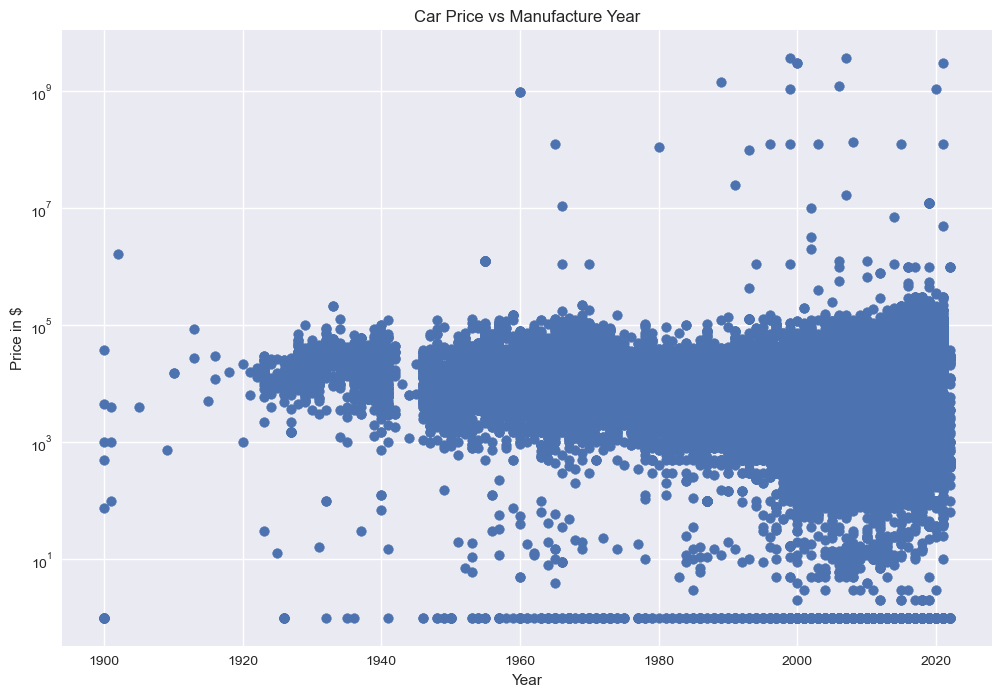

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_temp['year'], df['price']);
ax.set_yscale('log')

# Customize the plot
ax.set(title="Car Price vs Manufacture Year", xlabel="Year", ylabel='Price in $');

### Visulize price vs posting_date

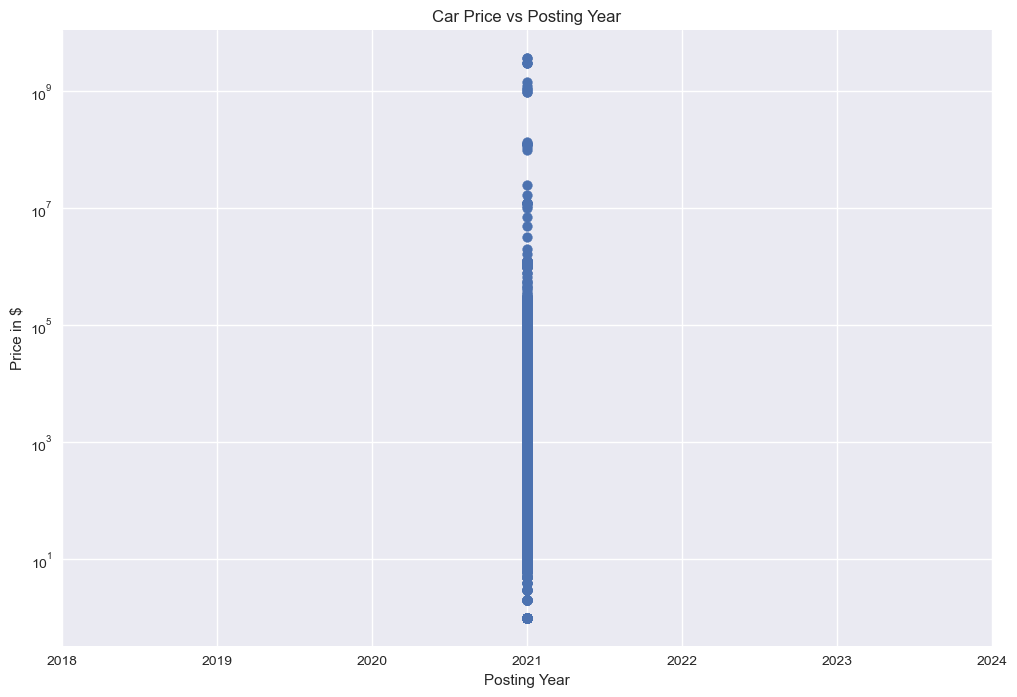

In [29]:
df_temp["posting_year"] = df_temp.posting_date.dt.year
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_temp['posting_year'], df['price']);
ax.set_yscale('log')

# Customize the plot
ax.set(title="Car Price vs Posting Year", xlabel="Posting Year", ylabel='Price in $');
# Set the limits for the x-axis to zoom in (e.g., 1990 to 2025)
ax.set_xlim(2018, 2024);

**The `posting_date` column has only one year and that is 2021**

In [30]:
# df_temp["posting_year"] = df_temp.posting_date.dt.year
# df_temp["posting_month"] = df_temp.posting_date.dt.month
# df_temp["posting_day"] = df_temp.posting_date.dt.day
# df_temp["posting_day_of_week"] = df_temp.posting_date.dt.dayofweek

# df["posting_year"] = df.posting_date.dt.year.astype(int)
# df["posting_month"] = df.posting_date.dt.month.astype(int)
# df["posting_day"] = df.posting_date.dt.day.astype(int)
# df["posting_day_of_week"] = df.posting_date.dt.dayofweek.astype(int)

In [31]:
# fig, ax = plt.subplots(figsize=(12, 8))
# ax.scatter(df_temp['posting_year'], df['price']);
# ax.set_yscale('log')

# # Customize the plot
# ax.set(title="Car Price vs Manufacture Year", xlabel="Year", ylabel='Price in $');

### Visualize price distribution

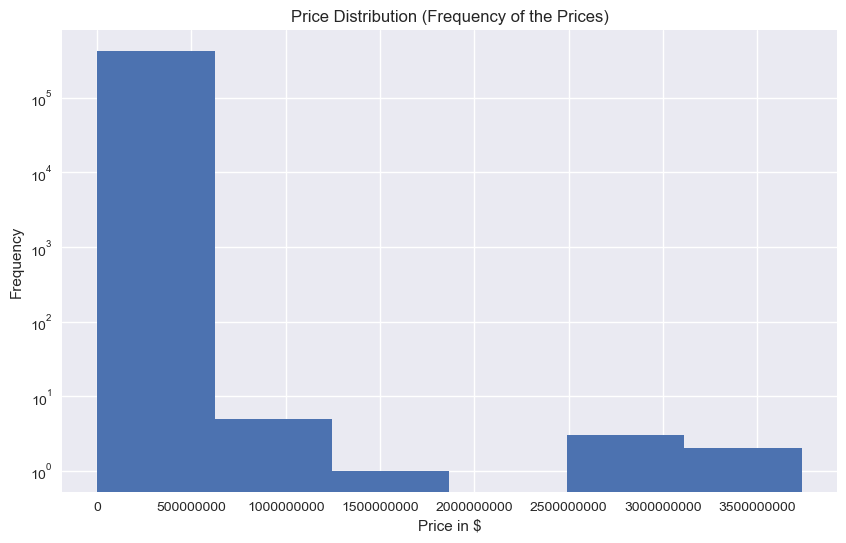

In [32]:
# Plot price distripution
fig, ax = plt.subplots(figsize=(10, 6));
hist = ax.hist(df['price'], bins=6);
plt.ticklabel_format(style = 'plain')

# Customize the plot
ax.set(title="Price Distribution (Frequency of the Prices)", xlabel="Price in $", ylabel='Frequency');
ax.set_yscale('log');

### Visualize price outliers

**The figure above shows that most prices are between 0 and 500,000,000. There are some extreme outliers present in the `price` column.**

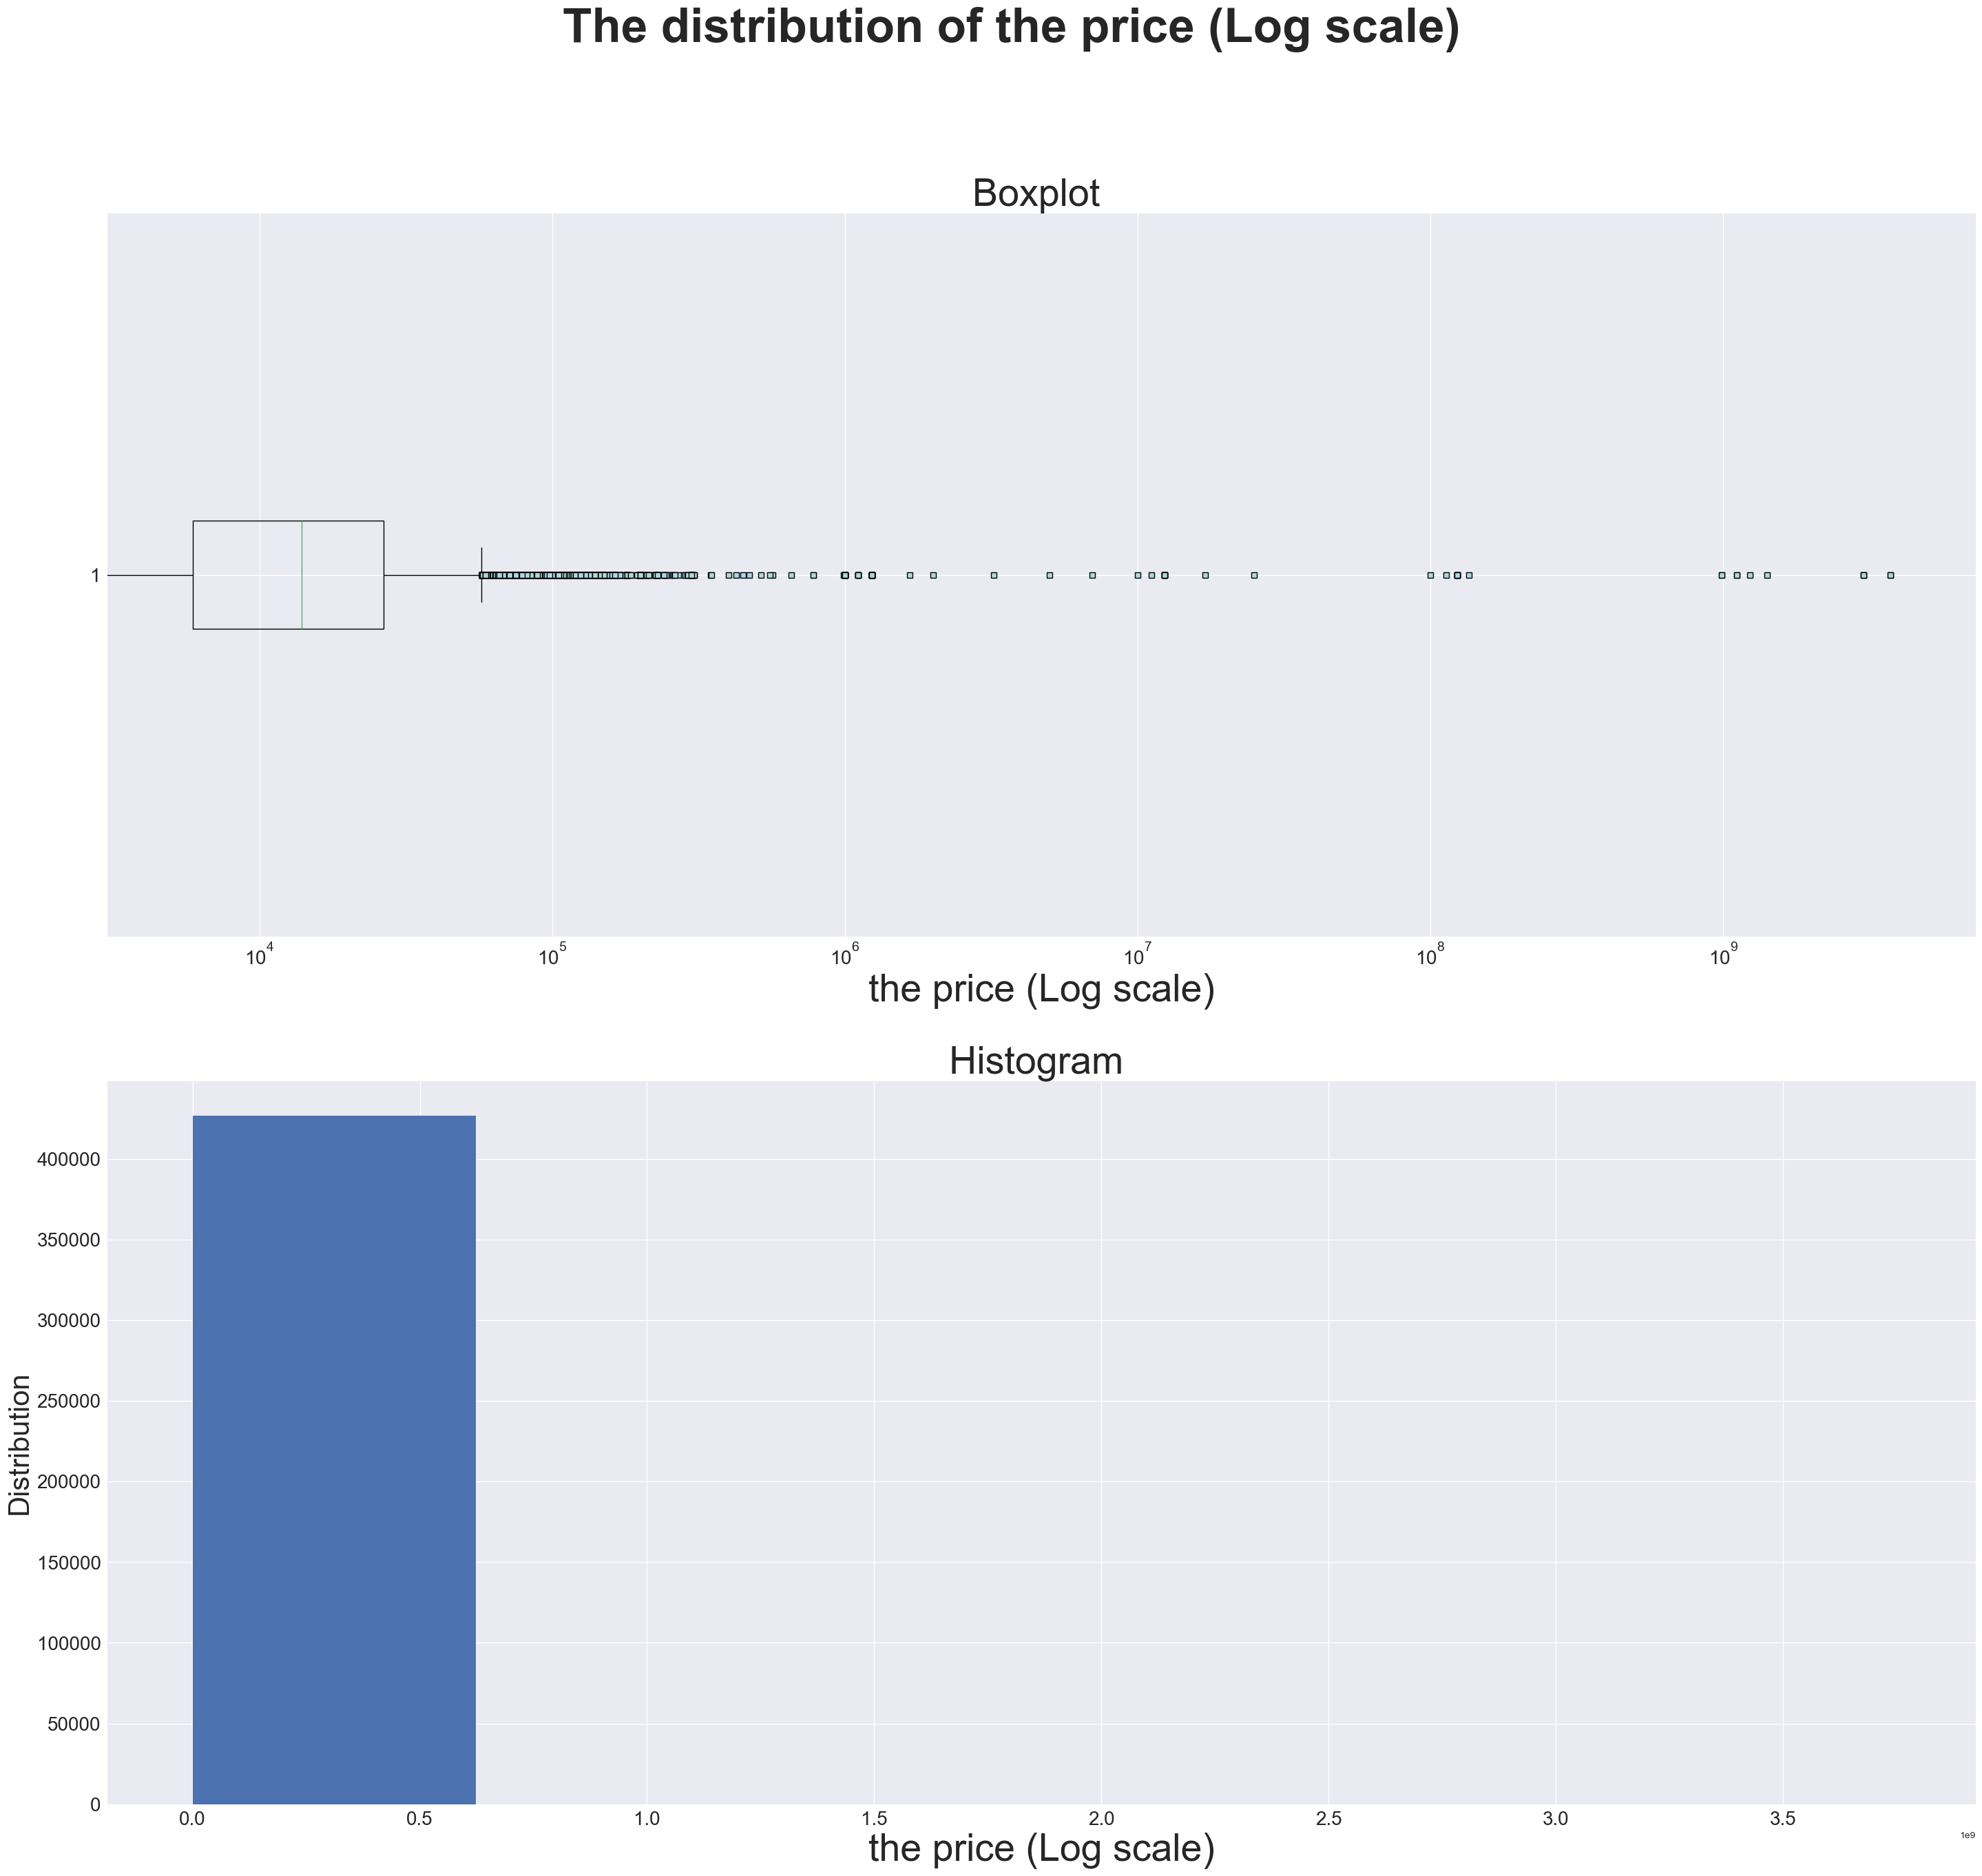

In [33]:
visualize_distribution(df, "price", "the price (Log scale)")

**As suspected, there are many extreme outliers in the `price` column (target).**

In [34]:
# More visualization to do

# Odometer vs Price
# Fuel vs Price
# All vs Price

# Number of cars per Region (Bar)
# Number of cars per State
# Number of cars per Manufa
# Number of cars per Model
# Number of cars per Drive
# Number of cars per Trans
# Number of cars per Type
# Number of cars per Condition
# Number of cars per Cylinder
# Number of cars for each Fuel type (Bar, Pie)
# Number of cars per Size

# Something with Color

### Get a sample of the data

In [35]:
df_temp.sample(10).T

,198643,424896,402553,155861,36201,377317,386648,62540,166978,405208
id,7313437031,7307478435,7316158687,7314773815,7311756324,7306245613,7305786539,7316330271,7311100628,7304653927
region,detroit metro,milwaukee,kennewick-pasco-richland,cedar rapids,merced,killeen / temple / ft hood,st george,SF bay area,"kansas city, MO",kennewick-pasco-richland
price,6999,16500,5998,8995,6900,19800,36795,2499,35310,0
year,2011-01-01 00:00:00,2017-01-01 00:00:00,2009-01-01 00:00:00,2008-01-01 00:00:00,2009-01-01 00:00:00,2017-01-01 00:00:00,2015-01-01 00:00:00,1997-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00
manufacturer,chrysler,toyota,dodge,subaru,nissan,honda,chevrolet,honda,dodge,ram
model,town & country,sienna,grand caravan,outback,murano,pilot,silverado,accord,charger,1500
condition,NaN,excellent,NaN,excellent,excellent,excellent,NaN,NaN,NaN,NaN
cylinders,NaN,6 cylinders,NaN,NaN,6 cylinders,6 cylinders,6 cylinders,NaN,NaN,8 cylinders
fuel,gas,gas,gas,gas,gas,gas,other,gas,gas,gas
odometer,109000.00,60034.00,213251.00,101919.00,125000.00,88161.00,39024.00,180000.00,31731.00,30867.00


### Visualize Region

In [36]:
cars_per_region = df_temp['region'].value_counts()
cars_per_region

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

#### Number of cars per region

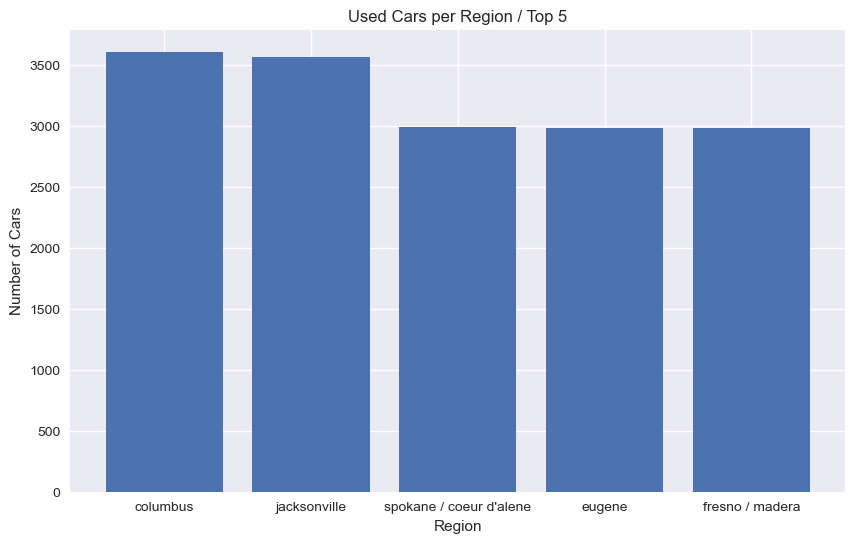

In [37]:
plot_column_frequancy("region", df_temp, 5)

**Columbus, Jacksonville, Spokane/coeur d'alene, Eugene and Fresno/madera are the top 5 regions with the most cars for sale. They each have 3600, 3500, 3000, 3000, 3000 cars offered for sale, respectively.**

#### Price distribution per region / top 5

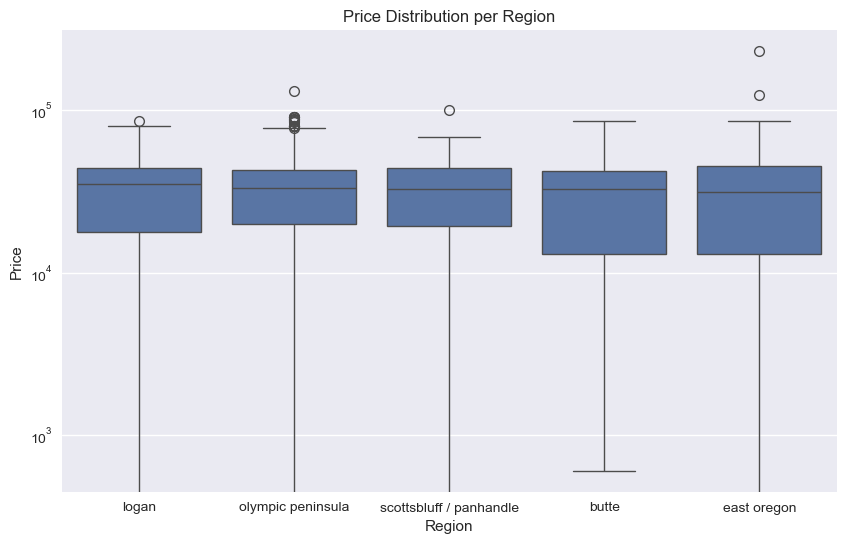

In [38]:
plot_price_distribution_per_column("region", df_temp, 5)

In [39]:
calculate_price_quartiles_by_column("region", df_temp, 5)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Price distribution per region:
Logan: Q1: 17712.25, Median: 34999.0, Q3: 44248.0
Olympic peninsula: Q1: 19999.0, Median: 32999.0, Q3: 42999.0
Scottsbluff / panhandle: Q1: 19337.0, Median: 32900.0, Q3: 43900.0
Butte: Q1: 12991.25, Median: 32677.5, Q3: 41999.0
East oregon: Q1: 12943.25, Median: 31410.0, Q3: 44999.0


#### Price average per region / top 5

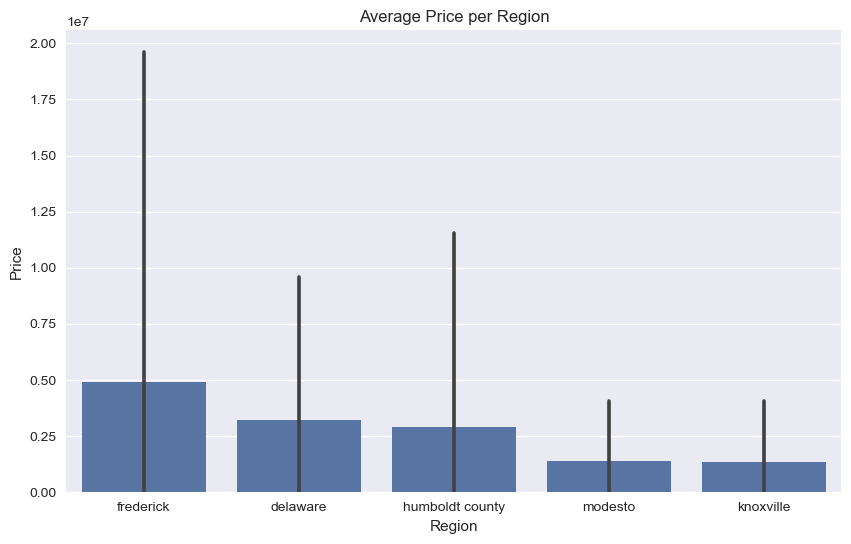

In [40]:
plot_price_average_per_column("region", df_temp, 5)

In [41]:
calculate_average_price_by_column("region", df_temp, 5)

Below are the average prices per region values:
Frederick: $4914334.20
Delaware: $3205055.89
Humboldt county: $2902729.97
Modesto: $1401324.30
Knoxville: $1369993.30


### Visualize State

#### 1. Number of cars per state

In [42]:
cars_per_state = df_temp['state'].value_counts()
cars_per_state

state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: count, dtype: int64

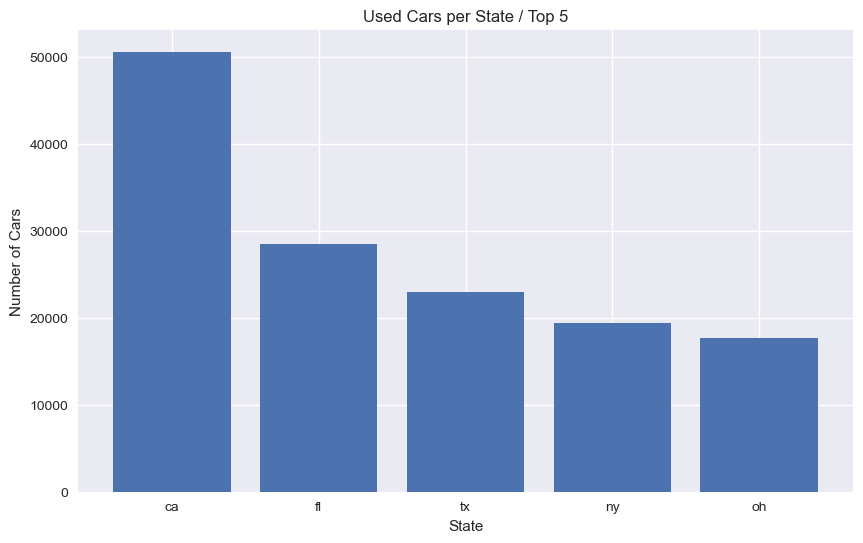

In [43]:
plot_column_frequancy("state", df_temp, 5)

**California, Florida, Texas, New York, and Ohio are the top 5 states with the most cars for sale. They each have 50000, 28000, 23000, 20000, 17000 cars offered for sale, respectively.**

### Visualize Manufacturer

#### 1. Number of cars per Manufacturer

In [44]:
cars_per_manufacturer = df_temp['manufacturer'].value_counts()
cars_per_manufacturer

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

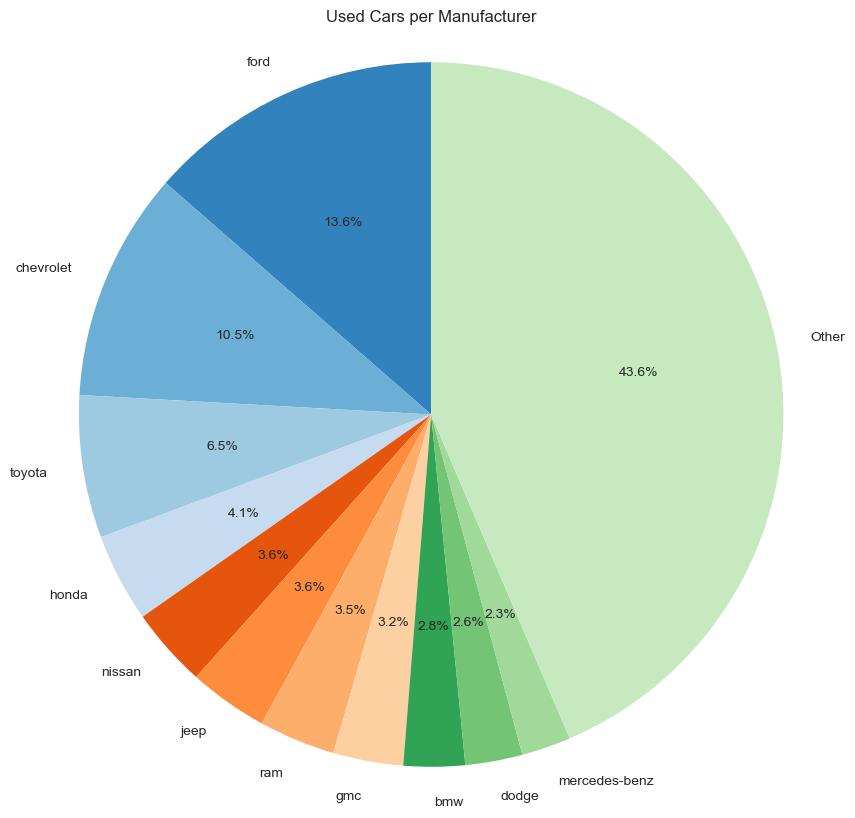

In [45]:
colors = plt.cm.tab20c(np.arange(len(cars_per_manufacturer)))

# Sort data by value
data_sorted = cars_per_manufacturer.sort_values(ascending=False)

# Extract labels and values
labels = data_sorted.index.tolist()
values = data_sorted.values.tolist()

# Group small categories into 'Other'
threshold = 0.05  # Adjust as needed
total = sum(values)
other_value = sum([value for value in values if value / total < threshold])
other_label = 'Other'
labels = labels[:11] + [other_label]
values = values[:11] + [other_value]

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10}, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Set title
ax.set_title("Used Cars per Manufacturer")

plt.show()

**Ford, Chevrolet, and Toyota have the highest number of cars.**

### Model

#### 1. Number of cars per model

In [46]:
combined_model_manufacturer = df_temp.copy()
combined_model_manufacturer["model_manufacturer"] = df_temp["manufacturer"] + " " + df_temp["model"]

cars_per_model = combined_model_manufacturer["model_manufacturer"].value_counts()
cars_per_model

model_manufacturer
ford f-150                  8009
chevrolet silverado 1500    5140
ram 1500                    4069
toyota camry                3133
chevrolet silverado         3021
                            ... 
mitsubishi eclipse gs-t        1
ram 1500 hemi crew             1
ford xlt x-cab                 1
ford f150 fx/2 sport           1
jeep gand wagoneer             1
Name: count, Length: 24169, dtype: int64

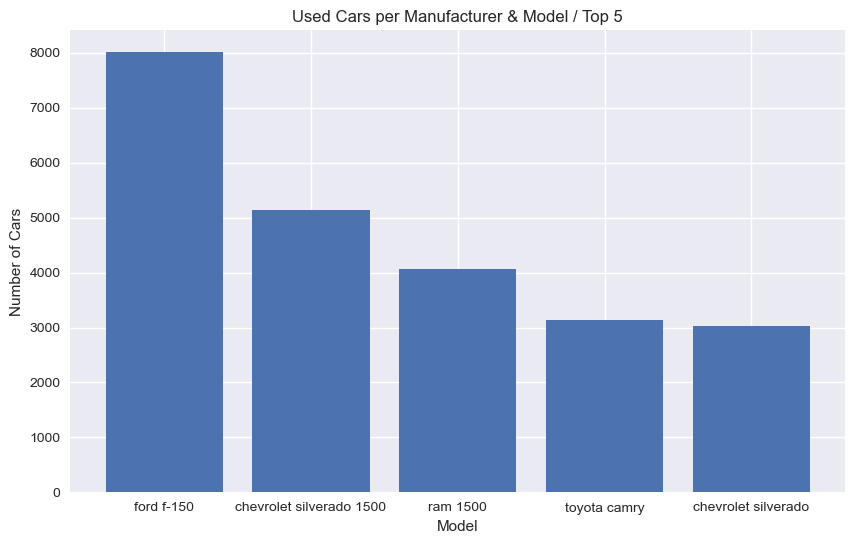

In [47]:
fig, ax = plt.subplots(figsize=(10, 6));
bar = ax.bar(cars_per_model.index.tolist()[:5], cars_per_model.iloc[:5]);

# Customize the bar
ax.set(title="Used Cars per Manufacturer & Model / Top 5", xlabel="Model", ylabel='Number of Cars');

**Ford f-150 is the most common car model with 8000 cars for sale, followed by Chevrolet silverado 1500 with over 5000 cars and Ram 1500 with over 4000 cars.**

#### 2. Get unique models

In [48]:
unique_models = df_temp["model"].unique()

# Print all unique values one by one
# for model in unique_models:
#     print(model)

#### 3. Number of Ford cars models

In [49]:
ford_records = df_temp[df_temp['manufacturer'] == "ford"]
ford_models = ford_records["model"].value_counts()
ford_models

model
f-150                                        8009
escape                                       2745
explorer                                     2499
mustang                                      2220
fusion                                       1979
                                             ... 
f-150 crew cab limited                          1
f-550 service truck under deck compressor       1
runabout roadster                               1
f150 fx-2 sport                                 1
f150, platinum                                  1
Name: count, Length: 3874, dtype: int64

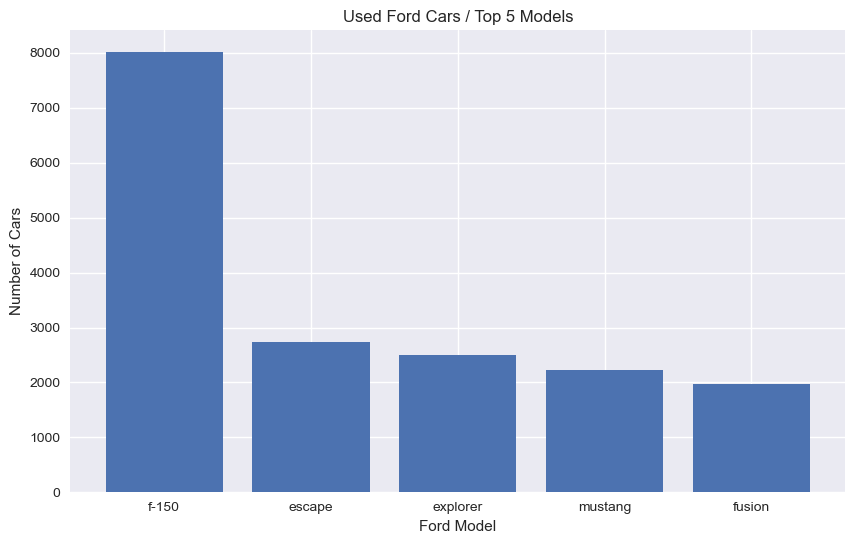

In [50]:
fig, ax = plt.subplots(figsize=(10, 6));
bar = ax.bar(ford_models.index.tolist()[:5], ford_models.iloc[:5]);

# Customize the bar
ax.set(title="Used Ford Cars / Top 5 Models", xlabel="Ford Model", ylabel='Number of Cars');

**The top used Ford cars are f-150, escape, explorer, mustang and fusion.**

### Visualize Odometer

#### 1. Car price vs odometer

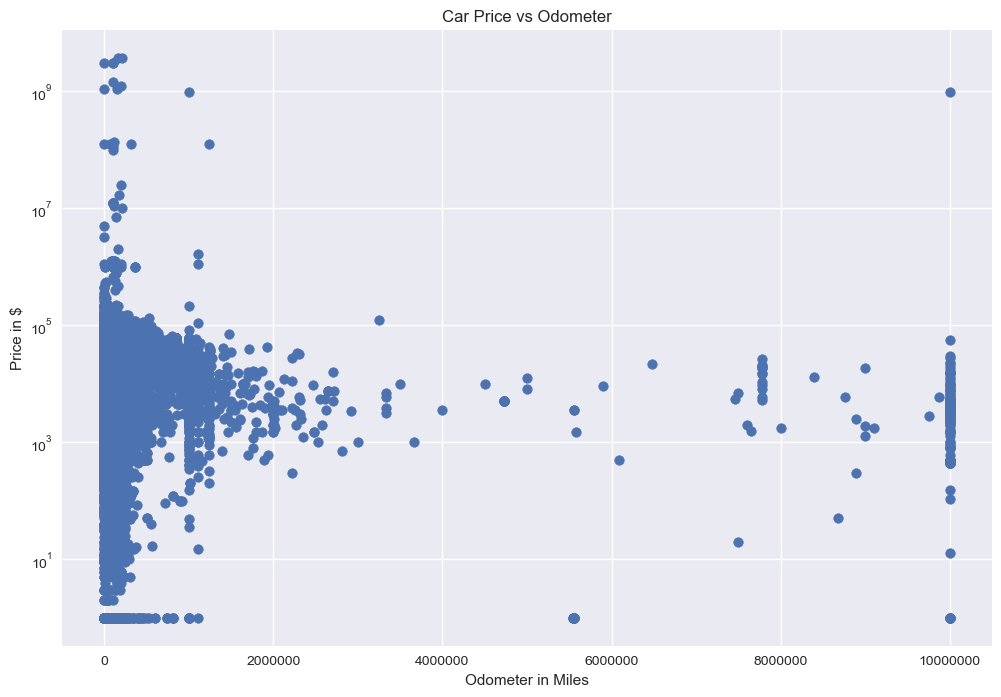

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_temp['odometer'], df_temp['price']);
plt.ticklabel_format(style = 'plain')

# Customize the plot
ax.set(title="Car Price vs Odometer", xlabel="Odometer in Miles", ylabel='Price in $');
ax.set_yscale('log')

**Most cars in the dataset have a price between 0 and 100,000 and an odometer between 0 and 2000,000.**

### Visualize Drive

#### 1. Number of cars vs drive

In [52]:
cars_per_drive = df_temp['drive'].value_counts()
cars_per_drive

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

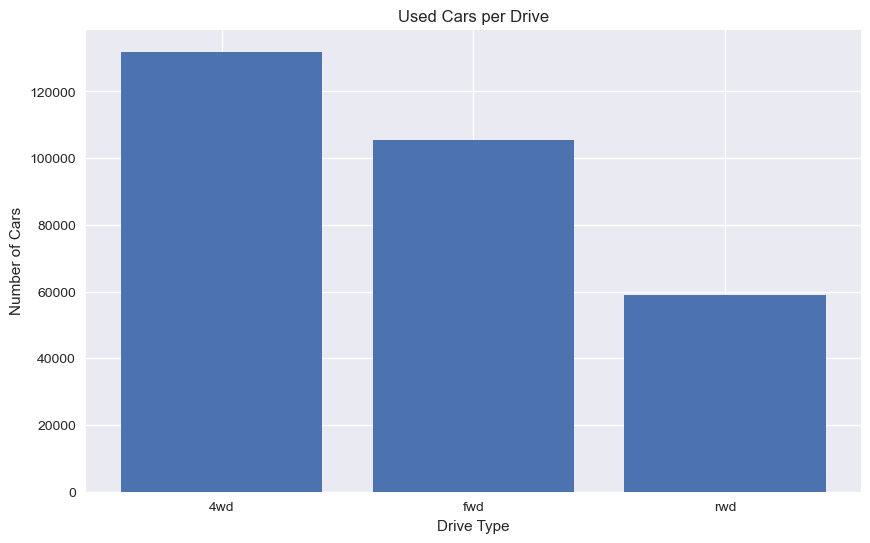

In [53]:
fig, ax = plt.subplots(figsize=(10, 6));
bar = ax.bar(cars_per_drive.index.tolist(), cars_per_drive);

# Customize the bar
ax.set(title="Used Cars per Drive", xlabel="Drive Type", ylabel='Number of Cars');

**The dataset comprises more than 120,000 cars with four-wheel drive, over 100,000 with front-wheel drive, and approximately 60,000 with rear-wheel drive.**

#### 2. Car price vs drive

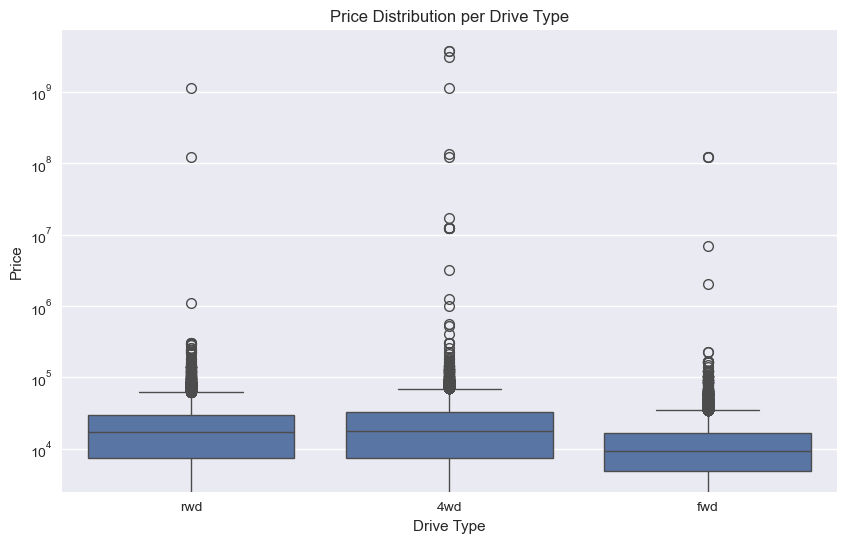

In [54]:
# Box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='drive', y='price', data=df_temp)
plt.title('Price Distribution per Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Price')

ax.set_yscale('log')
plt.show()

In [55]:
calculate_price_quartiles_by_column("drive", df_temp)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Price distribution per drive:
4wd: Q1: 7500.0, Median: 17999.0, Q3: 32500.0
Rwd: Q1: 7500.0, Median: 17500.0, Q3: 29500.0
Fwd: Q1: 4950.0, Median: 9495.0, Q3: 16950.0


**The majority of cars with rear-wheel drive and four-wheel drive are priced between `$8,000` and `$32,000`, whereas front-wheel drive cars are priced in the range of `$5,000` to `$17,000`. 
 There are outliers present in the `price` column.**

#### 3. Average price per drive type

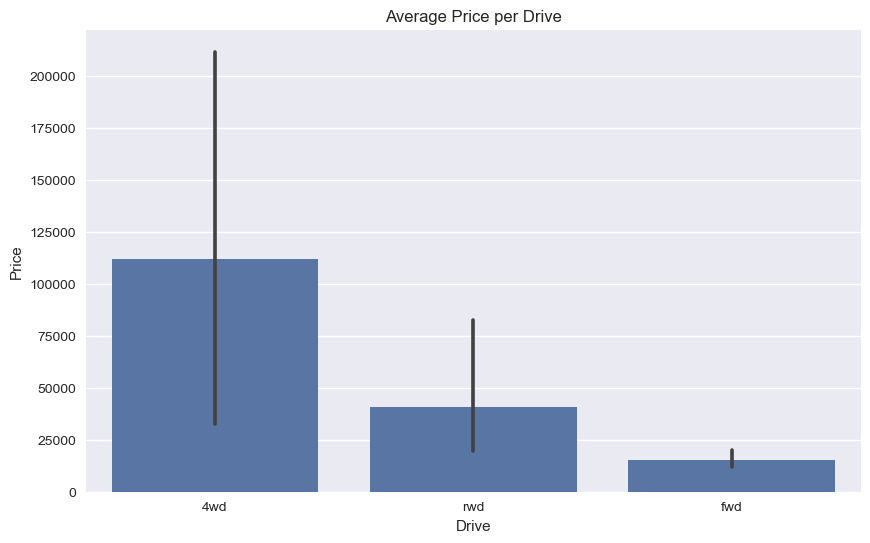

In [56]:
# Bar plot
plot_price_average_per_column("drive", df_temp)

In [57]:
# Calculate average prices for each drive type
calculate_average_price_by_column("drive", df_temp)

Below are the average prices per drive values:
4wd: $112029.80
Rwd: $40795.62
Fwd: $15300.88


**The average of the price of cars per drive type are:**   
* **Four-wheel drive** (4wd) is over 112,000.   
* **Rear-wheel drive** (rwd) is over 40,000.   
* **Front-wheel drive** (fwd) is over 15,000.  

### Visualize Transmission

#### 1. Car price vs transmission type

In [58]:
cars_per_transmission = df_temp['transmission'].value_counts()
cars_per_transmission

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

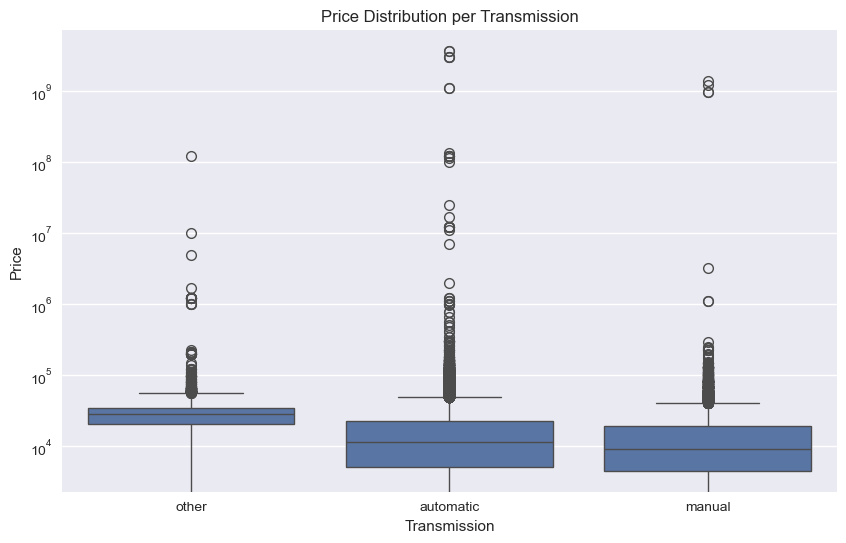

In [59]:
# Box plot
plot_price_distribution_per_column("transmission", df_temp)

In [60]:
## Calculate Q1 and Q2 (median) and Q3 for each group
calculate_price_quartiles_by_column("transmission", df_temp)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Price distribution per transmission:
Other: Q1: 20590.0, Median: 27990.0, Q3: 34990.0
Automatic: Q1: 4999.0, Median: 11450.0, Q3: 22775.0
Manual: Q1: 4500.0, Median: 9000.0, Q3: 18995.0


**The prices of the majority of cars with automatic and manual transmission range approximately from `$4,000` & `$22.000`, while the prices of cars with transmission catagory other ranges from about `$20,000` to approximately `$34,000`**

#### 2. Average price per transmission type

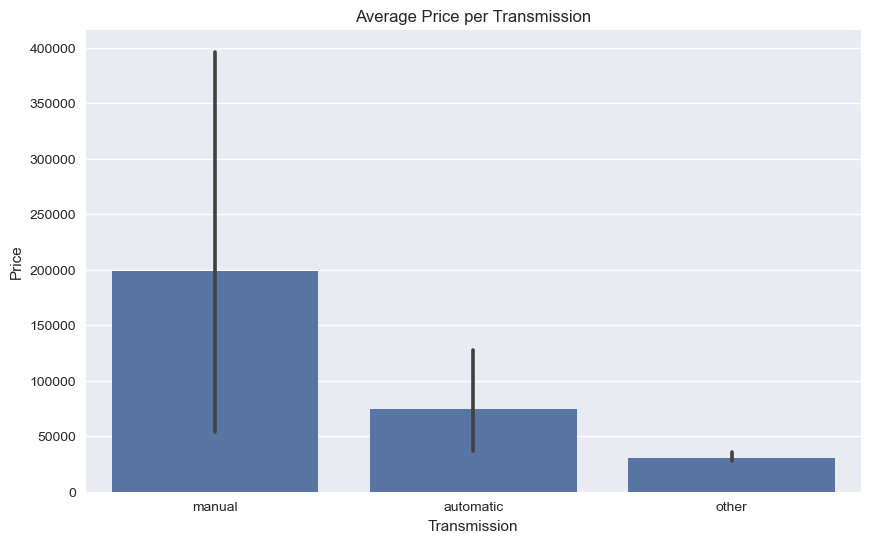

In [61]:
plot_price_average_per_column("transmission", df_temp)

In [62]:
# Average price per transmission
calculate_average_price_by_column("transmission", df_temp)

Below are the average prices per transmission values:
Manual: $198416.34
Automatic: $74881.00
Other: $30003.79


**The average of the price of cars per transmission:**   
* **Automatic** is 75,000.
* **Manual** is 198,000.
* **Other** is 30,000.

### Visualize Fuel

#### 1. Car price vs fuel type

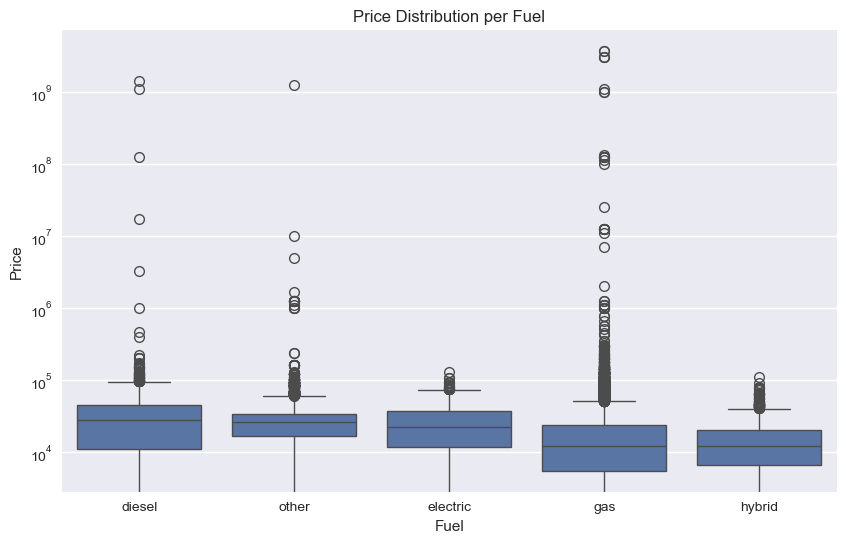

In [63]:
# Box plot
plot_price_distribution_per_column("fuel", df_temp)

In [64]:
calculate_price_quartiles_by_column("fuel", df_temp)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Price distribution per fuel:
Diesel: Q1: 11000.0, Median: 27990.0, Q3: 44900.0
Other: Q1: 16495.0, Median: 25990.0, Q3: 33990.0
Electric: Q1: 11590.0, Median: 22544.5, Q3: 36590.0
Gas: Q1: 5495.0, Median: 11998.0, Q3: 23876.0
Hybrid: Q1: 6512.5, Median: 11995.0, Q3: 19990.0


#### 2. Average price per fuel type

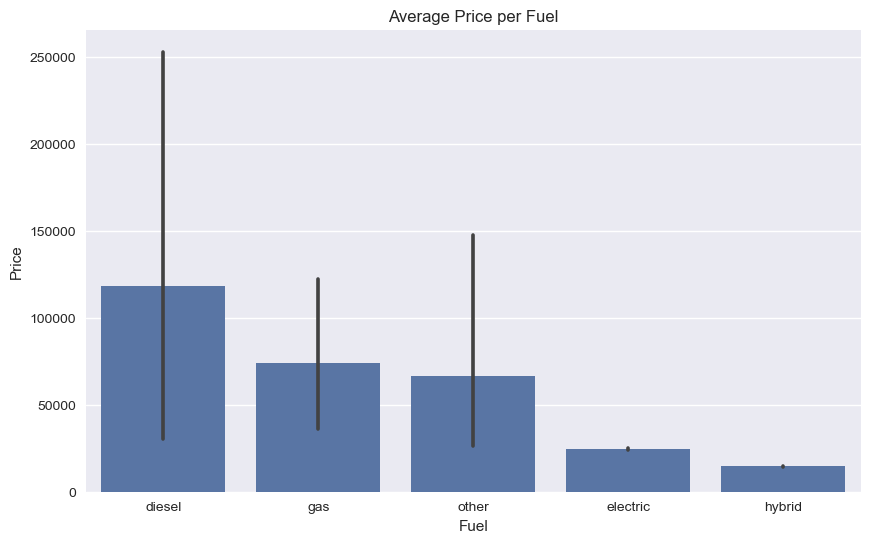

In [65]:
plot_price_average_per_column("fuel", df_temp)

In [66]:
calculate_average_price_by_column("fuel", df_temp)

Below are the average prices per fuel values:
Diesel: $118177.69
Gas: $73902.26
Other: $66811.40
Electric: $24648.36
Hybrid: $14582.43


#### 3. Min, Max, Median, Mean price per fuel

In [67]:
# Get min, max, mean, median,  price per fuel type
m4_price_per_fuel = df_temp.groupby(["fuel"])["price"].agg(["min", "max", "mean", "median"]).reset_index()
m4_price_per_fuel.head()

,fuel,min,max,mean,median
0,diesel,0,1410065407,118177.69,27990.00
1,electric,0,130000,24648.36,22544.50
2,gas,0,3736928711,73902.26,11998.00
3,hybrid,0,109999,14582.43,11995.00
4,other,0,1234567890,66811.40,25990.00


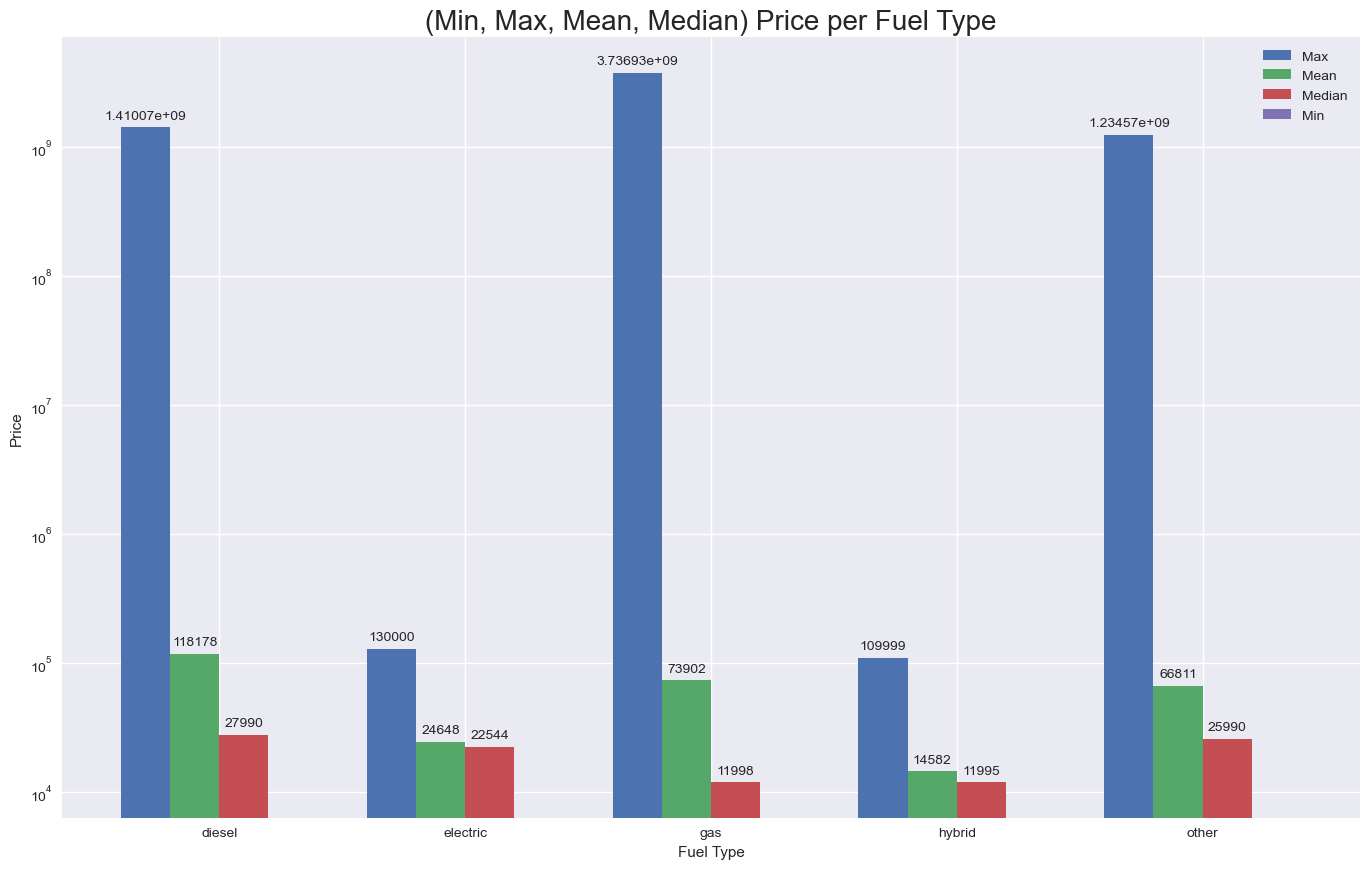

In [68]:
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(len(m4_price_per_fuel["fuel"]))  # the label locations
width = 0.2

r1 = ax.bar(x - width*1.5, round(m4_price_per_fuel["max"]), width)
r2 = ax.bar(x - width/2, round(m4_price_per_fuel["mean"]), width)
r3 = ax.bar(x+ width/2, round(m4_price_per_fuel["median"]), width)
r4 = ax.bar(x + width*1.5, round(m4_price_per_fuel["min"]), width)

ax.set_xticks(x, m4_price_per_fuel["fuel"])

ax.bar_label(r1, padding=4, fontsize=10)
ax.bar_label(r2, padding=4, fontsize=10)
ax.bar_label(r3, padding=4, fontsize=10)
ax.bar_label(r4, padding=4, fontsize=10)

ax.set_xlabel("Fuel Type")
ax.set_ylabel("Price")
ax.set_yscale('log')
ax.set_title("(Min, Max, Mean, Median) Price per Fuel Type", fontsize=20)

fig.tight_layout()

plt.legend(['Max', 'Mean', 'Median', 'Min']);

### Visualize Condition

#### 1. Price distribution per condition

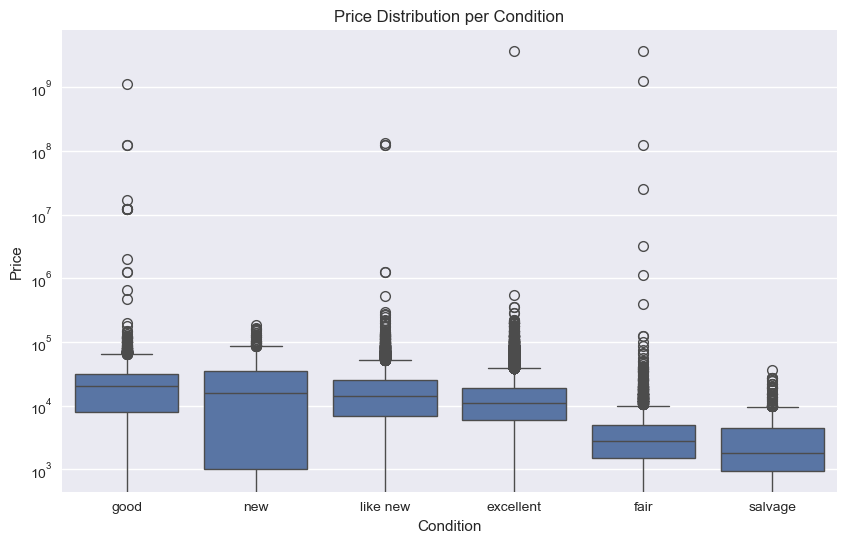

In [69]:
# Box plot
plot_price_distribution_per_column("condition", df_temp)

In [70]:
calculate_price_quartiles_by_column("condition", df_temp)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Price distribution per condition:
Good: Q1: 7900.0, Median: 19995.0, Q3: 30990.0
New: Q1: 1000.0, Median: 15900.0, Q3: 35114.0
Like new: Q1: 6800.0, Median: 13950.0, Q3: 25000.0
Excellent: Q1: 5999.5, Median: 10995.0, Q3: 18990.0
Fair: Q1: 1500.0, Median: 2800.0, Q3: 4900.0
Salvage: Q1: 950.0, Median: 1800.0, Q3: 4500.0


#### 2. Average price per condition

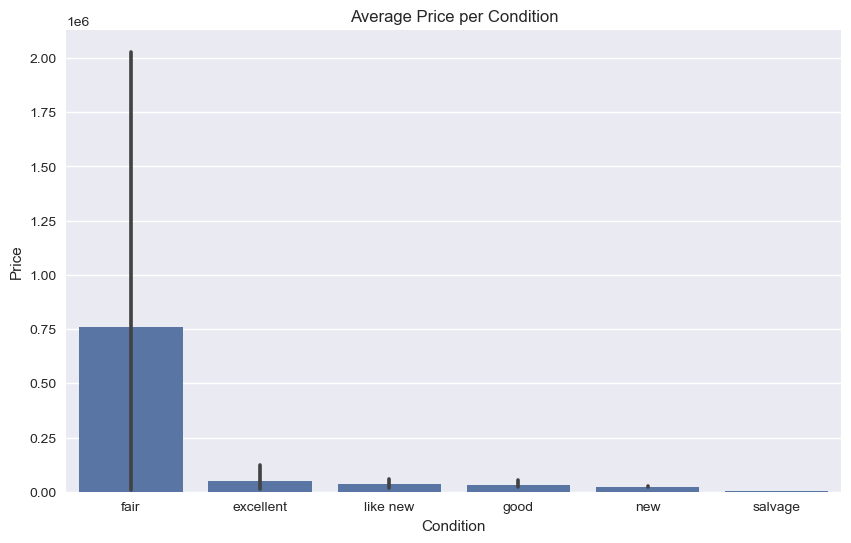

In [71]:
# Bar plot
plot_price_average_per_column("condition", df_temp)

In [72]:
calculate_average_price_by_column("condition", df_temp)

Below are the average prices per condition values:
Fair: $761090.01
Excellent: $51346.83
Like new: $36402.04
Good: $32545.20
New: $23657.27
Salvage: $3605.53


### Visualize Cylinders

#### 1. User cars per cylinders

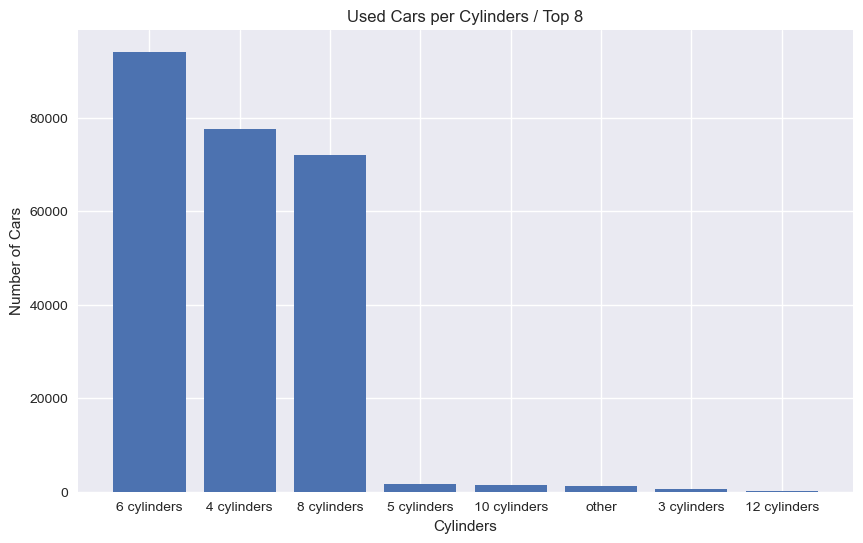

In [73]:
plot_column_frequancy("cylinders", df_temp)

#### 2. Price distribution per cylinders

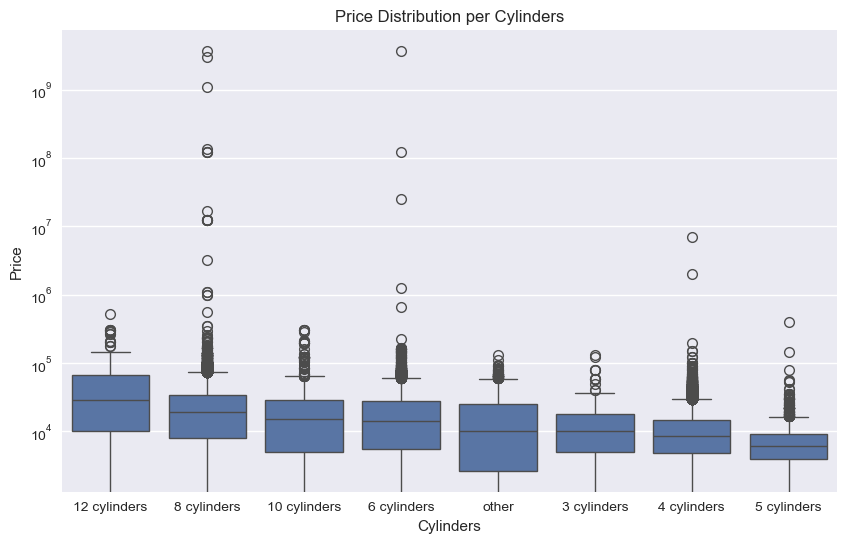

In [74]:
# Box plot
plot_price_distribution_per_column("cylinders", df_temp)

In [75]:
calculate_price_quartiles_by_column("cylinders", df_temp)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Price distribution per cylinders:
12 cylinders: Q1: 10000.0, Median: 28990.0, Q3: 65995.0
8 cylinders: Q1: 7900.0, Median: 18900.0, Q3: 33895.0
10 cylinders: Q1: 4995.0, Median: 14995.0, Q3: 28944.0
6 cylinders: Q1: 5500.0, Median: 13995.0, Q3: 27655.0
Other: Q1: 2650.0, Median: 9991.5, Q3: 24999.0
3 cylinders: Q1: 5000.0, Median: 9990.0, Q3: 17989.5
4 cylinders: Q1: 4750.0, Median: 8500.0, Q3: 14577.5
5 cylinders: Q1: 3995.0, Median: 6200.0, Q3: 8999.0


#### 3. Average price per cylinders

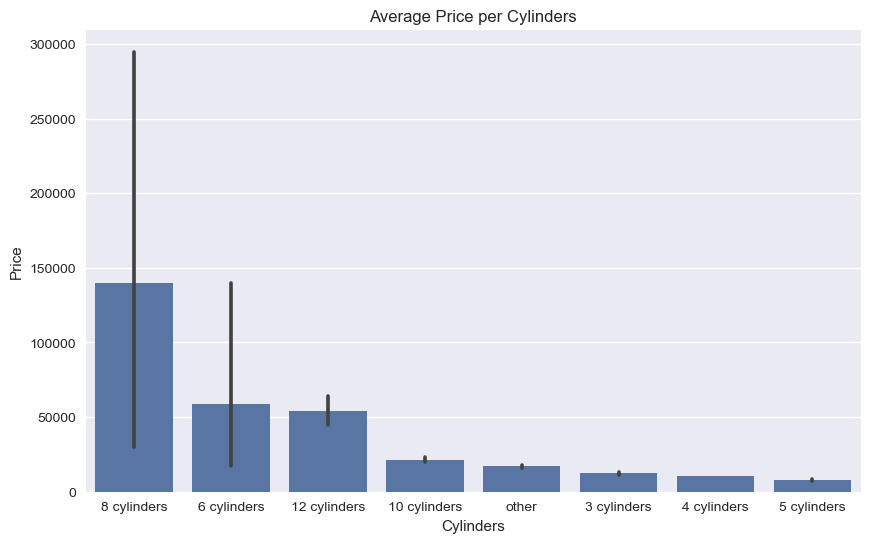

In [76]:
# Bar plot
plot_price_average_per_column("cylinders", df_temp)

In [77]:
calculate_average_price_by_column("cylinders", df_temp)

Below are the average prices per cylinders values:
8 cylinders: $139595.72
6 cylinders: $58696.32
12 cylinders: $54299.38
10 cylinders: $21507.80
Other: $17110.08
3 cylinders: $12297.00
4 cylinders: $10545.30
5 cylinders: $7842.78


### Visualize Size

#### 1. Average price per size

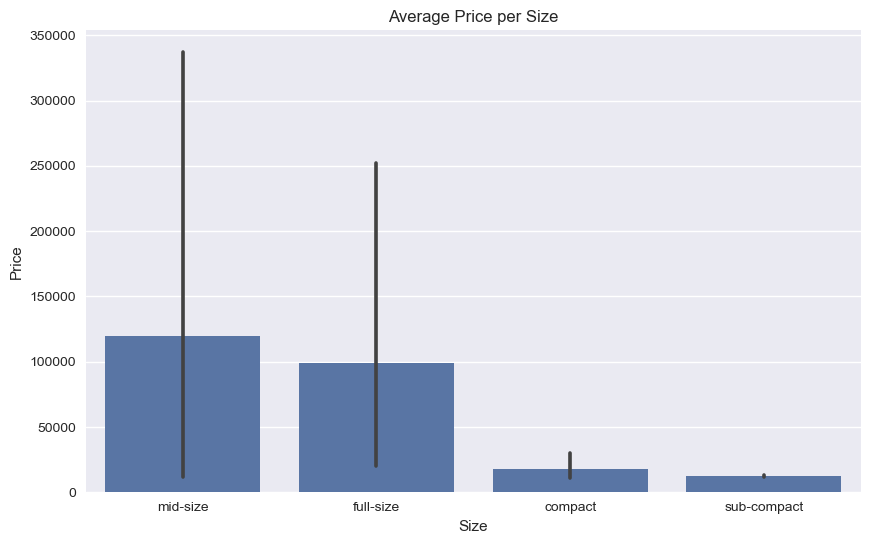

In [78]:
# Bar plot
plot_price_average_per_column("size", df_temp)

In [79]:
calculate_average_price_by_column("size", df_temp)

Below are the average prices per size values:
Mid-size: $120018.14
Full-size: $99169.48
Compact: $17510.31
Sub-compact: $12266.98


#### 2. Price distribution per size

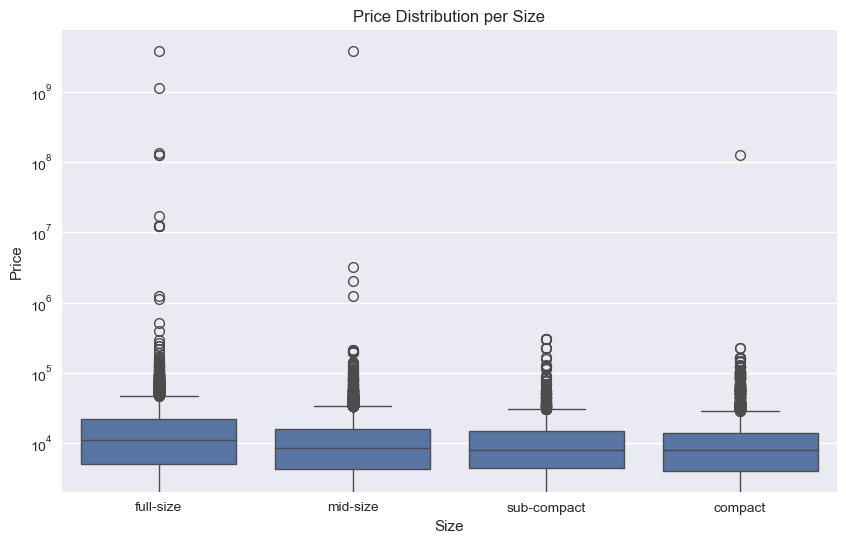

In [80]:
# Box plot
plot_price_distribution_per_column("size", df_temp)

In [81]:
calculate_price_quartiles_by_column("size", df_temp)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Price distribution per size:
Full-size: Q1: 4995.0, Median: 10995.0, Q3: 22000.0
Mid-size: Q1: 4300.0, Median: 8495.0, Q3: 15995.0
Sub-compact: Q1: 4500.0, Median: 7995.0, Q3: 14995.0
Compact: Q1: 3988.0, Median: 7897.0, Q3: 14000.0


### Visualize Vehicle Type

#### 1. Average price per vehicle type

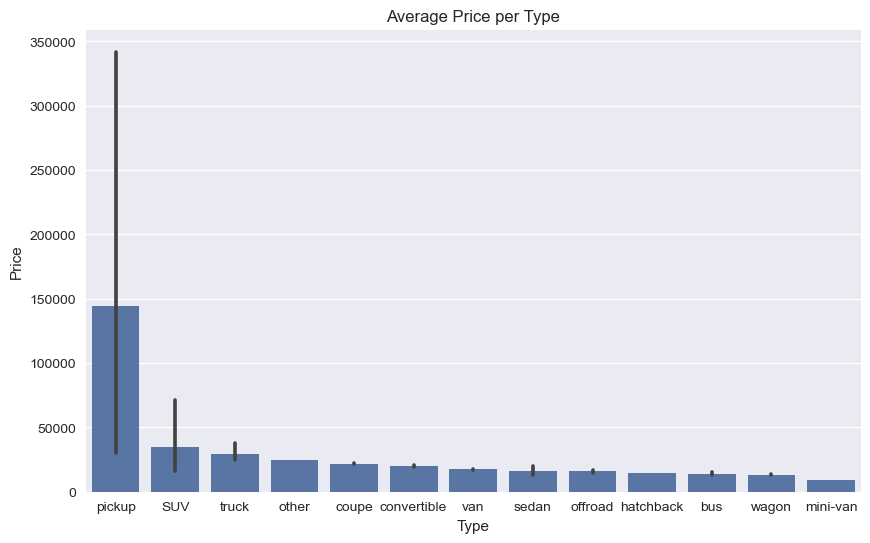

In [82]:
# Bar plot
plot_price_average_per_column("type", df_temp)

In [83]:
calculate_average_price_by_column("type", df_temp)

Below are the average prices per type values:
Pickup: $144751.64
Suv: $34434.05
Truck: $29383.58
Other: $24743.59
Coupe: $21937.56
Convertible: $19999.77
Van: $17487.60
Sedan: $15950.19
Offroad: $15813.09
Hatchback: $14384.51
Bus: $14105.62
Wagon: $13273.91
Mini-van: $9234.09


#### 2. Average price per vehicle type

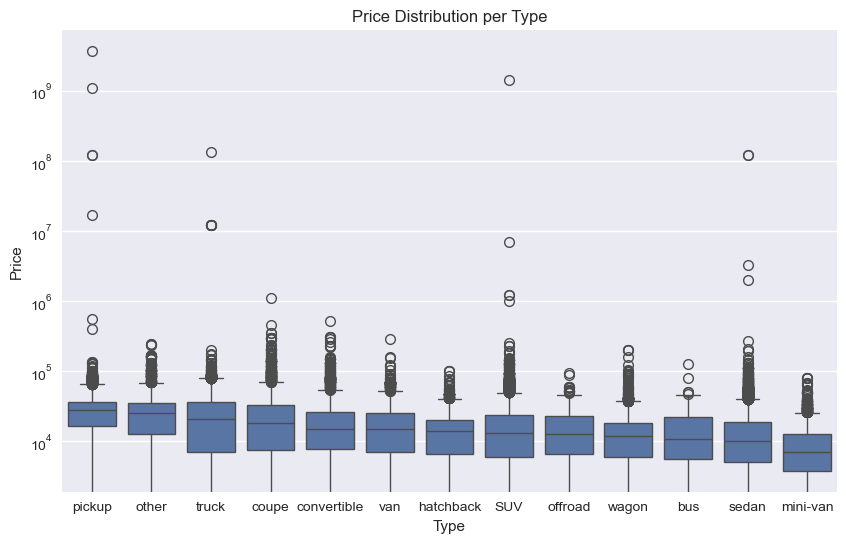

In [84]:
# Box plot
plot_price_distribution_per_column("type", df_temp)

In [85]:
calculate_price_quartiles_by_column("type", df_temp)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Price distribution per type:
Pickup: Q1: 16500.0, Median: 27990.0, Q3: 35950.0
Other: Q1: 12500.0, Median: 25590.0, Q3: 34990.0
Truck: Q1: 7000.0, Median: 20999.0, Q3: 35998.0
Coupe: Q1: 7500.0, Median: 18516.5, Q3: 32590.0
Convertible: Q1: 7800.0, Median: 15000.0, Q3: 26344.0
Van: Q1: 6995.0, Median: 14995.0, Q3: 25000.0
Hatchback: Q1: 6500.0, Median: 13950.0, Q3: 19990.0
Suv: Q1: 5999.0, Median: 13295.0, Q3: 23458.75
Offroad: Q1: 6500.0, Median: 12500.0, Q3: 23000.0
Wagon: Q1: 6000.0, Median: 11995.0, Q3: 18500.0
Bus: Q1: 5500.0, Median: 10900.0, Q3: 21900.0
Sedan: Q1: 4995.0, Median: 9995.0, Q3: 18990.0
Mini-van: Q1: 3800.0, Median: 6988.0, Q3: 1250

## Check cars with price of 0

In [86]:
df_free_cars = df_temp[df_temp["price"] == 0]
df_free_cars

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date,posting_year
10,7218893038,el paso,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaT,NaN
11,7218325704,el paso,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaT,NaN
12,7217788283,el paso,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaT,NaN
13,7217147606,el paso,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaT,NaN
14,7209027818,el paso,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,wyoming,0,2018-01-01,NaN,peterbilt 579,NaN,NaN,diesel,1.00,clean,automatic,NaN,NaN,NaN,NaN,"◄ PRICES STARTING AT $57,500 ($57,500 and up, ...",wy,2021-04-07 15:15:00,2021.00
426812,7302877815,wyoming,0,2006-01-01,toyota,scion tc,excellent,4 cylinders,gas,195000.00,clean,automatic,fwd,NaN,NaN,silver,2006 *** TOYOTA SCION TC *** Call or Text ...,wy,2021-04-06 17:00:01,2021.00
426832,7302353283,wyoming,0,2004-01-01,toyota,prius,excellent,4 cylinders,hybrid,239000.00,clean,automatic,fwd,NaN,NaN,blue,"2004 *** TOYOTA PRIUS *** Call or Text ""To...",wy,2021-04-05 17:00:05,2021.00
426836,7302301268,wyoming,0,2018-01-01,ram,2500,excellent,6 cylinders,diesel,20492.00,clean,automatic,4wd,full-size,truck,white,Phone: 320-275-2150 2018 RAM 2500 Tradesman ...,wy,2021-04-05 15:18:04,2021.00


In [87]:
df_free_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32895 entries, 10 to 426868
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            32895 non-null  int64         
 1   region        32895 non-null  object        
 2   price         32895 non-null  int64         
 3   year          32863 non-null  datetime64[ns]
 4   manufacturer  31434 non-null  object        
 5   model         32319 non-null  object        
 6   condition     10180 non-null  object        
 7   cylinders     15627 non-null  object        
 8   fuel          32476 non-null  object        
 9   odometer      30785 non-null  float64       
 10  title_status  32387 non-null  object        
 11  transmission  32162 non-null  object        
 12  drive         22582 non-null  object        
 13  size          9467 non-null   object        
 14  type          25969 non-null  object        
 15  paint_color   19841 non-null  object   

Over 32000 cars have 0 as a value for the price.  
The condition column is null 22000 of those cars.  
The description column in some cases contains a range price.   
The description column contains personal information in a lot of the cases, such as moblie numbers.

### Visulize cars with price 0 per condition

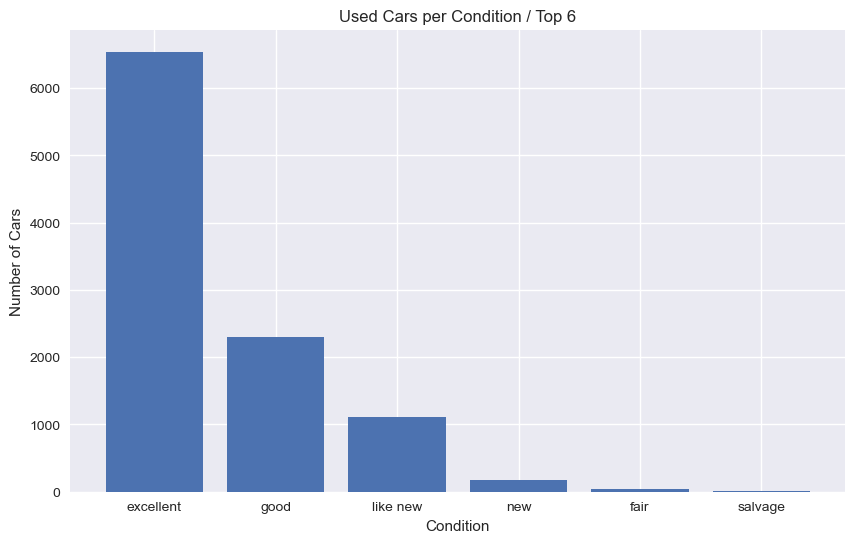

In [88]:
plot_column_frequancy("condition", df_free_cars);

In [89]:
df_free_cars.isna().sum()

id                  0
region              0
price               0
year               32
manufacturer     1461
model             576
condition       22715
cylinders       17268
fuel              419
odometer         2110
title_status      508
transmission      733
drive           10313
size            23428
type             6926
paint_color     13054
description         6
state               0
posting_date        6
posting_year        6
dtype: int64

In [90]:
# Check missing data percentage
np.round(df_free_cars.isnull().sum()/len(df_free_cars)*100)

id              0.00
region          0.00
price           0.00
year            0.00
manufacturer    4.00
model           2.00
condition      69.00
cylinders      52.00
fuel            1.00
odometer        6.00
title_status    2.00
transmission    2.00
drive          31.00
size           71.00
type           21.00
paint_color    40.00
description     0.00
state           0.00
posting_date    0.00
posting_year    0.00
dtype: float64

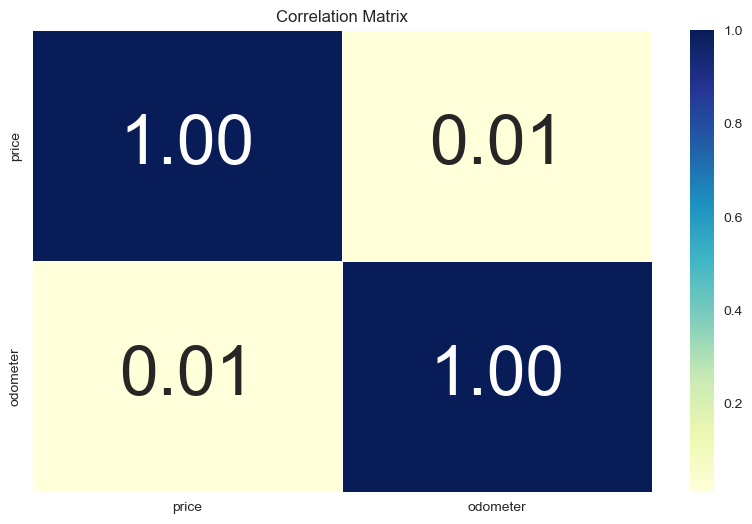

In [91]:
# Convert non-numeric values to NaNs
# df_temp_numeric = df_temp.apply(pd.to_numeric, errors='coerce')
# df_temp_numeric = df_temp.dropna(axis=1, subset=["region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "image_url", "description", "state", "posting_date"])

# Drop columns where any of the specified rows contain NaN values
df_temp_numeric = df_temp.drop(["id", "region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "description", "state", "posting_date", "posting_year"], axis=1)

# Convert the remaining DataFrame to numeric values where possible
# df_temp_numeric = df_temp_cleaned.apply(pd.to_numeric, errors='coerce')
# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu",
            annot=True)
plt.title('Correlation Matrix')
plt.show()

## Data Preparation

In [92]:
df_temp_cleaned = df_temp.copy()

In [93]:
df_temp.head().T

,0,1,2,3,4
id,7222695916,7218891961,7221797935,7222270760,7210384030
region,prescott,fayetteville,florida keys,worcester / central MA,greensboro
price,6000,11900,21000,1500,4900
year,NaT,NaT,NaT,NaT,NaT
manufacturer,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN
fuel,NaN,NaN,NaN,NaN,NaN
odometer,NaN,NaN,NaN,NaN,NaN


In [94]:
# Set the threshold (for example, at least half of the columns should have non-NA values)
threshold = len(df_temp.columns) // 2

# Count the number of rows that have more than 50% of their columns missing
rows_with_many_nans = df_temp.shape[0] - df_temp.dropna(thresh=threshold).shape[0]
rows_with_many_nans

92

**There are 92 rows with empty values in most of the cells**

In [95]:
# Save rows with more than 50% of their columns missing in a new DataFrame
rows_with_many_nans_df = df_temp[df_temp.isnull().sum(axis=1) > threshold]

In [96]:
rows_with_many_nans_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date,posting_year
0,7222695916,prescott,6000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaT,NaN
1,7218891961,fayetteville,11900,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaT,NaN
2,7221797935,florida keys,21000,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaT,NaN
3,7222270760,worcester / central MA,1500,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaT,NaN
4,7210384030,greensboro,4900,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368797,7316880457,dallas / fort worth,7900,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaT,NaN
372596,7310515013,el paso,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaT,NaN
375886,7315179022,houston,7995,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaT,NaN
402274,7291716547,bellingham,25956,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa,NaT,NaN


**There is no point in trying filling these empty values as the majority of cells are missing, so these rows will be dropped**

In [97]:
# Drop rows with fewer than 'threshold' non-NA values
df_temp_cleaned = df_temp_cleaned.dropna(thresh=threshold)

df_temp_cleaned

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date,posting_year
27,7316814884,auburn,33590,2014-01-01,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.00,clean,other,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 12:31:01,2021.00
28,7316814758,auburn,22590,2010-01-01,chevrolet,silverado 1500,good,8 cylinders,gas,71229.00,clean,other,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 12:31:00,2021.00
29,7316814989,auburn,39590,2020-01-01,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.00,clean,other,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 12:31:02,2021.00
30,7316743432,auburn,30990,2017-01-01,toyota,tundra double cab sr,good,8 cylinders,gas,41124.00,clean,other,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 10:41:03,2021.00
31,7316356412,auburn,15000,2013-01-01,ford,f-150 xlt,excellent,6 cylinders,gas,128000.00,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,2021-05-03 14:02:00,2021.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019-01-01,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.00,clean,other,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,wy,2021-04-04 03:21:03,2021.00
426876,7301591187,wyoming,30590,2020-01-01,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.00,clean,other,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,wy,2021-04-04 03:21:02,2021.00
426877,7301591147,wyoming,34990,2020-01-01,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.00,clean,other,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,wy,2021-04-04 03:21:01,2021.00
426878,7301591140,wyoming,28990,2018-01-01,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.00,clean,other,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,wy,2021-04-04 03:21:01,2021.00


### Drop posting_date

In [98]:
# Since posting date contains only one year which is 2021, it will not add any value to the model
df_temp_cleaned.drop(columns=["posting_date", "posting_year"], inplace=True)

In [99]:
df_temp_cleaned.head(5).T

,27,28,29,30,31
id,7316814884,7316814758,7316814989,7316743432,7316356412
region,auburn,auburn,auburn,auburn,auburn
price,33590,22590,39590,30990,15000
year,2014-01-01 00:00:00,2010-01-01 00:00:00,2020-01-01 00:00:00,2017-01-01 00:00:00,2013-01-01 00:00:00
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders
fuel,gas,gas,gas,gas,gas
odometer,57923.00,71229.00,19160.00,41124.00,128000.00


### Handle description

**The description cell contains free text about the car such as the manufacture year, brand, model and in some cases it has personal data such as phone numbers. Since the important data is already included in other columns, this column does not add value and therefore it will be dropped.**
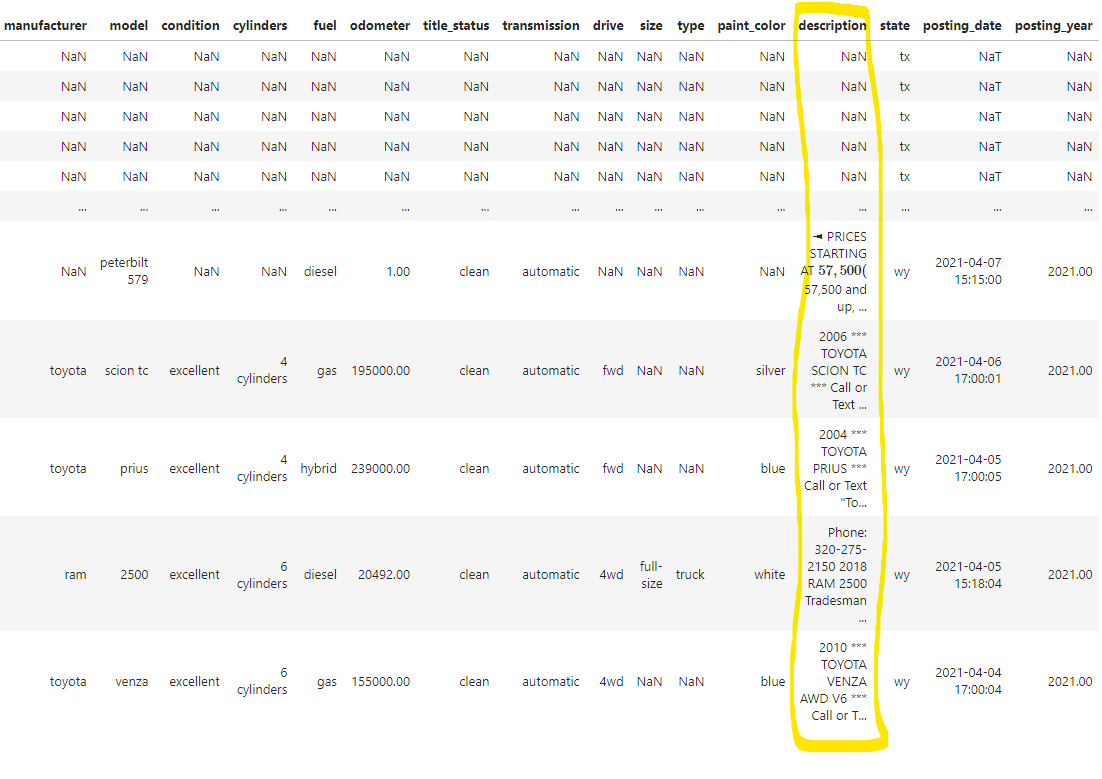

In [100]:
# Drop description column
df_temp_cleaned.drop(columns=["description"], inplace=True)

### Extract manufacture year

In [101]:
df_temp_cleaned.head().T

,27,28,29,30,31
id,7316814884,7316814758,7316814989,7316743432,7316356412
region,auburn,auburn,auburn,auburn,auburn
price,33590,22590,39590,30990,15000
year,2014-01-01 00:00:00,2010-01-01 00:00:00,2020-01-01 00:00:00,2017-01-01 00:00:00,2013-01-01 00:00:00
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders
fuel,gas,gas,gas,gas,gas
odometer,57923.00,71229.00,19160.00,41124.00,128000.00


In [102]:
# Extract the year and handle NaN values
df_temp_cleaned["year"] = df_temp_cleaned["year"].dt.year
df_temp_cleaned["year"] = df_temp_cleaned["year"].apply(lambda x: str(int(x)) if pd.notnull(x) else '')

**The model will be trained on three different dataframes**
1. Dataframe where the outliers filled with a general median, and missing values filled.
2. Dataframe where the outliers filled with a dynamic median, and missing values filled.
3. Datafram where the outliers and missing values are dropped.

### Fill in empty values and outliers

#### With general median

In [103]:
df_filled_empty_outliers = df_temp_cleaned.copy()

##### Visualize price distribution 

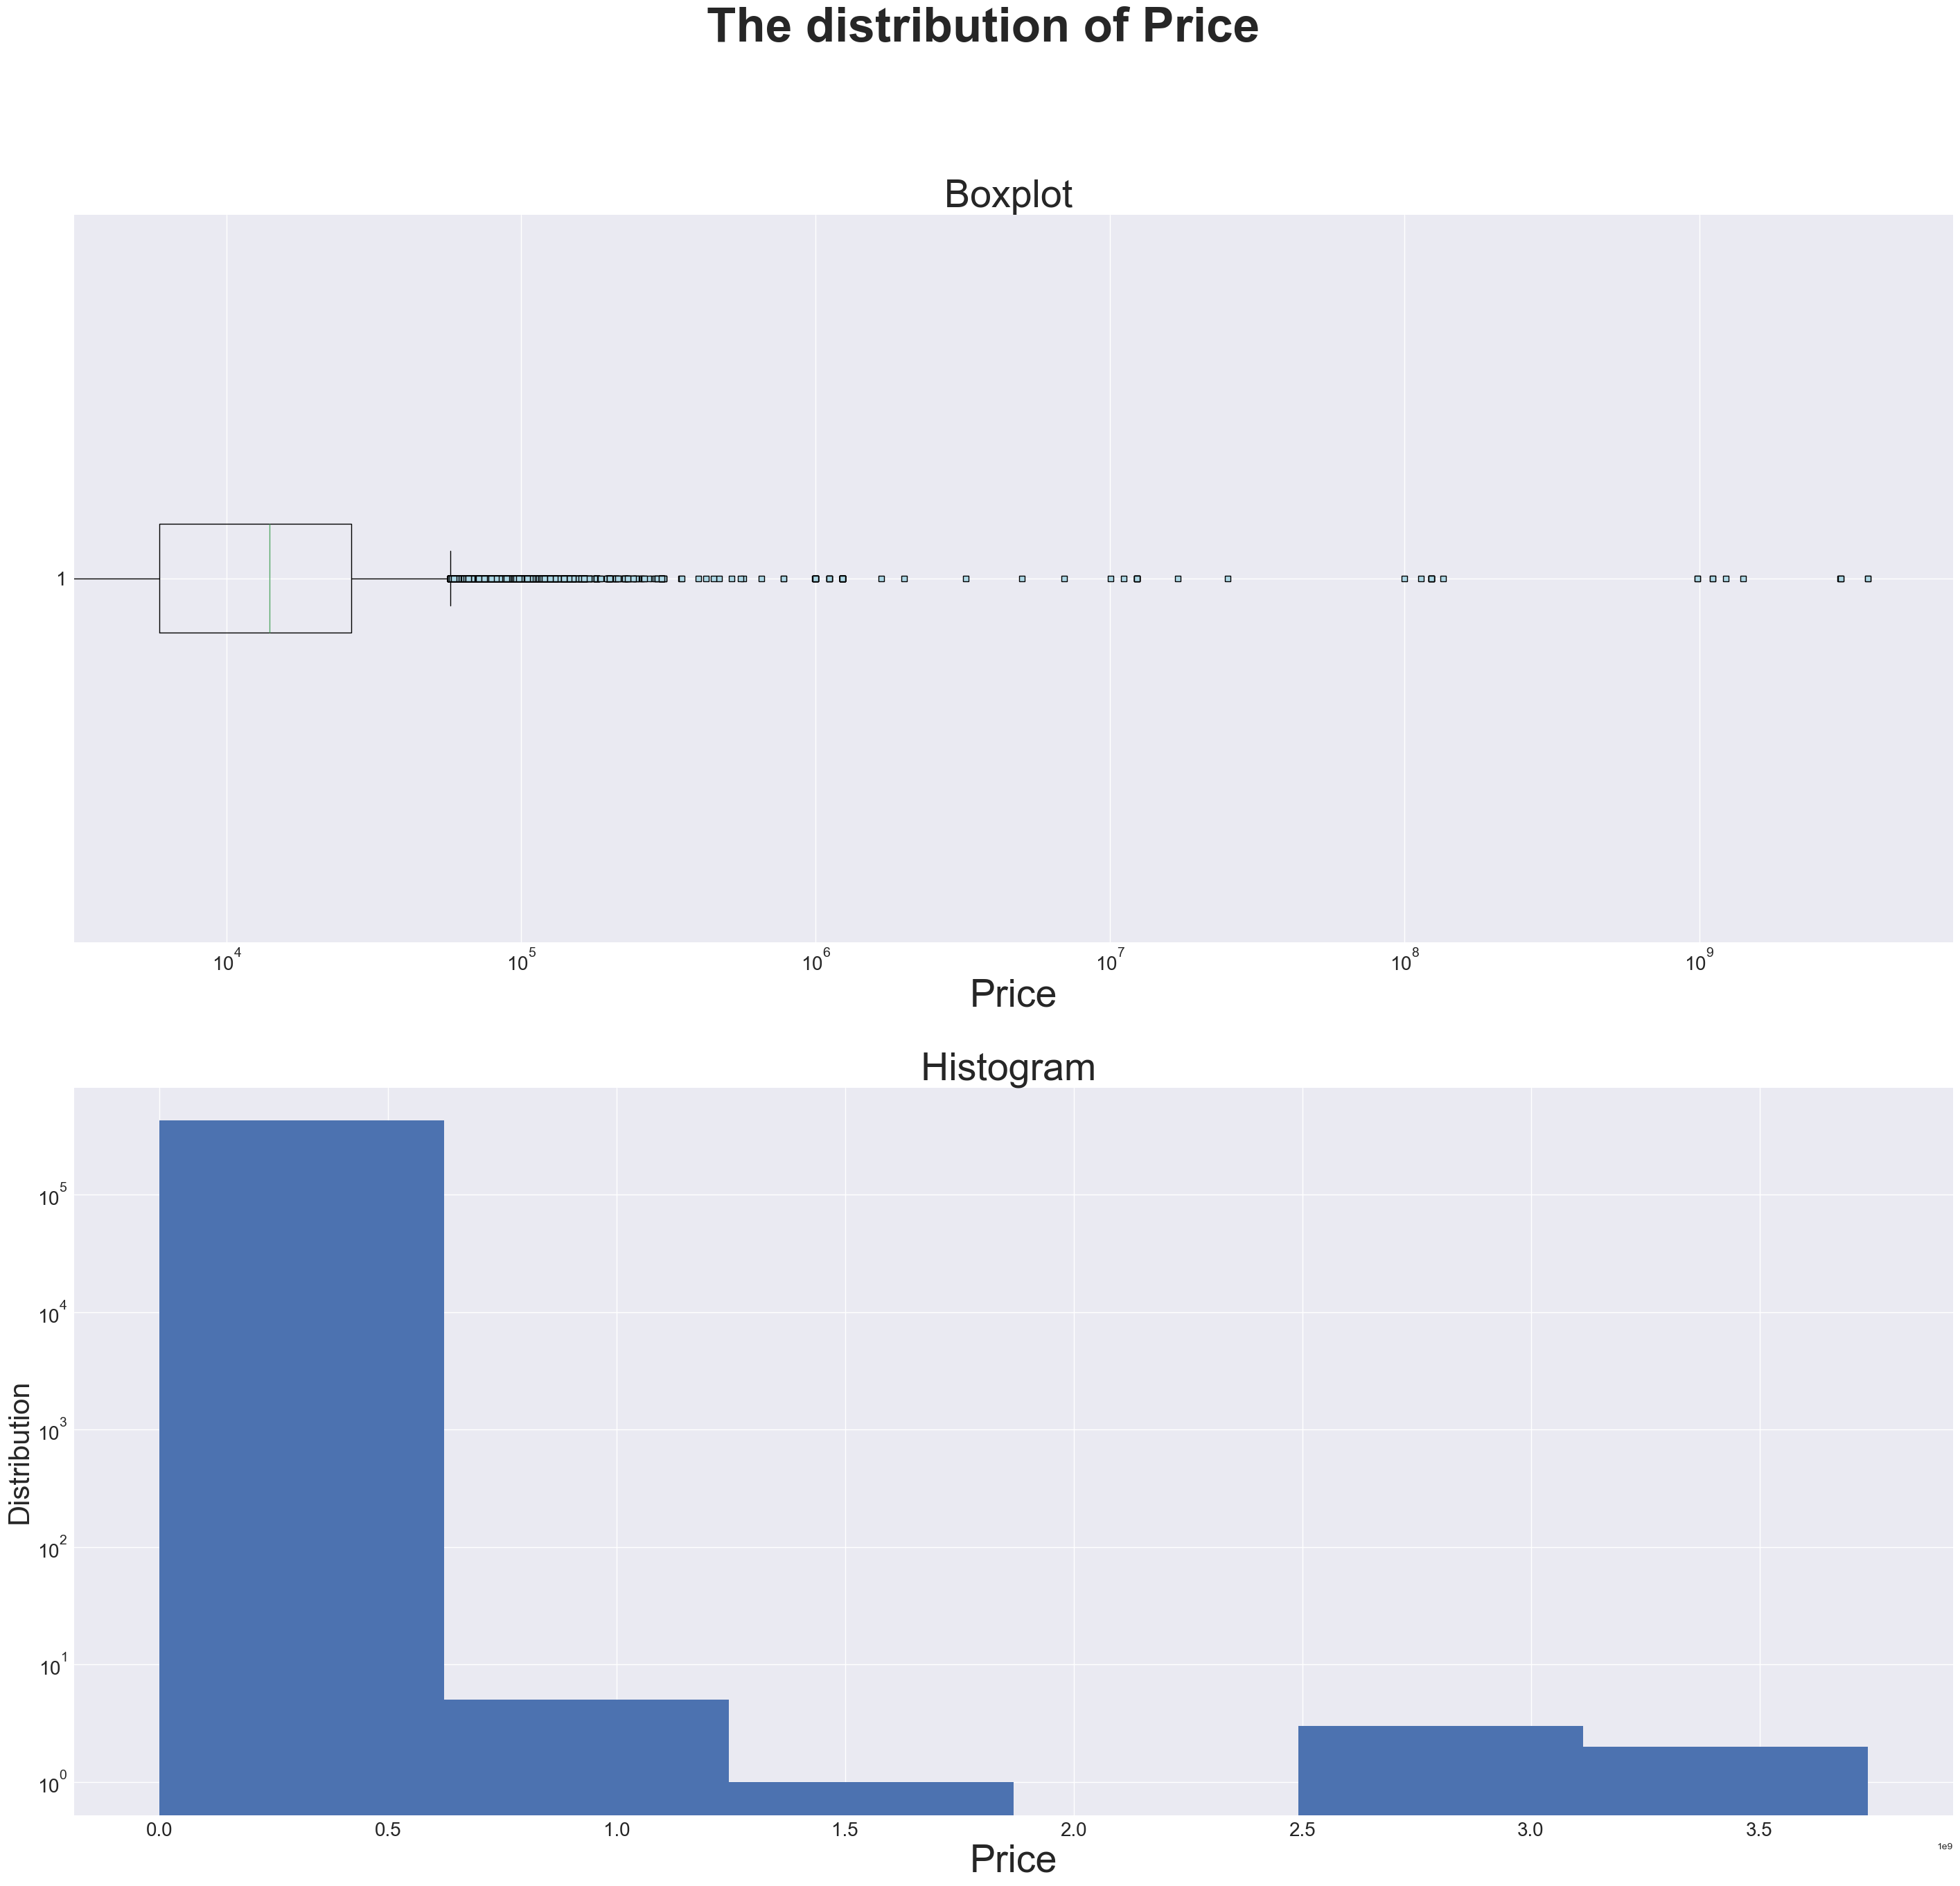

In [104]:
visualize_distribution(df_filled_empty_outliers, "price", "Price", True)

##### Get price lower & upper bounds (Q0 & Q4)

In [105]:
lower_bound, upper_bound = calculate_numerical_quartiles("price", df_filled_empty_outliers)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -24986.5, Q1: 5900.0, Median: 13950.0, Q3: 26491.0, Upper bound: 57377.5


##### Fill price outliers with median

In [106]:
# Calculate the median
median_price = df_filled_empty_outliers['price'].median()

# Identify and fill outliers with the median value
df_filled_empty_outliers['price'] = df_filled_empty_outliers['price'].apply(
    lambda x: median_price if (x < lower_bound or x > upper_bound) else x
)

##### Get price lower & upper bounds (Q0 & Q4)

In [107]:
lower_bound, upper_bound = calculate_numerical_quartiles("price", df_filled_empty_outliers)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -22745.5, Q1: 5900.0, Median: 13950.0, Q3: 24997.0, Upper bound: 53642.5


##### Visualize price distribution 

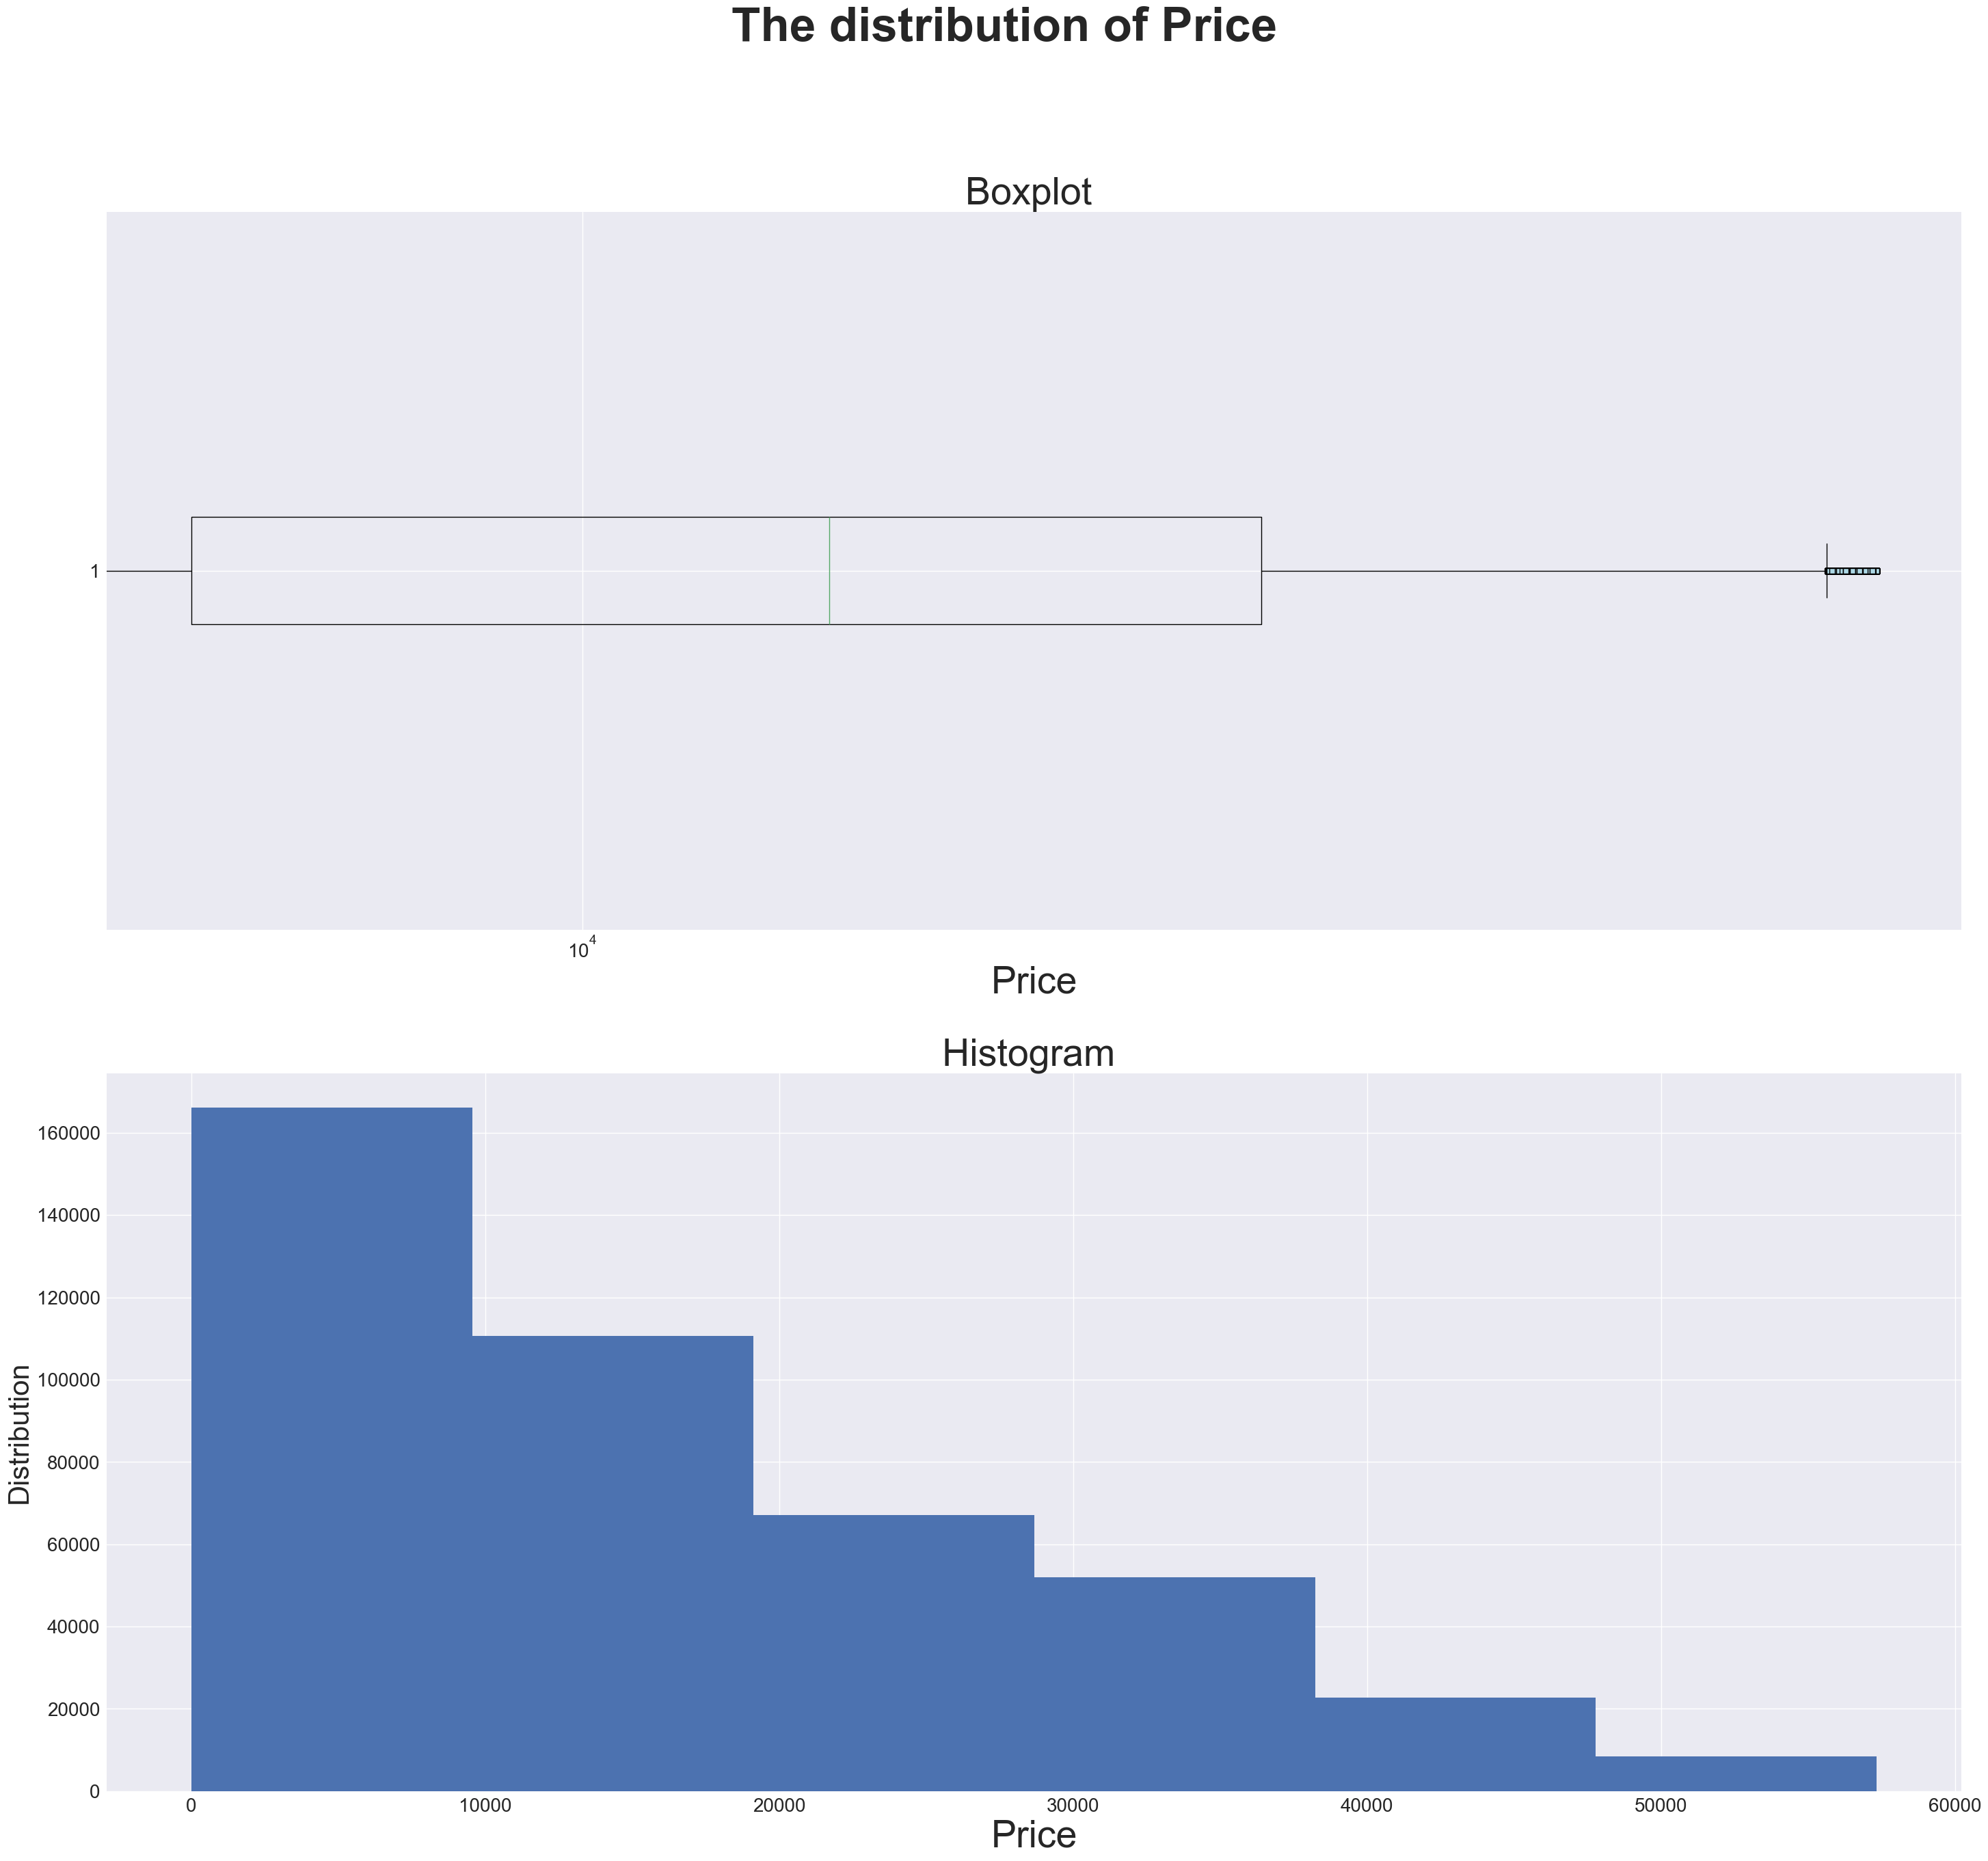

In [108]:
visualize_distribution(df_filled_empty_outliers, "price", "Price", False)

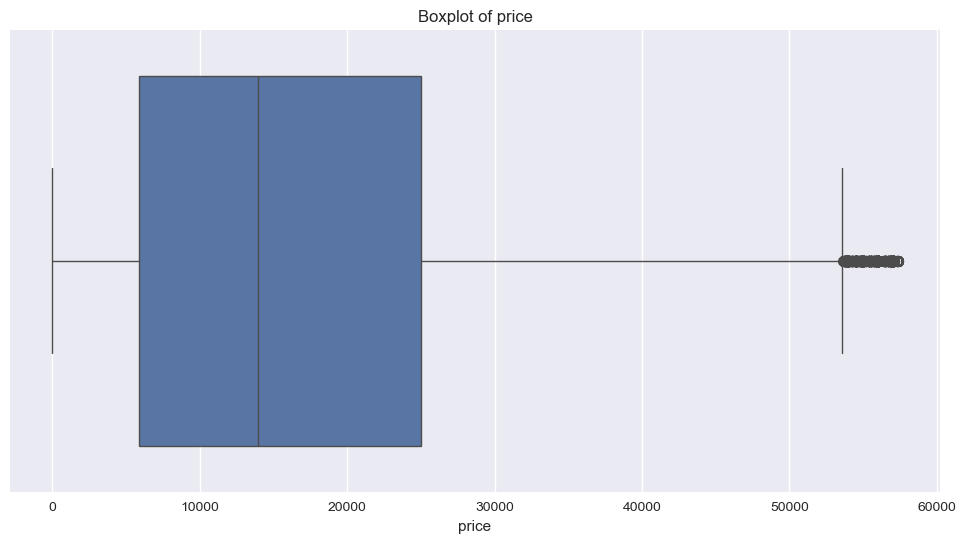

In [109]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers['price'])
plt.title('Boxplot of price')
plt.xlabel('price')
plt.show()

##### Visualize odometer distribution 

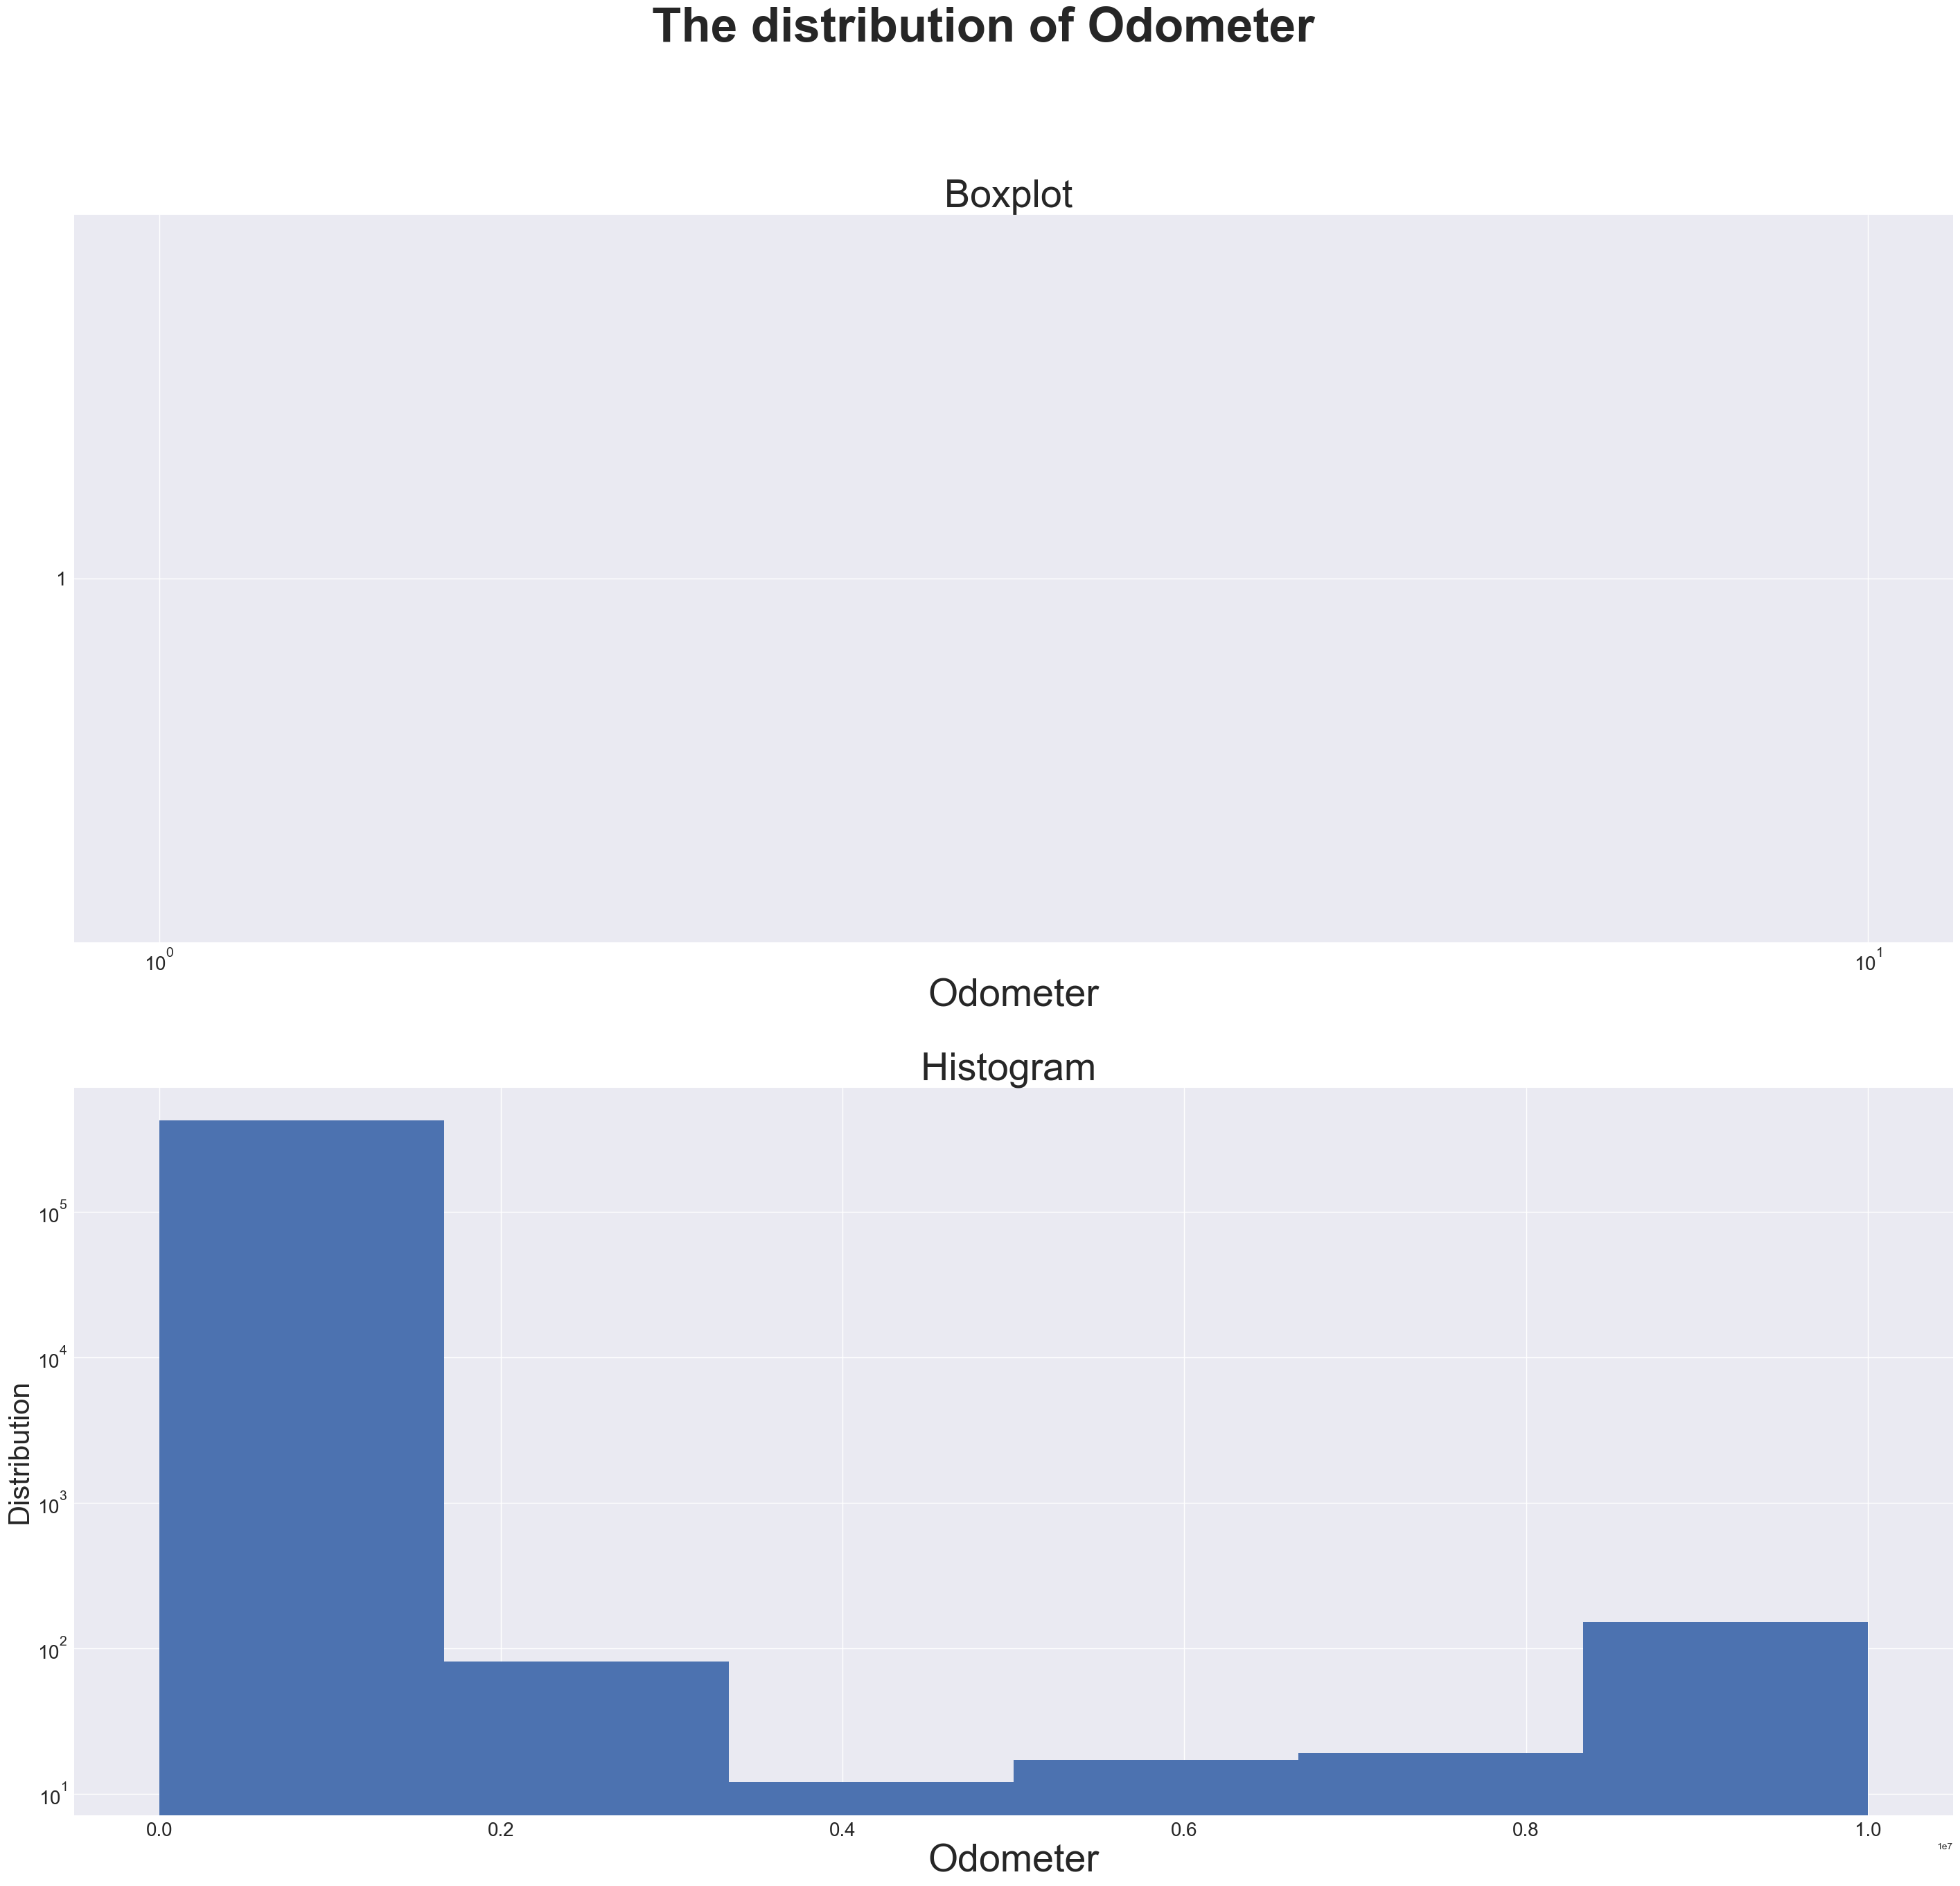

In [110]:
visualize_distribution(df_filled_empty_outliers, "odometer", "Odometer", True)

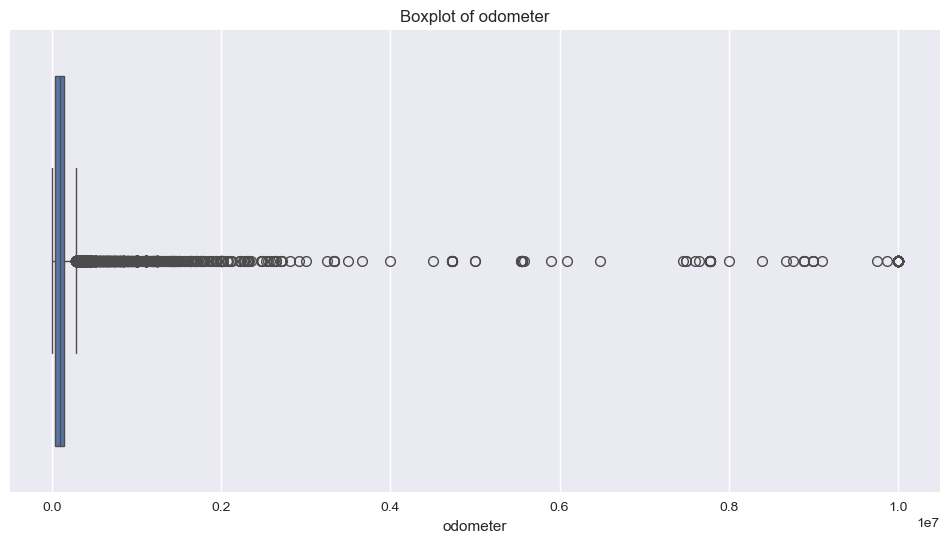

In [111]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('odometer')
plt.show()

##### Get price lower & upper bounds (Q0 & Q4)

In [112]:
lower_bound, upper_bound = calculate_numerical_quartiles("odometer", df_filled_empty_outliers)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -106053.75, Q1: 37704.0, Median: 85548.0, Q3: 133542.5, Upper bound: 277300.25


##### Fill odometer outliers with median

In [113]:
# Calculate the median
median_odometer = df_filled_empty_outliers['odometer'].median()

# Identify and fill outliers with the median value
df_filled_empty_outliers['odometer'] = df_filled_empty_outliers['odometer'].apply(
    lambda x: median_odometer if (x < lower_bound or x > upper_bound) else x
)

##### Get price lower & upper bounds (Q0 & Q4)

In [114]:
lower_bound, upper_bound = calculate_numerical_quartiles("odometer", df_filled_empty_outliers)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -102240.0, Q1: 37704.0, Median: 85548.0, Q3: 131000.0, Upper bound: 270944.0


##### Visualize odometer distribution 

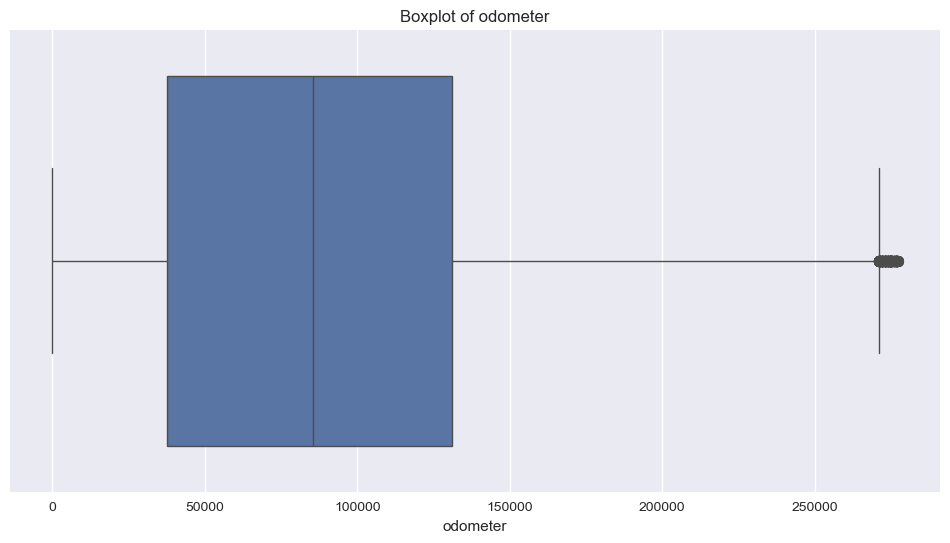

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('odometer')
plt.show()

##### Check dataframe

In [116]:
df_filled_empty_outliers.head().T

,27,28,29,30,31
id,7316814884,7316814758,7316814989,7316743432,7316356412
region,auburn,auburn,auburn,auburn,auburn
price,33590.00,22590.00,39590.00,30990.00,15000.00
year,2014,2010,2020,2017,2013
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders
fuel,gas,gas,gas,gas,gas
odometer,57923.00,71229.00,19160.00,41124.00,128000.00


##### Check correlation

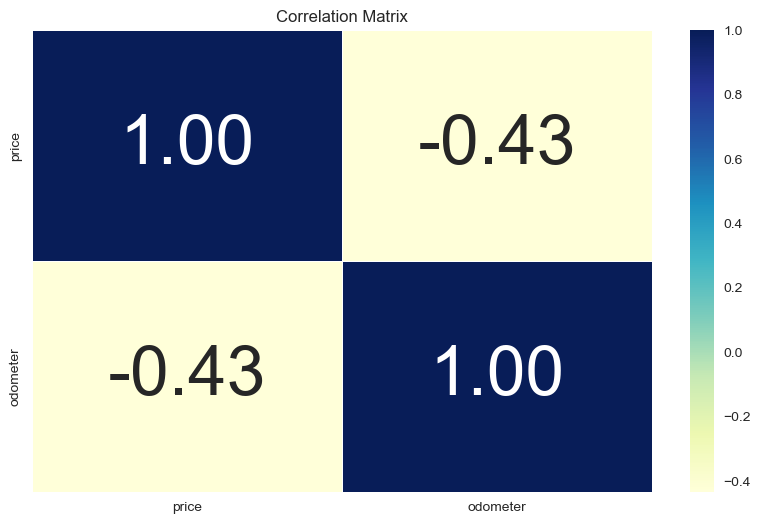

In [117]:
# Drop columns where any of the specified rows contain NaN values
df_temp_numeric = df_filled_empty_outliers.drop(["id", "region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"], axis=1)

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu",
            annot=True)
plt.title('Correlation Matrix')
plt.show()

#### With dynamic median (group by manufacturer)

In [200]:
# Group by manyfacturer
df_filled_empty_outliers_dyn = df_temp_cleaned.copy()

##### Visualize price distribution 

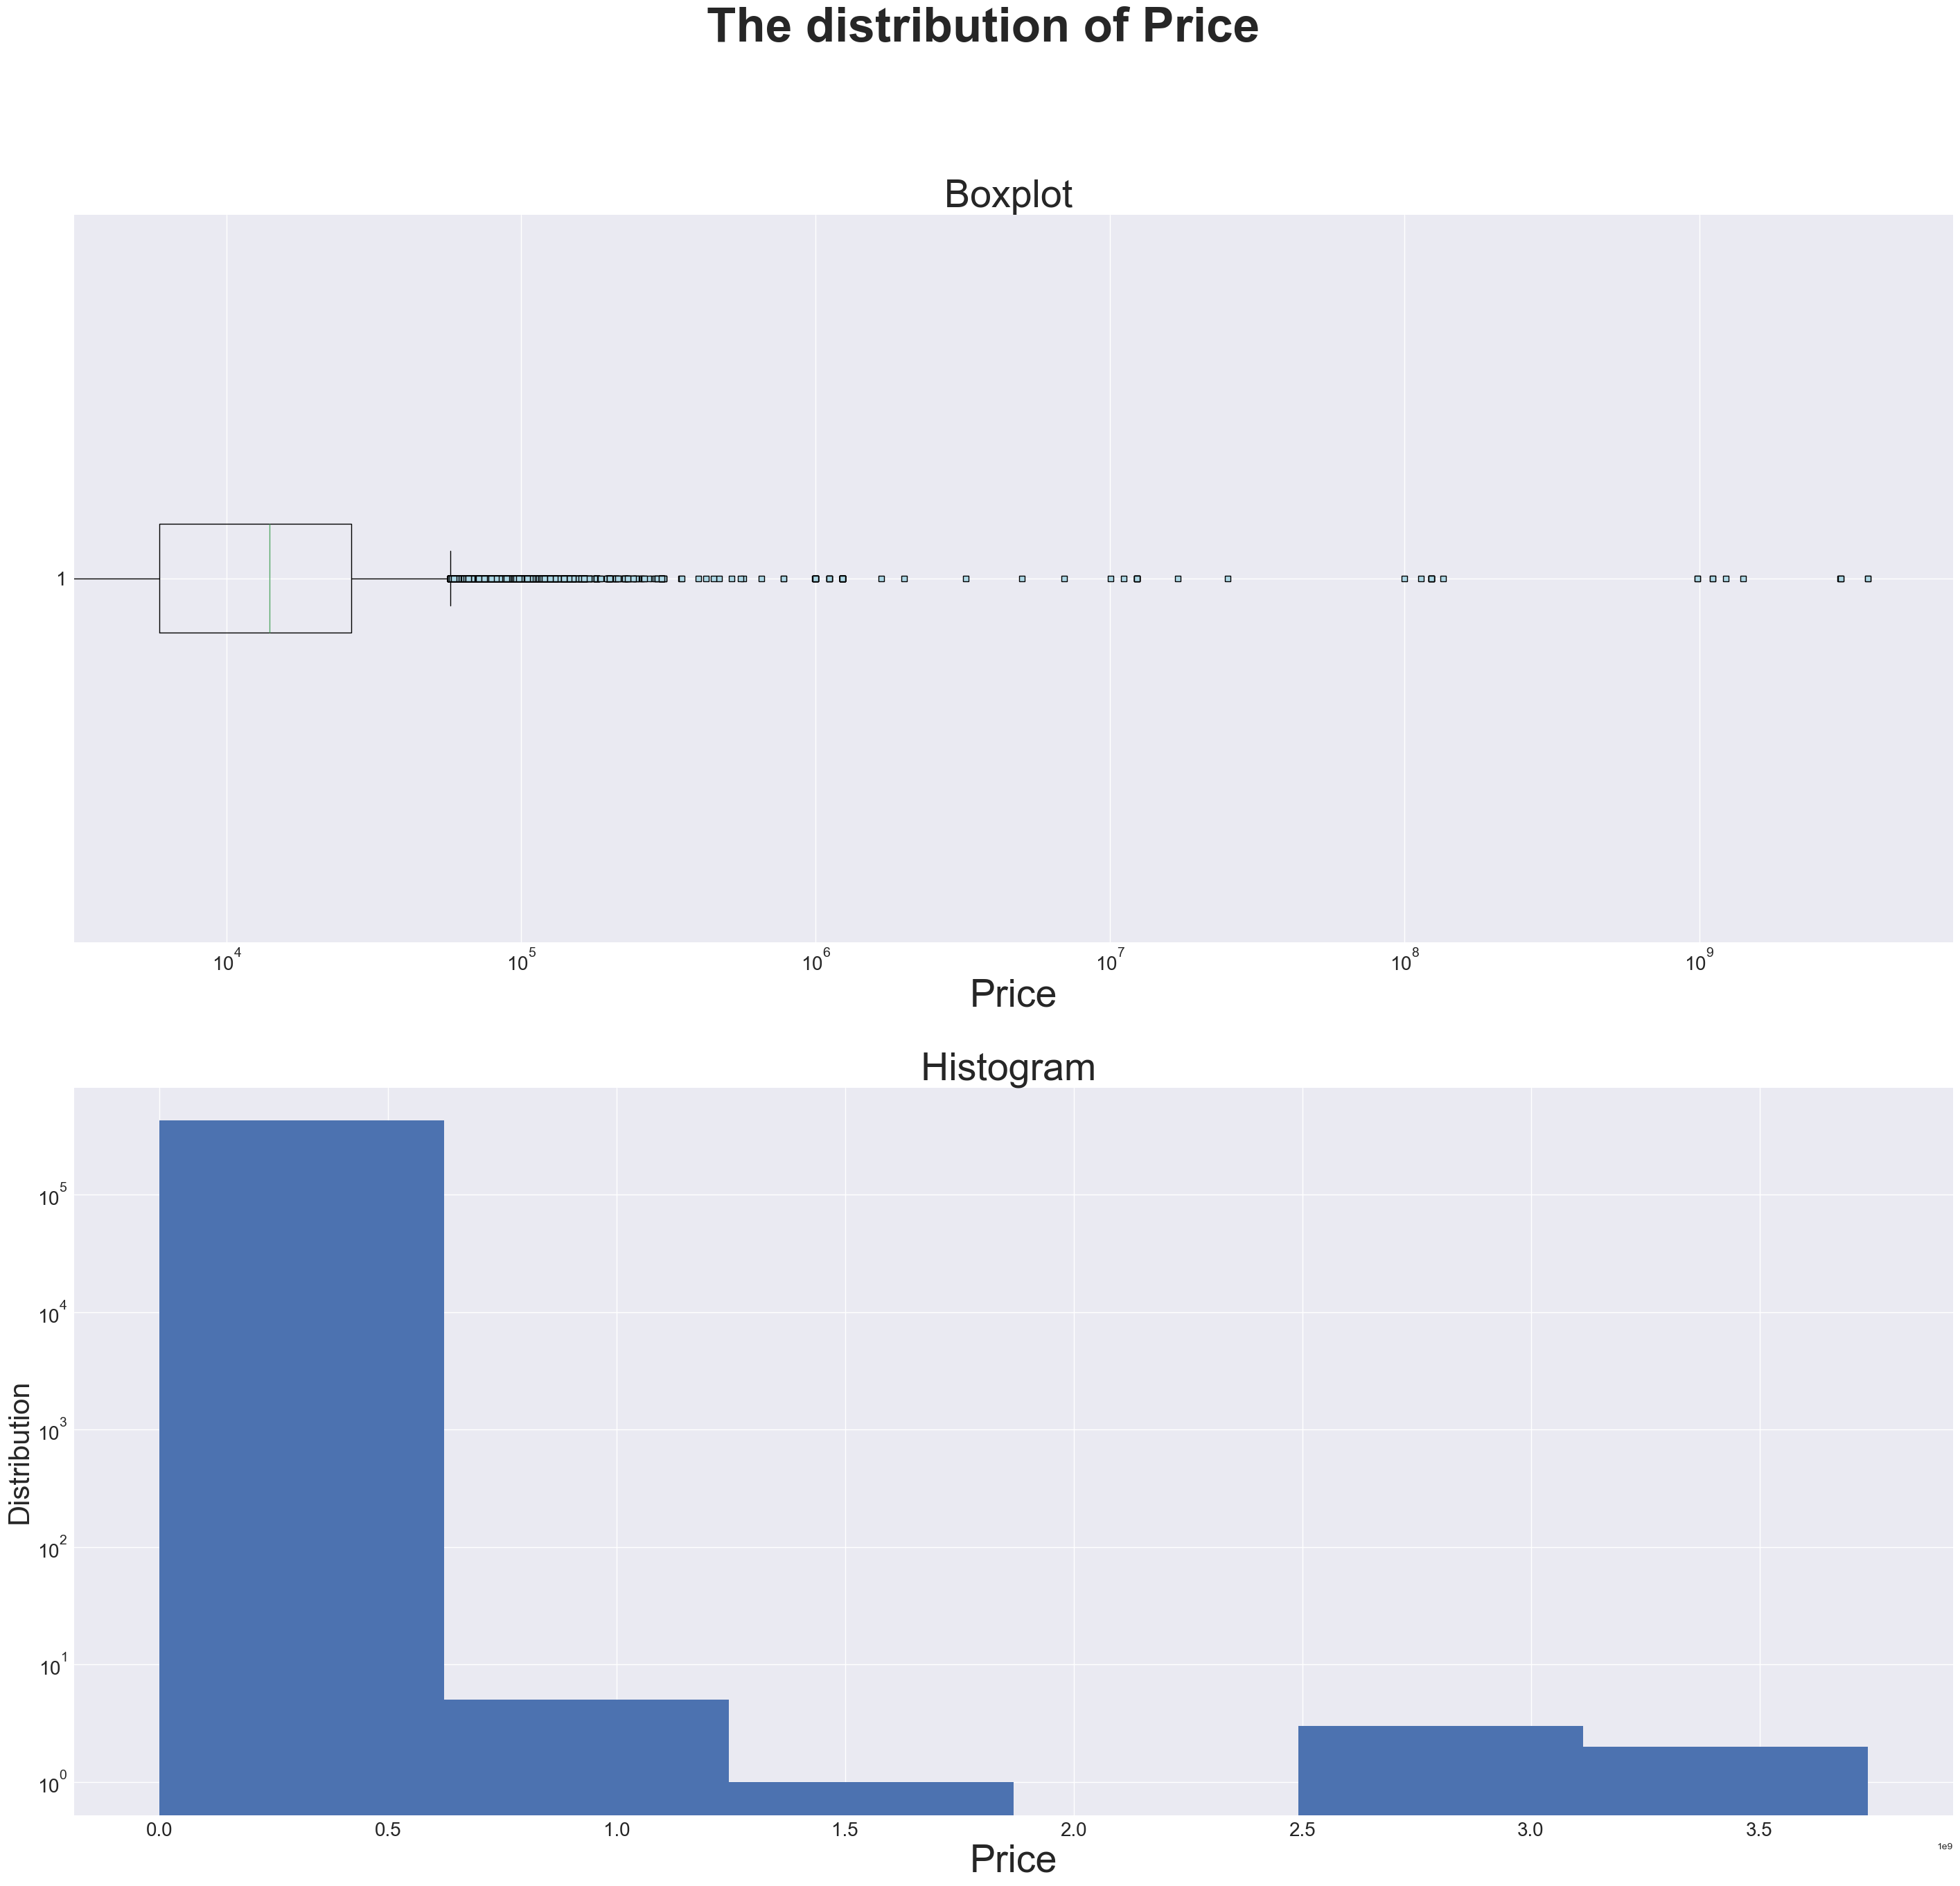

In [201]:
visualize_distribution(df_filled_empty_outliers_dyn, "price", "Price", True)

##### Get price lower & upper bounds (Q0 & Q4)

In [202]:
lower_bound, upper_bound = calculate_numerical_quartiles("price", df_filled_empty_outliers_dyn)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -24986.5, Q1: 5900.0, Median: 13950.0, Q3: 26491.0, Upper bound: 57377.5


##### Fill price outliers with median

In [160]:
# Calculate the median
median_price = df_filled_empty_outliers_dyn['price'].median()

# Fill NaN values in the 'manufacturer' column with a placeholder
df_filled_empty_outliers_dyn['manufacturer'] = df_filled_empty_outliers_dyn['manufacturer'].fillna('Unknown')

# Calculate median price for each manufacturer
median_price_per_manufacturer = df_filled_empty_outliers_dyn.groupby('manufacturer')['price'].median()

# Function to replace outliers with the median value for each manufacturer
def replace_outliers(row, column, lower_bound, upper_bound, medians, general_median):
    if (row[column] < lower_bound or row[column] > upper_bound):
        if medians[row['manufacturer']] < lower_bound or medians[row['manufacturer']] > upper_bound:
            return general_median
        else:        
            return medians[row['manufacturer']]
    else:
        return row[column]

# Apply the function to replace outliers
df_filled_empty_outliers_dyn['price'] = df_filled_empty_outliers_dyn.apply(
    replace_outliers, axis=1, args=("price", lower_bound, upper_bound, median_price_per_manufacturer, median_price)
)

##### Get price lower & upper bounds (Q0 & Q4)

In [123]:
lower_bound, upper_bound = calculate_numerical_quartiles("price", df_filled_empty_outliers_dyn)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -22750.0, Q1: 5900.0, Median: 13888.0, Q3: 25000.0, Upper bound: 53650.0


##### Visualize price distribution 

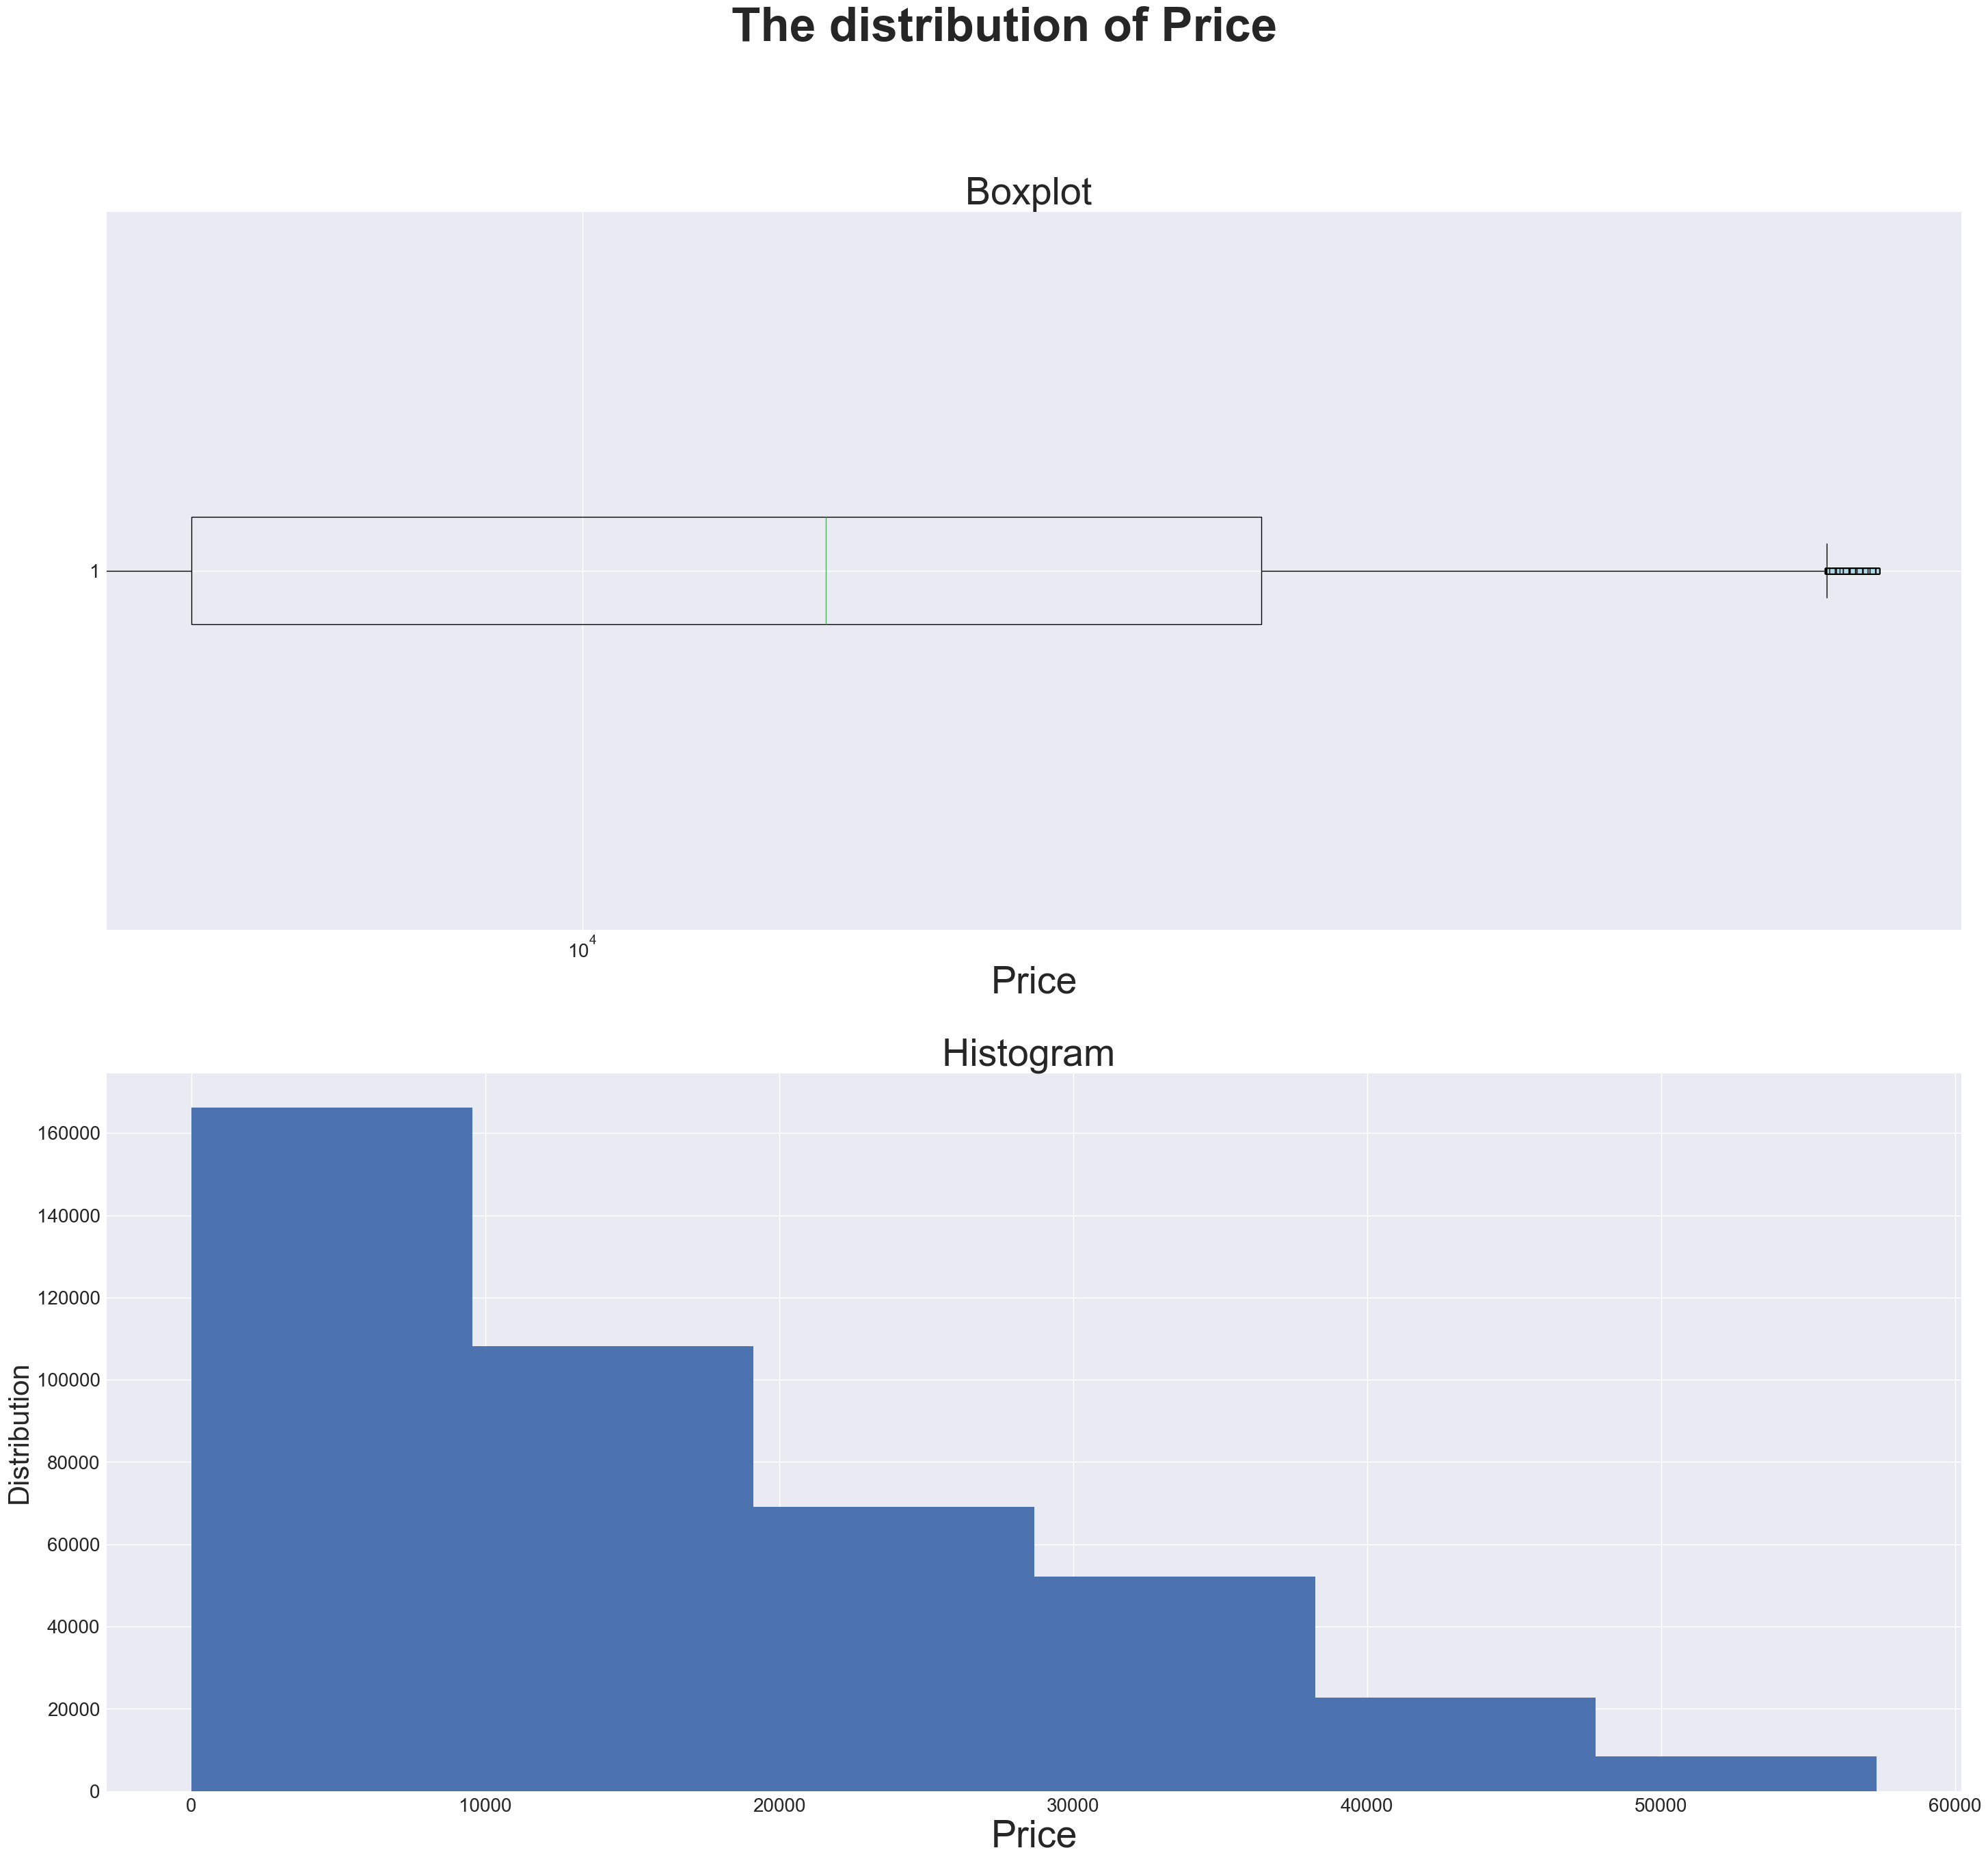

In [124]:
visualize_distribution(df_filled_empty_outliers_dyn, "price", "Price", False)

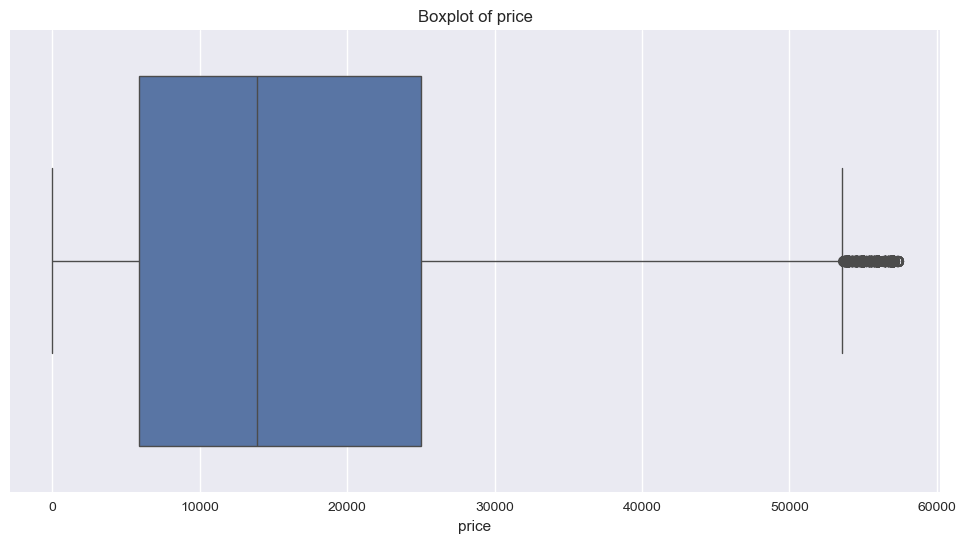

In [125]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers_dyn['price'])
plt.title('Boxplot of price')
plt.xlabel('price')
plt.show()

##### Visualize odometer distribution 

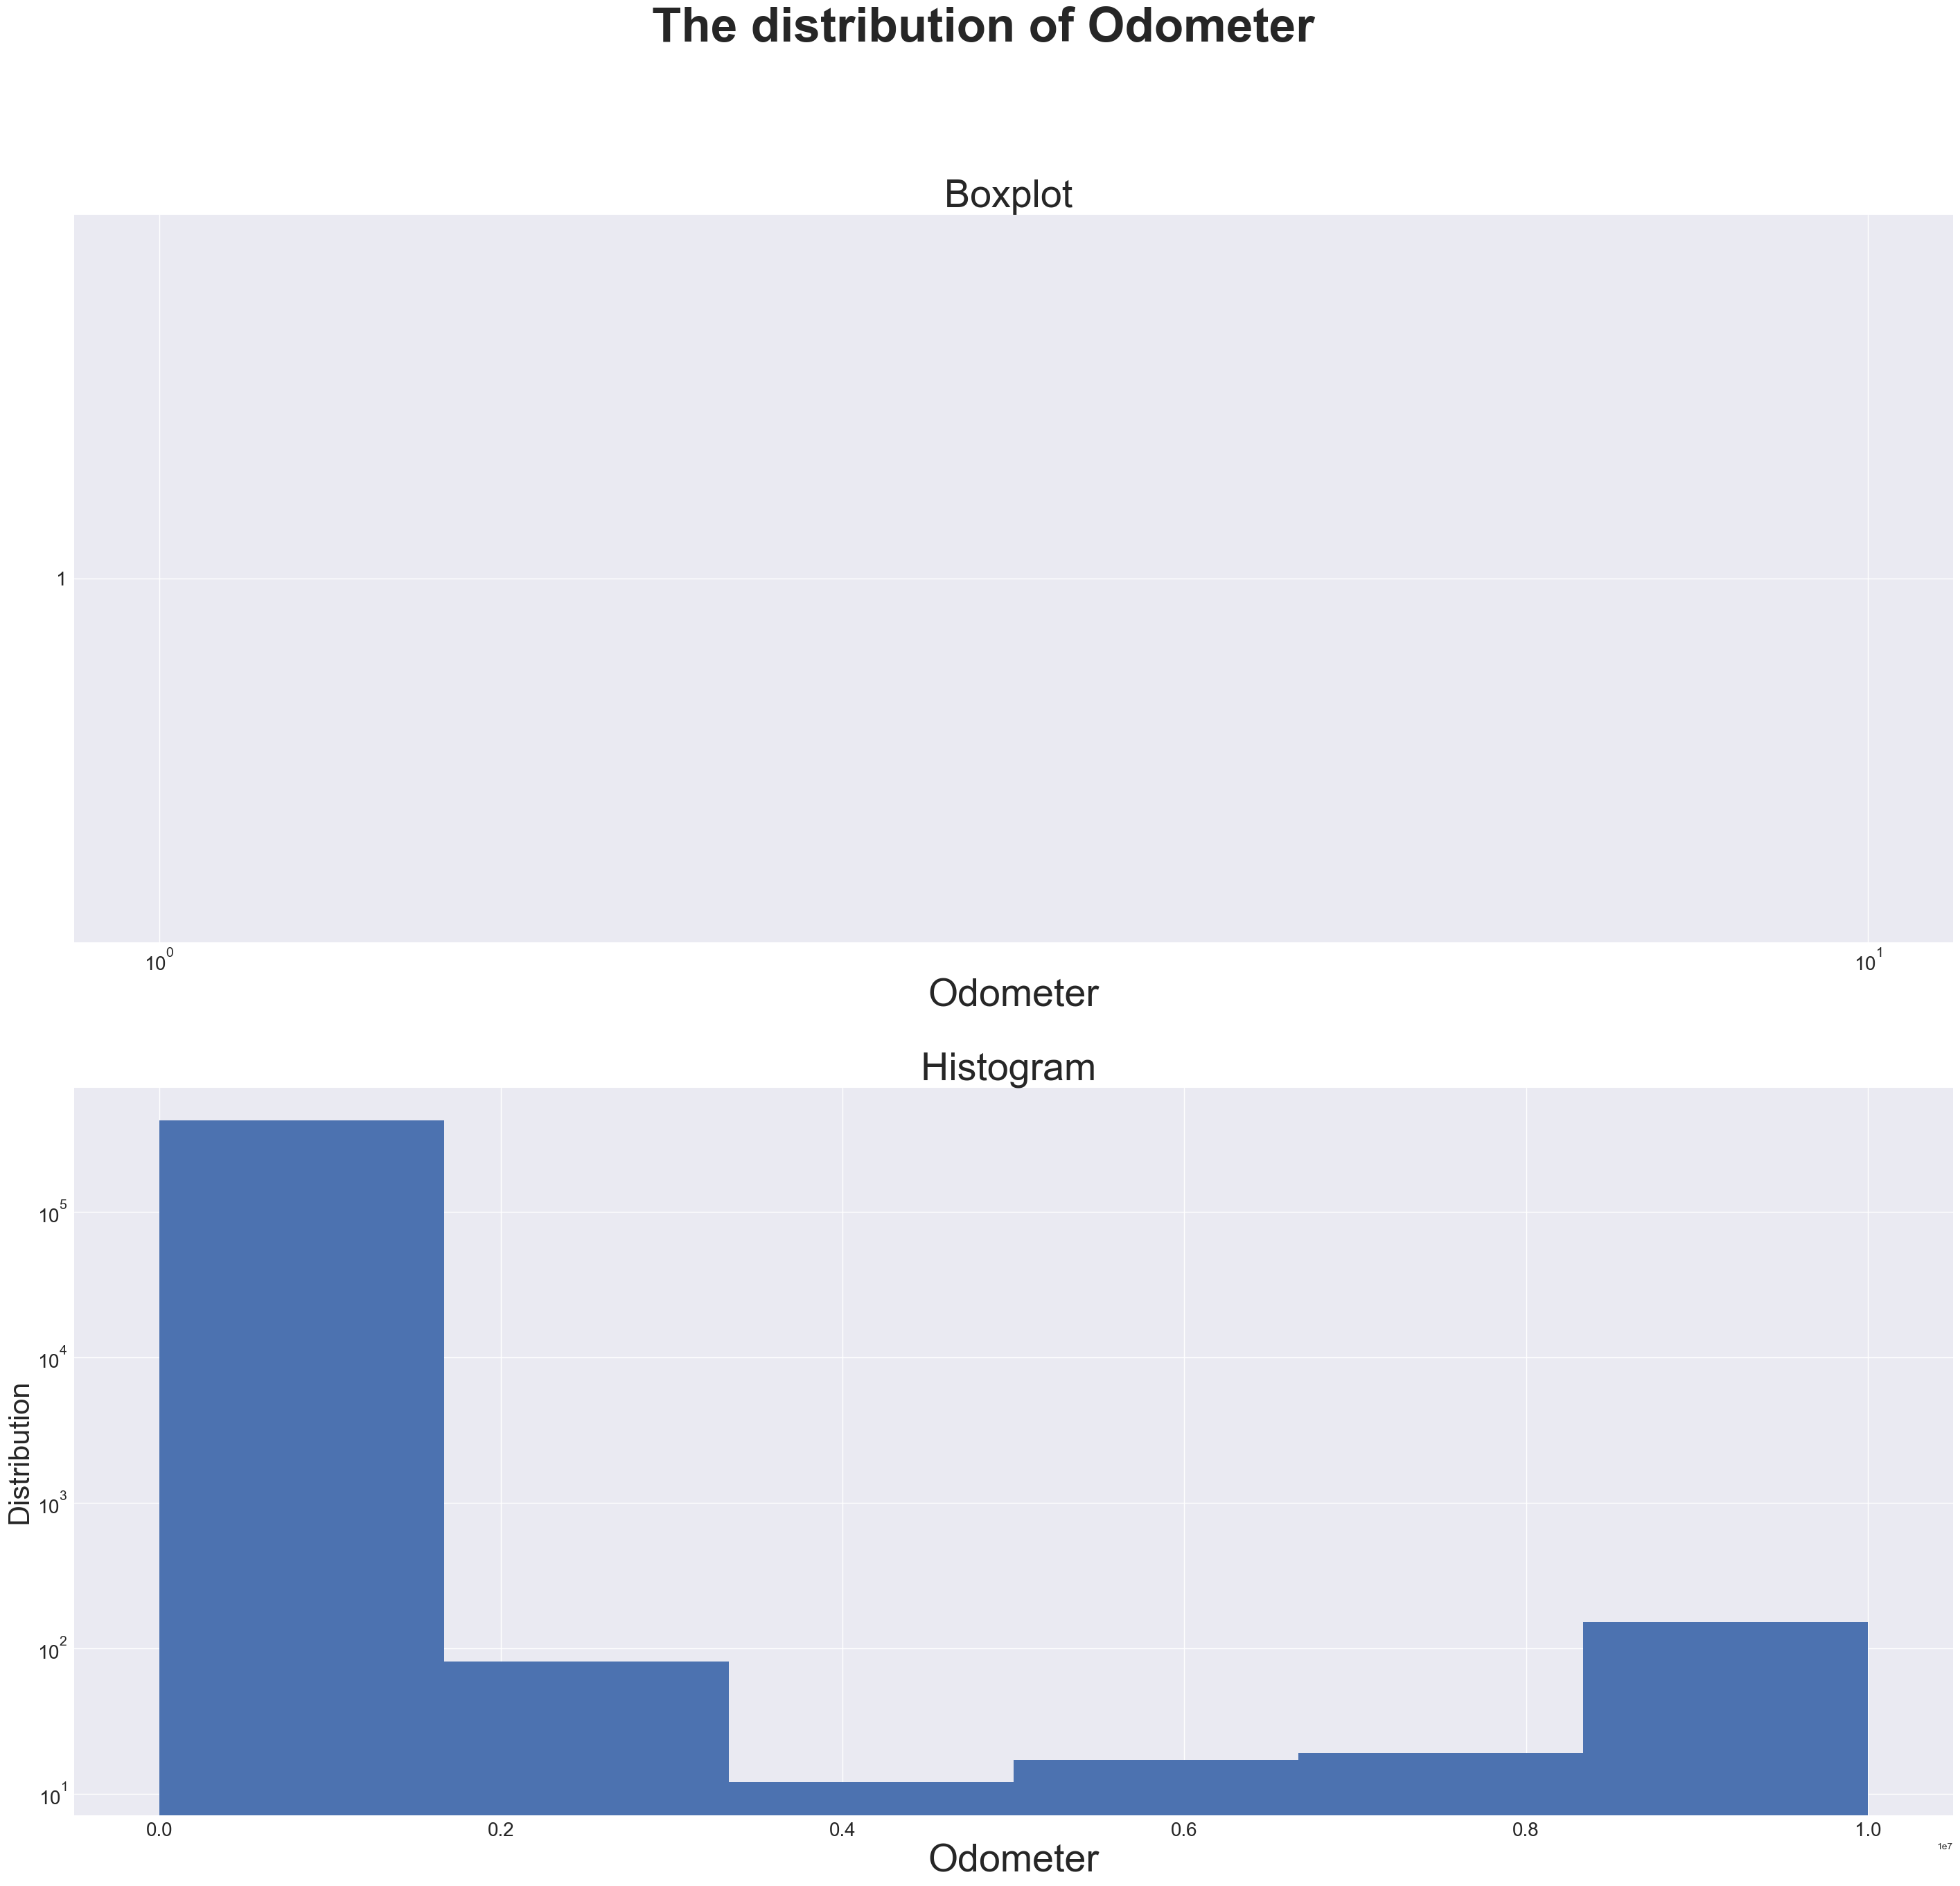

In [126]:
visualize_distribution(df_filled_empty_outliers_dyn, "odometer", "Odometer", True)

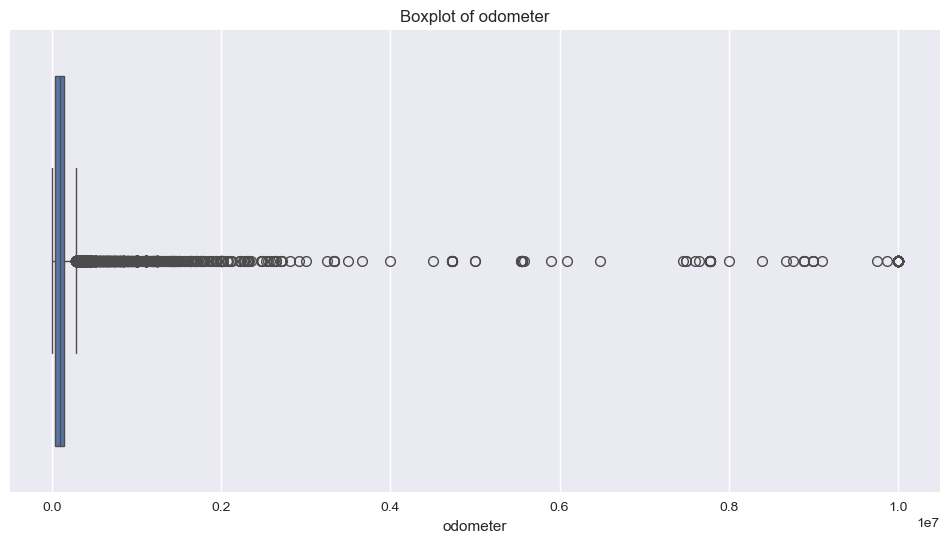

In [127]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers_dyn['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('odometer')
plt.show()

##### Get price lower & upper bounds (Q0 & Q4)

In [128]:
lower_bound, upper_bound = calculate_numerical_quartiles("odometer", df_filled_empty_outliers_dyn)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -106053.75, Q1: 37704.0, Median: 85548.0, Q3: 133542.5, Upper bound: 277300.25


In [129]:
df_filled_empty_outliers_dyn

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,7316814884,auburn,33590.00,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.00,clean,other,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590.00,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.00,clean,other,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590.00,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.00,clean,other,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990.00,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.00,clean,other,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000.00,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.00,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590.00,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.00,clean,other,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590.00,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.00,clean,other,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990.00,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.00,clean,other,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990.00,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.00,clean,other,fwd,NaN,sedan,silver,wy


##### Fill odometer outliers with median

In [130]:
# Calculate the median
median_odometer = df_filled_empty_outliers_dyn['odometer'].median()

# Fill NaN values in the 'manufacturer' column with a placeholder
df_filled_empty_outliers_dyn['manufacturer'] = df_filled_empty_outliers_dyn['manufacturer'].fillna('Unknown')

# Calculate median odometer for each manufacturer
median_odometer_per_manufacturer = df_filled_empty_outliers_dyn.groupby('manufacturer')['odometer'].median()

# Apply the function to replace outliers
df_filled_empty_outliers_dyn['odometer'] = df_filled_empty_outliers_dyn.apply(
    replace_outliers, axis=1, args=("odometer", lower_bound, upper_bound, median_odometer_per_manufacturer, median_odometer)
)

##### Get price lower & upper bounds (Q0 & Q4)

In [131]:
lower_bound, upper_bound = calculate_numerical_quartiles("odometer", df_filled_empty_outliers_dyn)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -102272.5, Q1: 37691.0, Median: 84953.5, Q3: 131000.0, Upper bound: 270963.5


##### Visualize odometer distribution 

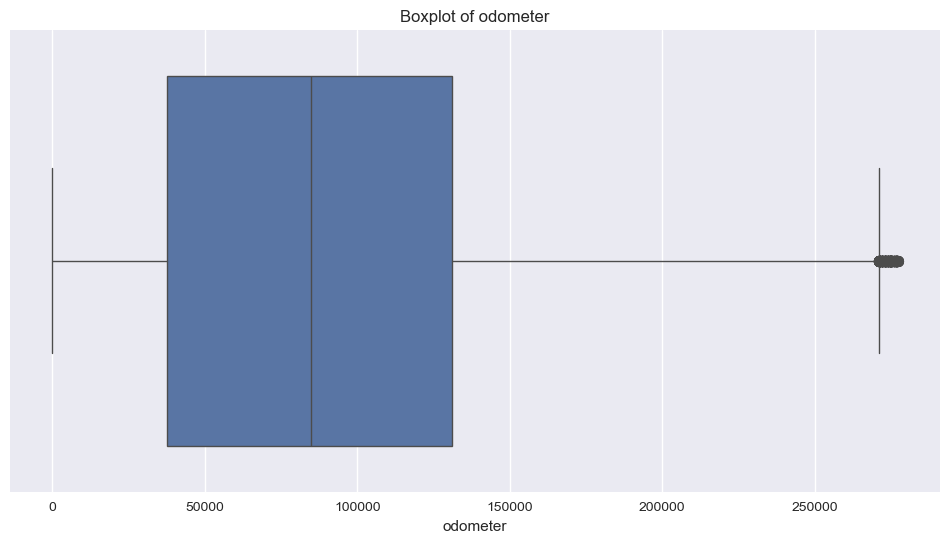

In [132]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers_dyn['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('odometer')
plt.show()

##### Check dataframe

In [133]:
df_filled_empty_outliers_dyn.head().T

,27,28,29,30,31
id,7316814884,7316814758,7316814989,7316743432,7316356412
region,auburn,auburn,auburn,auburn,auburn
price,33590.00,22590.00,39590.00,30990.00,15000.00
year,2014,2010,2020,2017,2013
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders
fuel,gas,gas,gas,gas,gas
odometer,57923.00,71229.00,19160.00,41124.00,128000.00


##### Check correlation

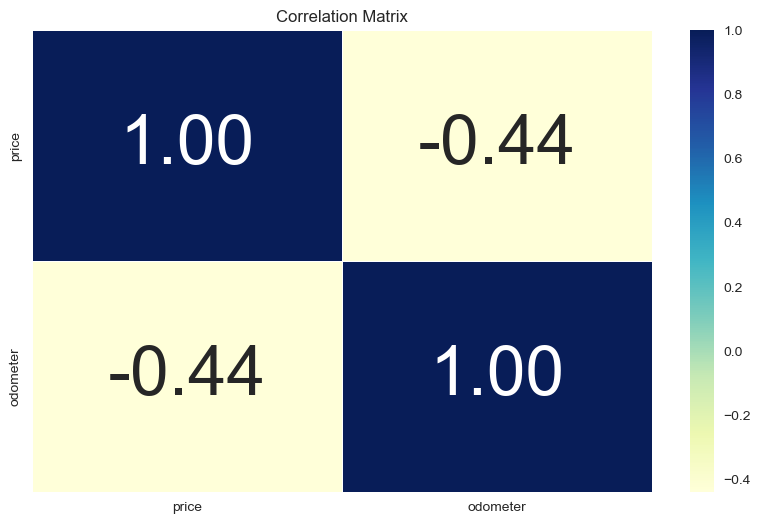

In [134]:
# Drop columns where any of the specified rows contain NaN values
df_temp_numeric = df_filled_empty_outliers_dyn.drop(["id", "region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"], axis=1)

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu",
            annot=True)
plt.title('Correlation Matrix')
plt.show()

#### With dynamic median (group by manufacturer & year)

In [221]:
# Group by year & manufacturer
df_filled_empty_outliers_dyn1 = df_temp_cleaned.copy()

##### Visualize price distribution 

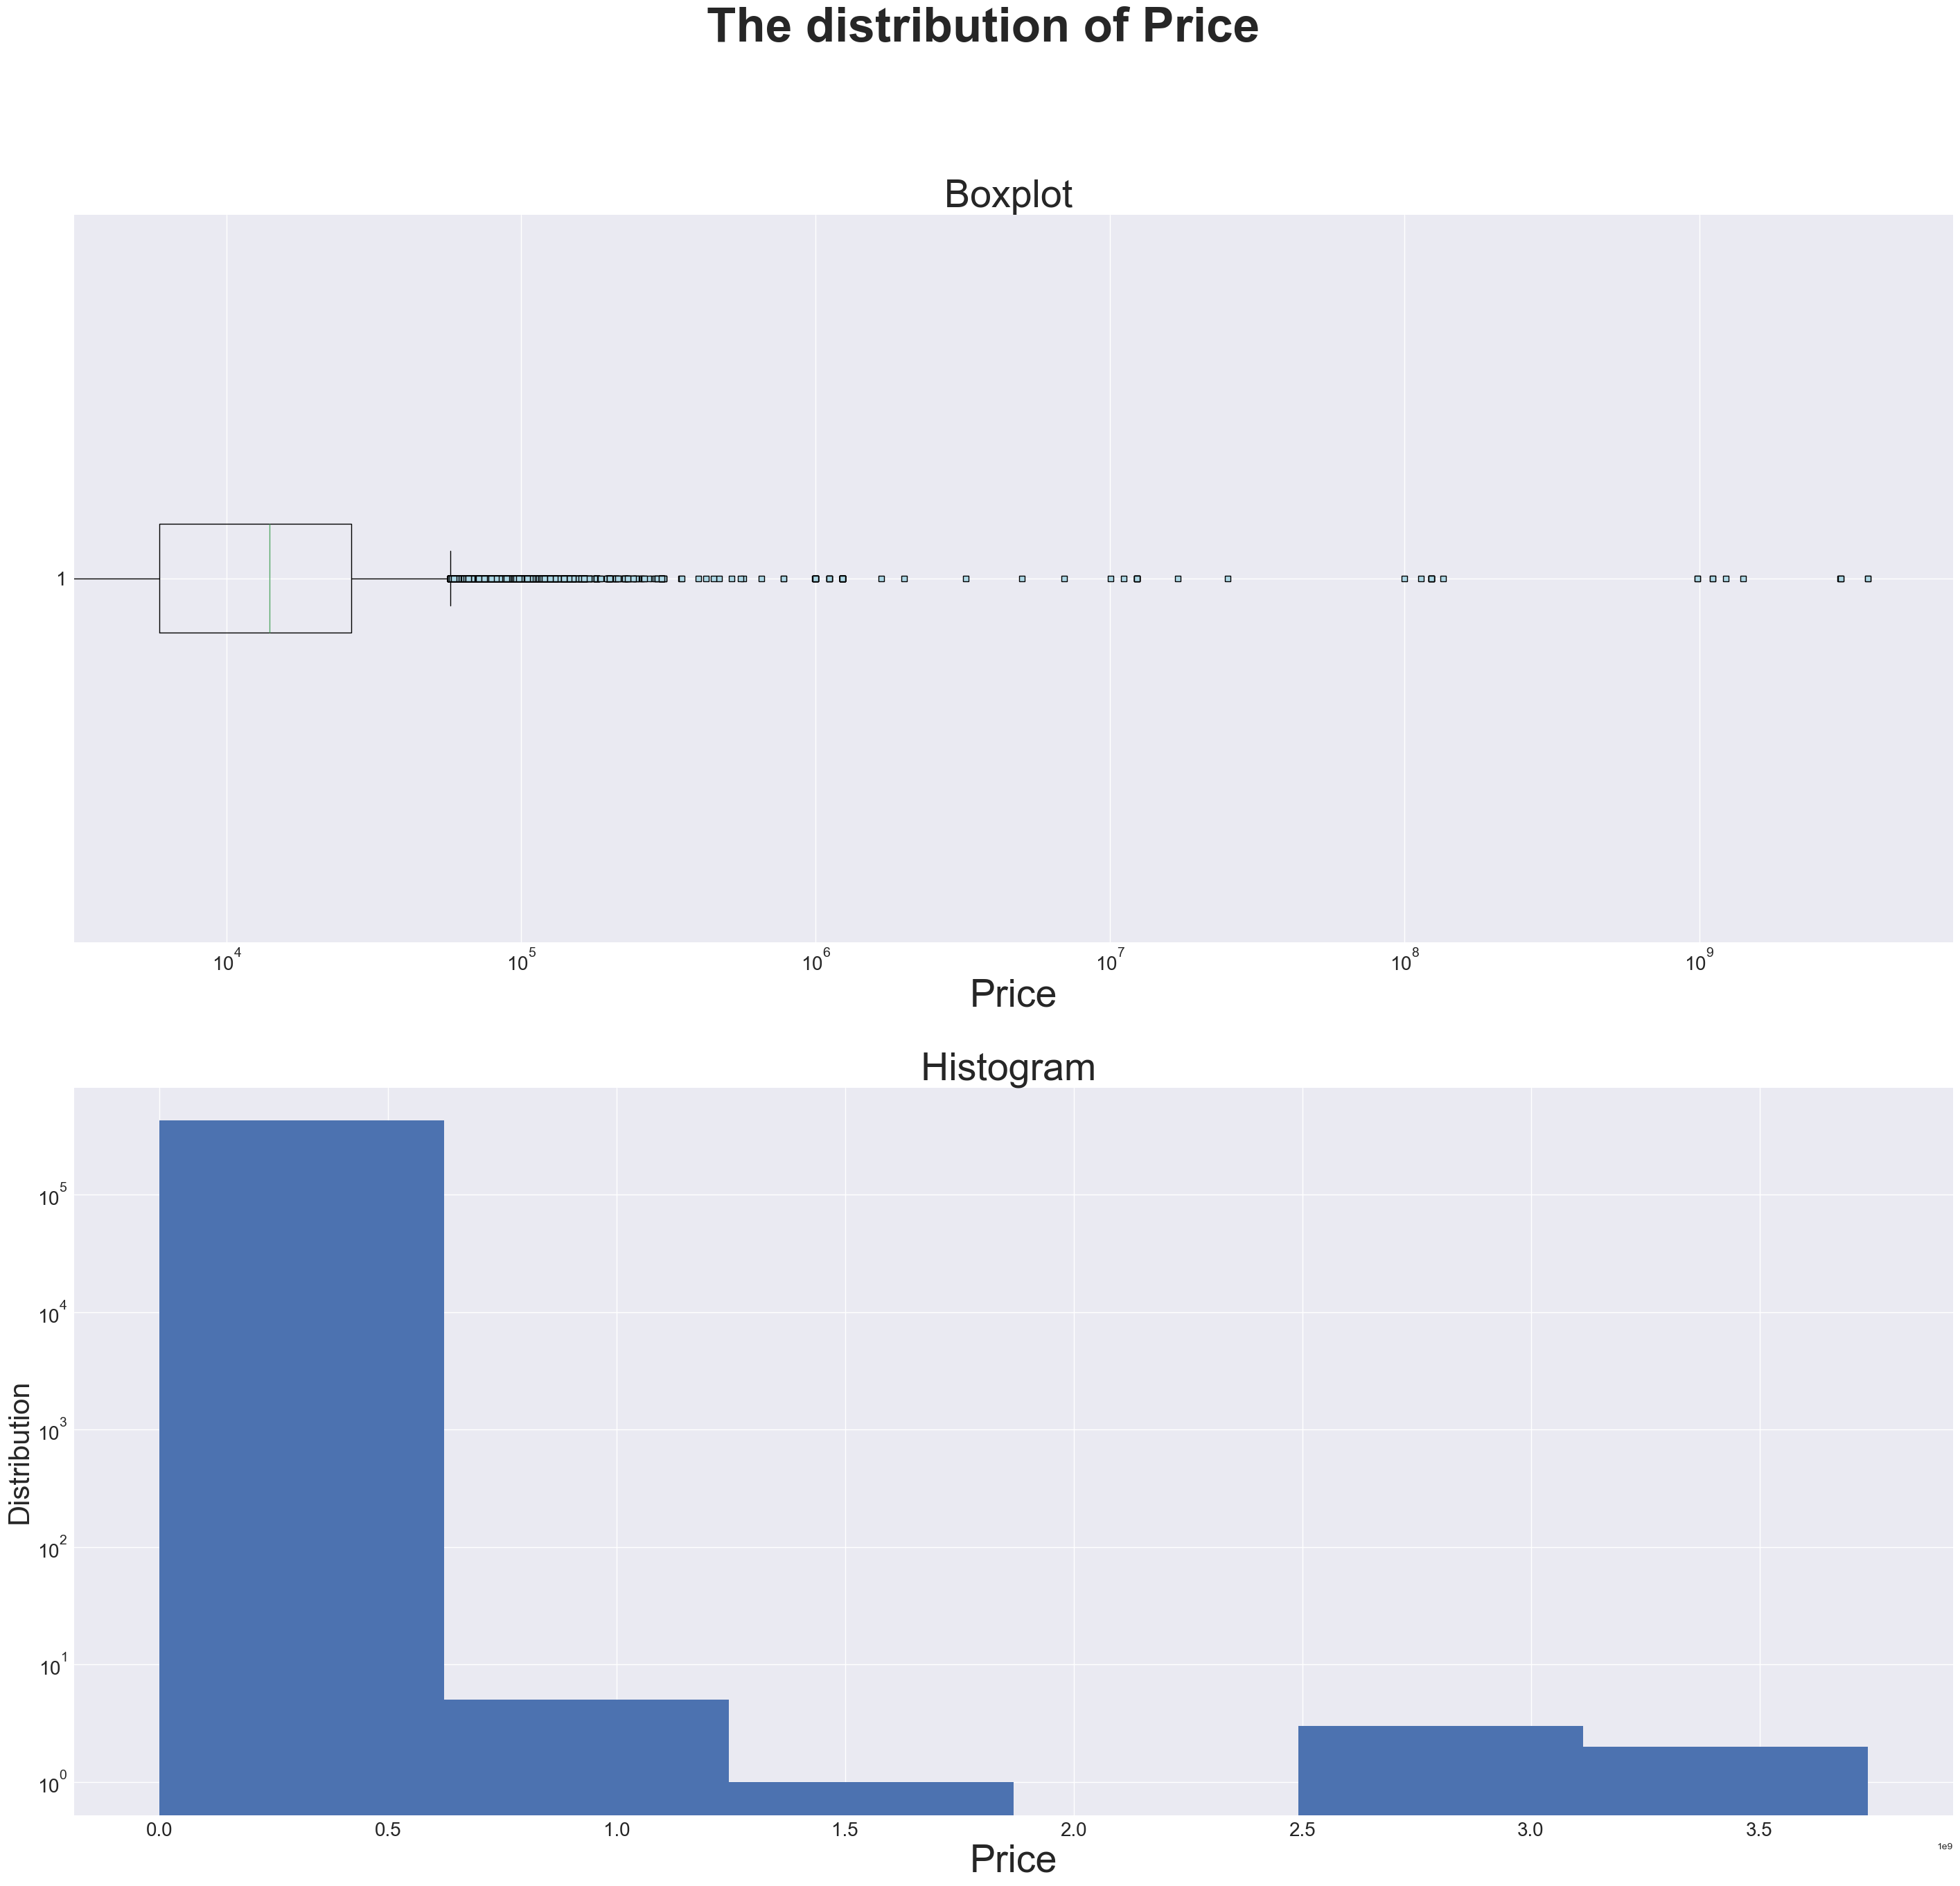

In [222]:
visualize_distribution(df_filled_empty_outliers_dyn1, "price", "Price", True)

##### Get price lower & upper bounds (Q0 & Q4)

In [223]:
lower_bound, upper_bound = calculate_numerical_quartiles("price", df_filled_empty_outliers_dyn1)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -24986.5, Q1: 5900.0, Median: 13950.0, Q3: 26491.0, Upper bound: 57377.5


In [224]:
# Group by manufacturer and year

# Fill NaN values in the 'manufacturer' column with a placeholder
df_filled_empty_outliers_dyn1['manufacturer'] = df_filled_empty_outliers_dyn1['manufacturer'].fillna('Unknown')

# Calculate median price for each manufacturer and year group
# median_price_per_group = df_filled_empty_outliers_dyn1.groupby(['manufacturer', 'year'])['price'].median()

median_price_per_group = df_filled_empty_outliers_dyn1.groupby(['manufacturer', 'year'])['price'].median().reset_index()
median_price_per_group = median_price_per_group.rename(columns={'price': 'median_price'})

# Merge the median prices back into the original dataframe
df_filled_empty_outliers_dyn1 = df_filled_empty_outliers_dyn1.merge(
    median_price_per_group, on=['manufacturer', 'year'], how='left'
)

# General median price
general_median_price = df_filled_empty_outliers_dyn1['price'].median()

# Function to replace outliers with the median value for each manufacturer and year group
def replace_outliers(row, column, lower_bound, upper_bound, general_median):
    if row[column] < lower_bound or row[column] > upper_bound:
        if row['median_price'] < lower_bound or row['median_price'] > upper_bound:
            return general_median
        else:
            return row['median_price']
    else:
        return row[column]

# Apply the function to replace outliers
df_filled_empty_outliers_dyn1['price'] = df_filled_empty_outliers_dyn1.apply(
    lambda row: replace_outliers(row, 'price', lower_bound, upper_bound, general_median_price), axis=1
)

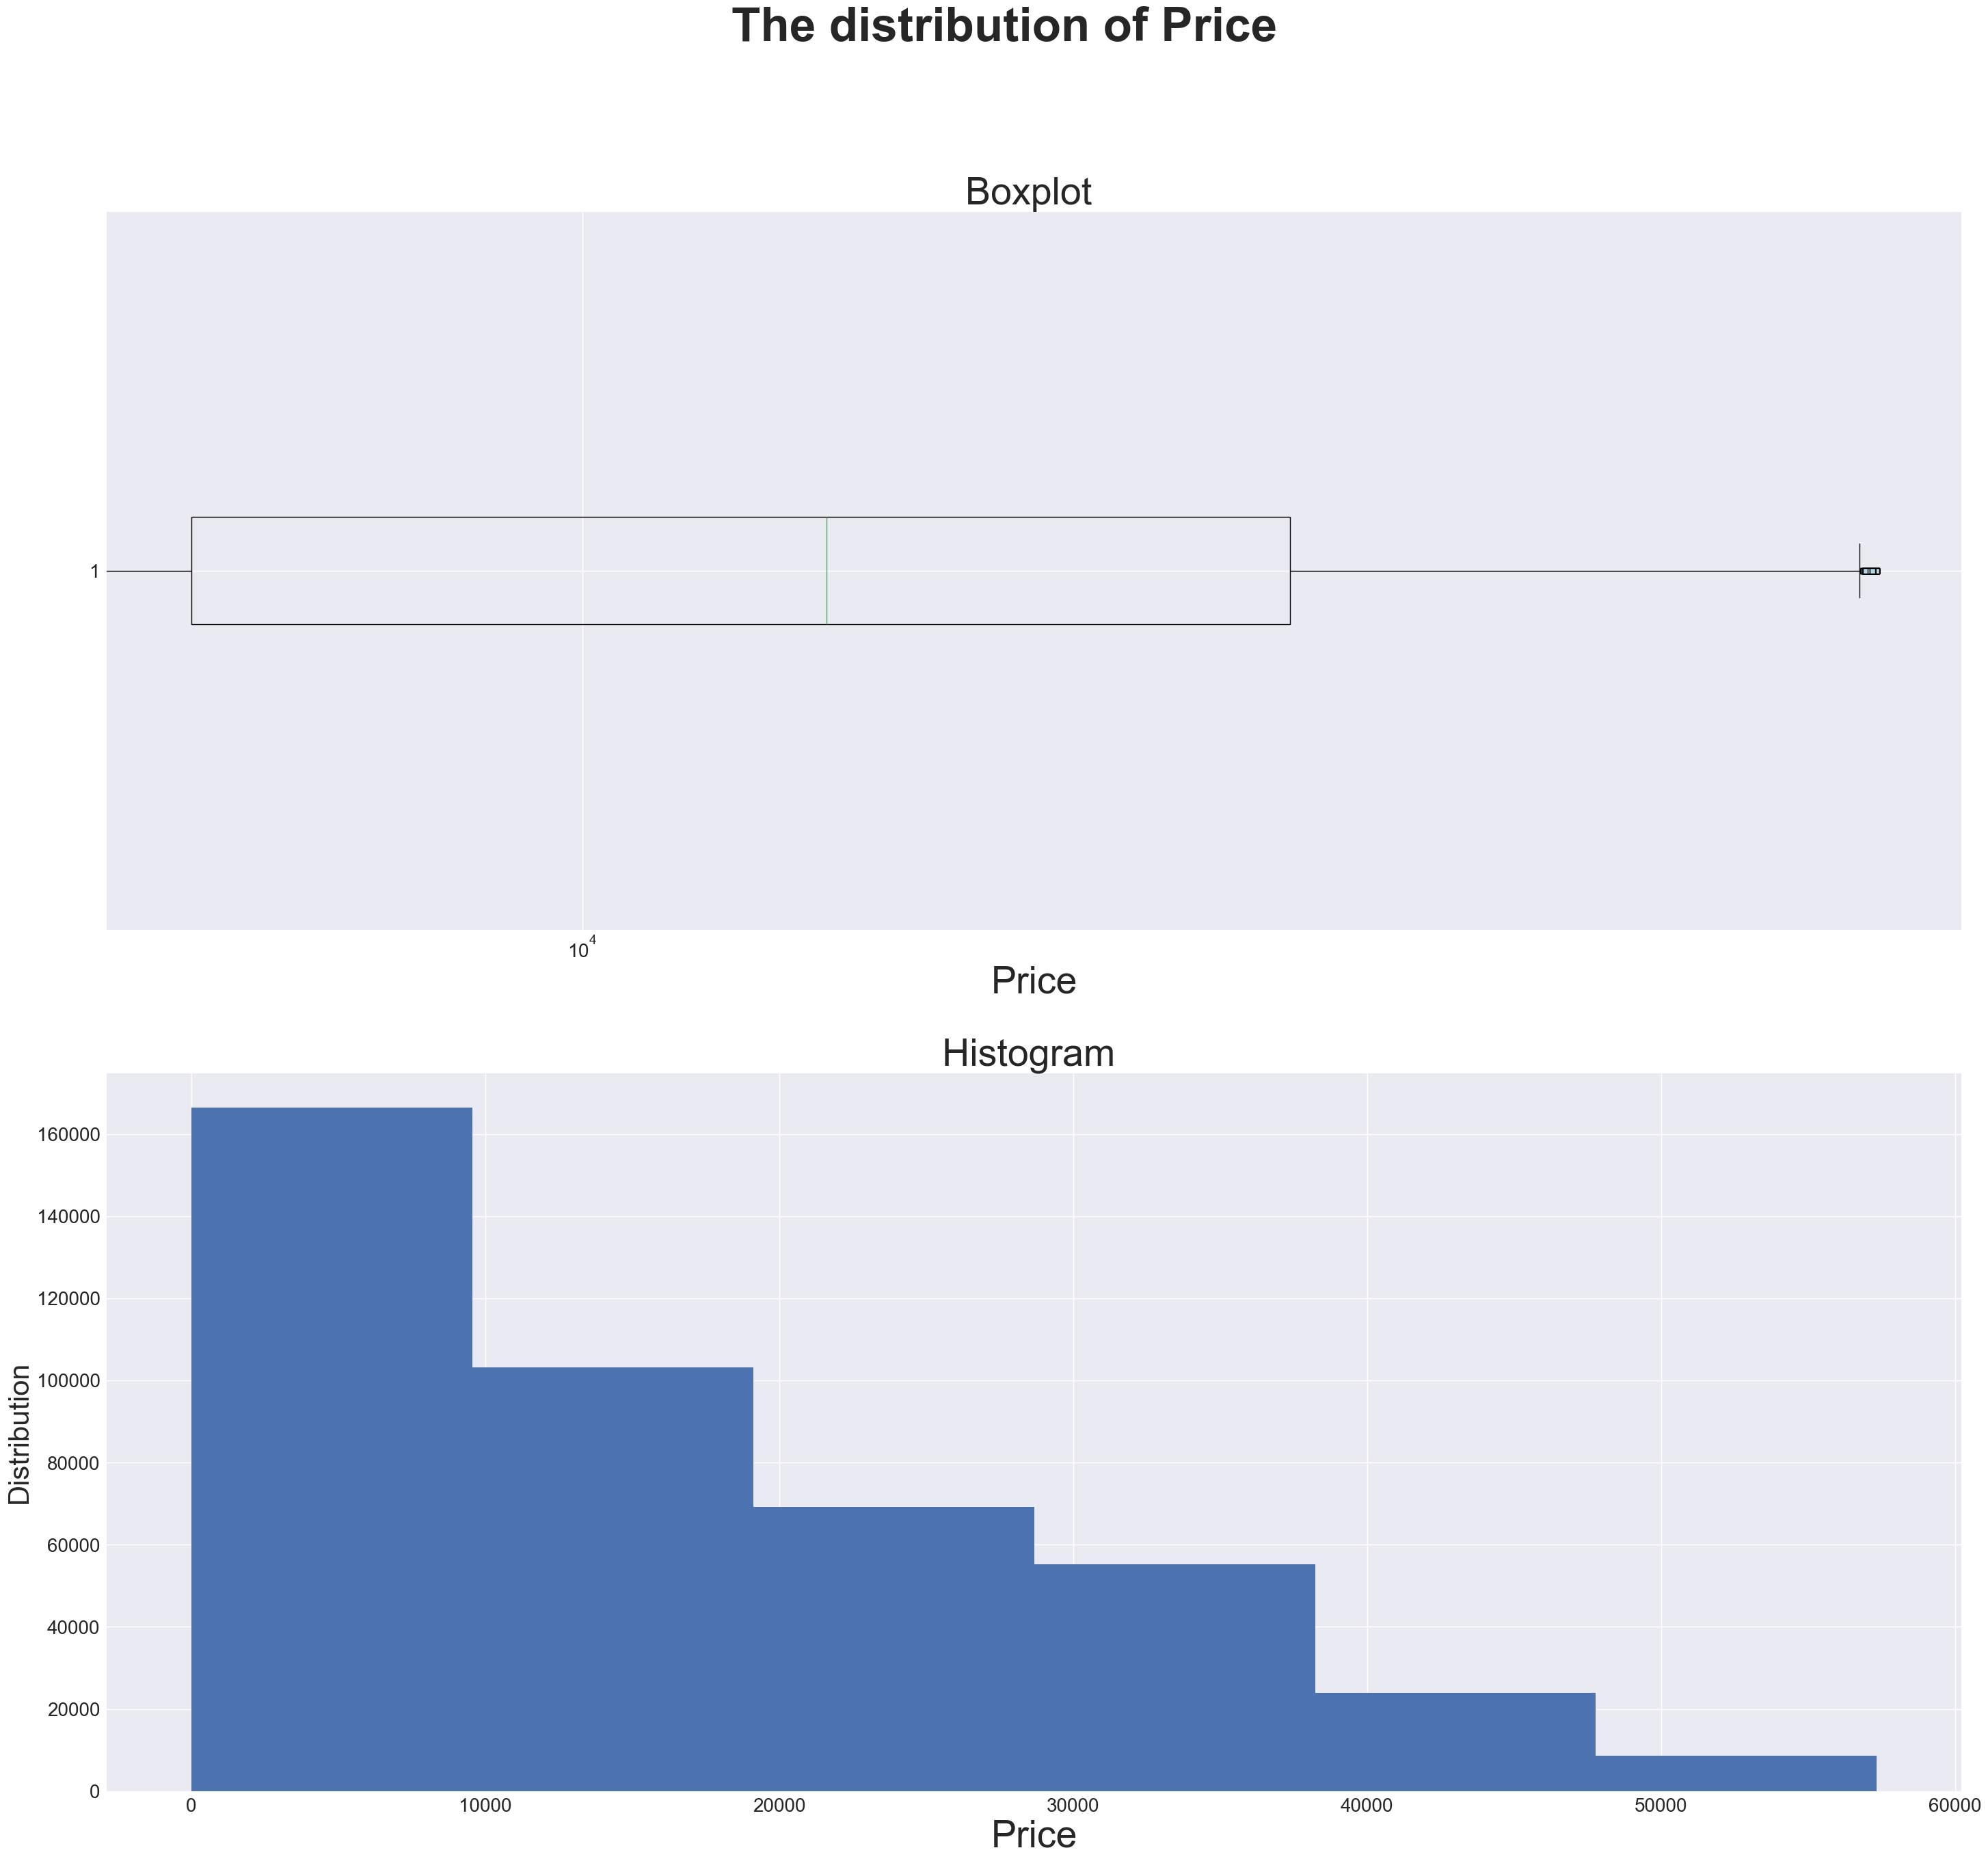

In [225]:
visualize_distribution(df_filled_empty_outliers_dyn1, "price", "Price", False)

##### Visualize odometer distribution 

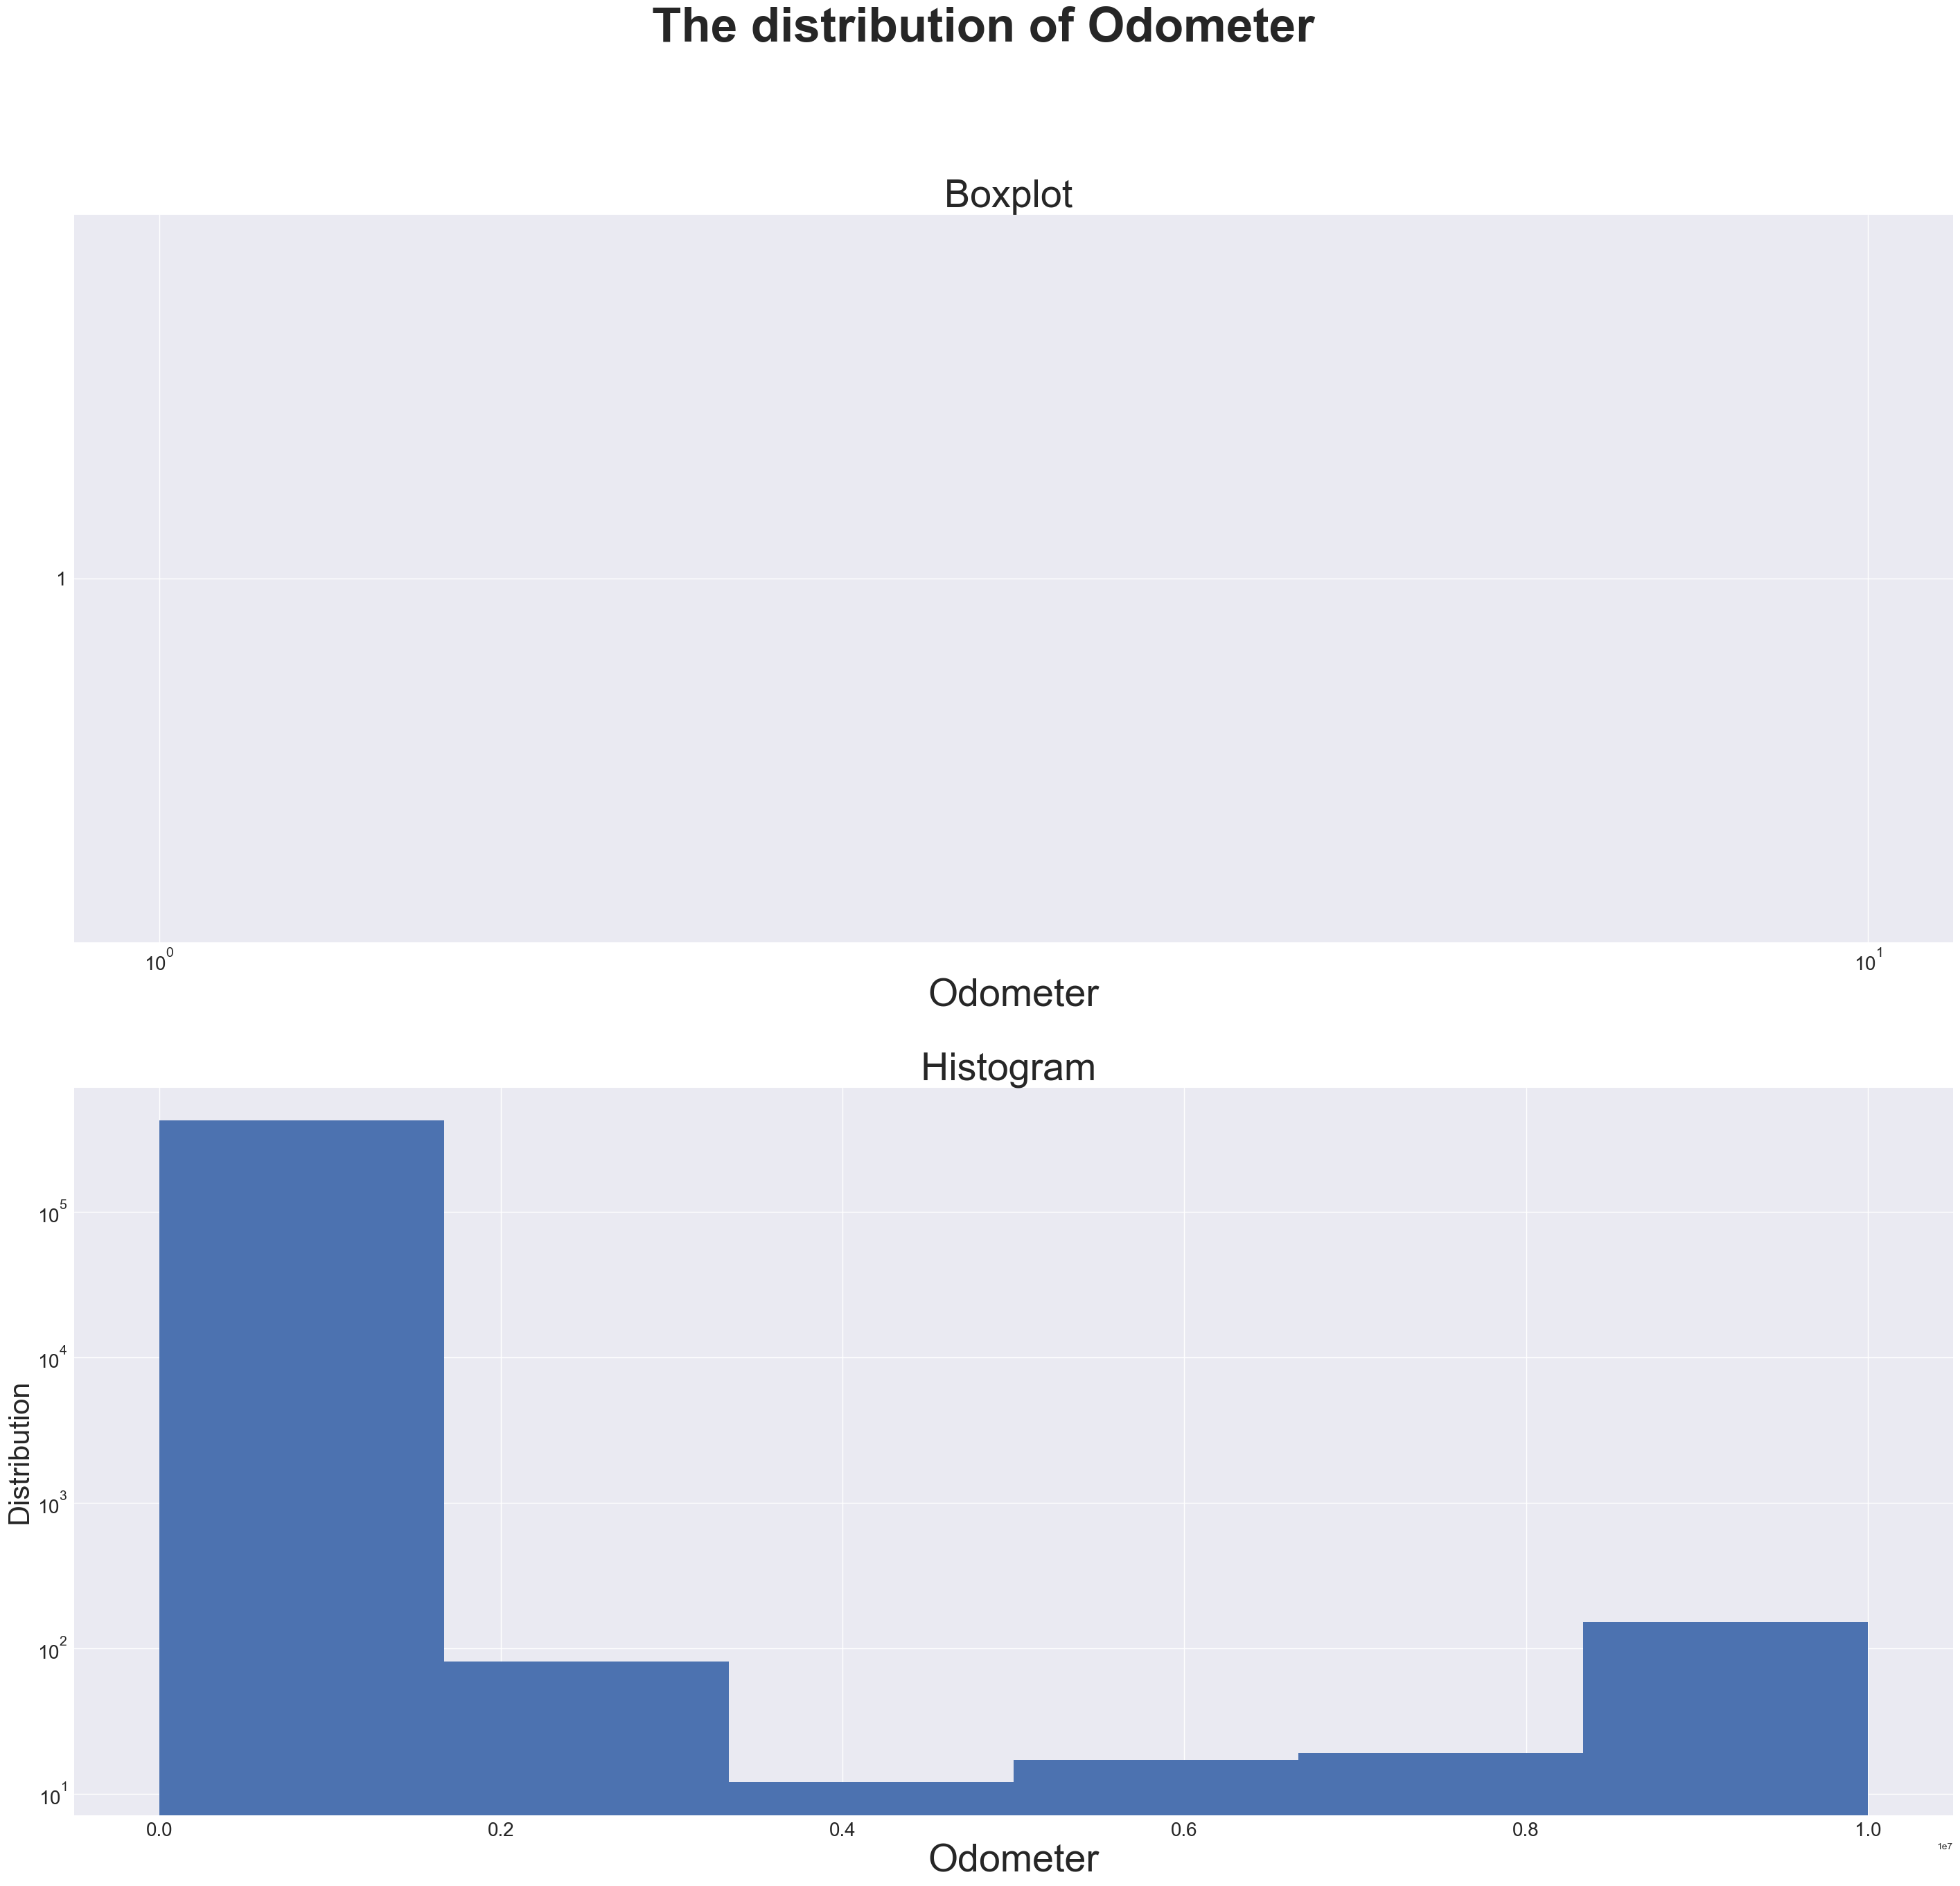

In [226]:
visualize_distribution(df_filled_empty_outliers_dyn1, "odometer", "Odometer", True)

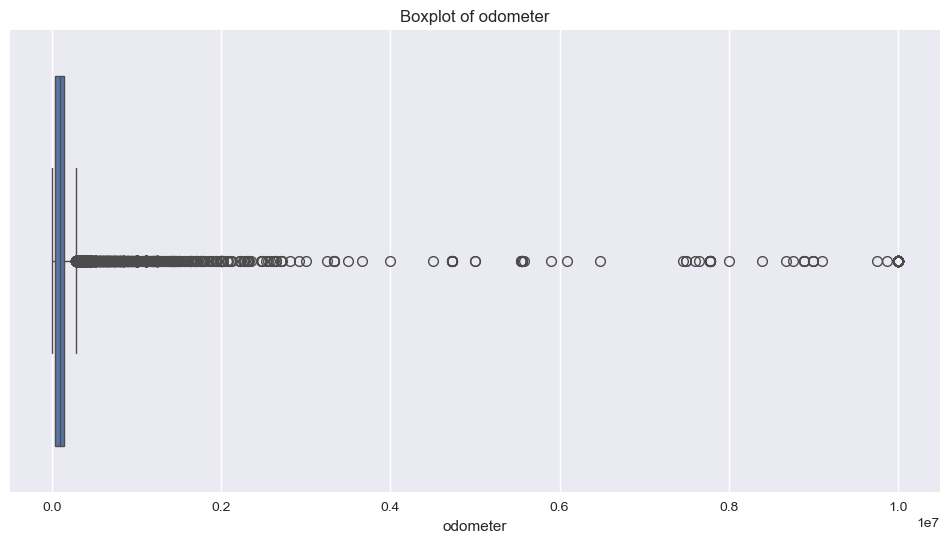

In [227]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers_dyn1['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('odometer')
plt.show()

##### Get price lower & upper bounds (Q0 & Q4)

In [228]:
lower_bound, upper_bound = calculate_numerical_quartiles("odometer", df_filled_empty_outliers_dyn1)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -106053.75, Q1: 37704.0, Median: 85548.0, Q3: 133542.5, Upper bound: 277300.25


In [229]:
df_filled_empty_outliers_dyn1

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,median_price
0,7316814884,auburn,33590.00,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.00,clean,other,NaN,NaN,pickup,white,al,25990.00
1,7316814758,auburn,22590.00,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.00,clean,other,NaN,NaN,pickup,blue,al,9995.00
2,7316814989,auburn,39590.00,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.00,clean,other,NaN,NaN,pickup,red,al,33590.00
3,7316743432,auburn,30990.00,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.00,clean,other,NaN,NaN,pickup,red,al,22999.00
4,7316356412,auburn,15000.00,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.00,clean,automatic,rwd,full-size,truck,black,al,13800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426783,7301591192,wyoming,23590.00,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.00,clean,other,fwd,NaN,sedan,NaN,wy,19990.00
426784,7301591187,wyoming,30590.00,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.00,clean,other,fwd,NaN,sedan,red,wy,35990.00
426785,7301591147,wyoming,34990.00,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.00,clean,other,NaN,NaN,hatchback,white,wy,34990.00
426786,7301591140,wyoming,28990.00,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.00,clean,other,fwd,NaN,sedan,silver,wy,32997.00


##### Fill odometer outliers with median

In [230]:
# Calculate the median
general_median_odometer = df_filled_empty_outliers_dyn1['odometer'].median()

# Fill NaN values in the 'manufacturer' column with a placeholder
df_filled_empty_outliers_dyn1['manufacturer'] = df_filled_empty_outliers_dyn1['manufacturer'].fillna('Unknown')

# Calculate median odometer for each manufacturer and year group
median_odometer_per_group = df_filled_empty_outliers_dyn1.groupby(['manufacturer', 'year'])['odometer'].median().reset_index()
median_odometer_per_group = median_odometer_per_group.rename(columns={'odometer': 'median_odometer'})

# Merge the median odometer values back into the original dataframe
df_filled_empty_outliers_dyn1 = df_filled_empty_outliers_dyn1.merge(
    median_odometer_per_group, on=['manufacturer', 'year'], how='left'
)

# Function to replace outliers with the median value for each manufacturer and year group
def replace_outliers(row, column, lower_bound, upper_bound, general_median):
    if row[column] < lower_bound or row[column] > upper_bound:
        if row['median_odometer'] < lower_bound or row['median_odometer'] > upper_bound:
            return general_median
        else:
            return row['median_odometer']
    else:
        return row[column]

# Apply the function to replace outliers in the 'odometer' column
df_filled_empty_outliers_dyn1['odometer'] = df_filled_empty_outliers_dyn1.apply(
    lambda row: replace_outliers(row, 'odometer', lower_bound, upper_bound, general_median_odometer), axis=1
)

##### Get price lower & upper bounds (Q0 & Q4)

In [231]:
lower_bound, upper_bound = calculate_numerical_quartiles("odometer", df_filled_empty_outliers_dyn1)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -104822.25, Q1: 37596.0, Median: 85076.0, Q3: 132541.5, Upper bound: 274959.75


##### Visualize odometer distribution 

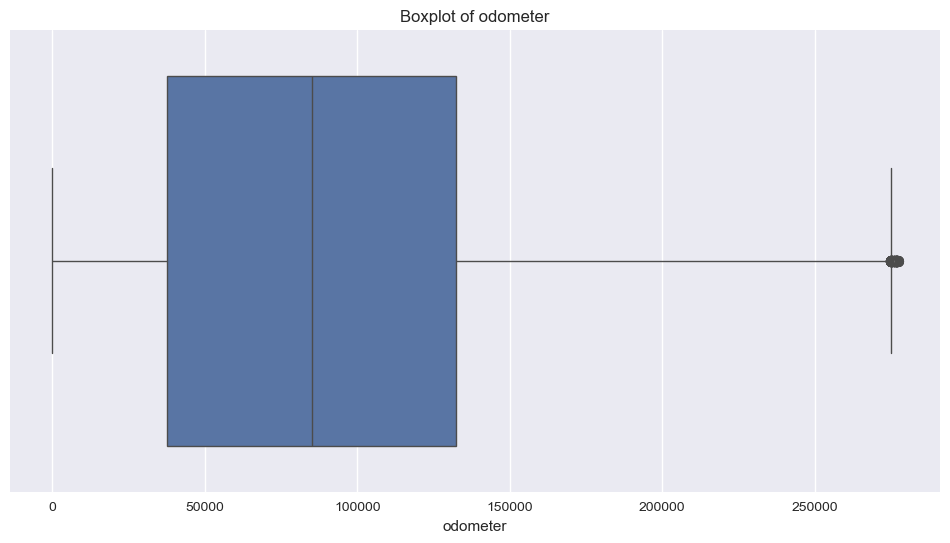

In [232]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers_dyn1['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('odometer')
plt.show()

##### Check dataframe

In [233]:
df_filled_empty_outliers_dyn1.head().T

,0,1,2,3,4
id,7316814884,7316814758,7316814989,7316743432,7316356412
region,auburn,auburn,auburn,auburn,auburn
price,33590.00,22590.00,39590.00,30990.00,15000.00
year,2014,2010,2020,2017,2013
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders
fuel,gas,gas,gas,gas,gas
odometer,57923.00,71229.00,19160.00,41124.00,128000.00


##### Check correlation

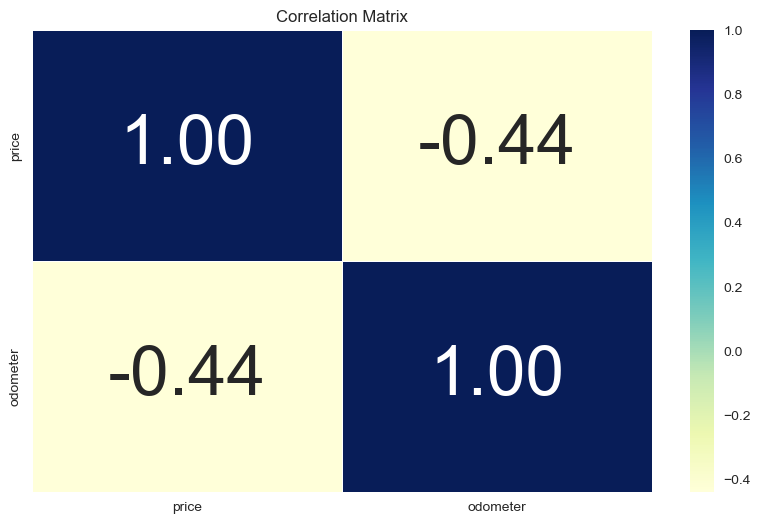

In [134]:
# Drop columns where any of the specified rows contain NaN values
df_temp_numeric = df_filled_empty_outliers_dyn1.drop(["id", "region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"], axis=1)

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu",
            annot=True)
plt.title('Correlation Matrix')
plt.show()

### Drop empty values and outliers

In [143]:
df_dropped_empty_outliers = df_temp_cleaned.copy()

In [234]:
df_dropped_empty_outliers

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.00,clean,other,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.00,clean,other,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.00,clean,other,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.00,clean,other,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.00,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.00,clean,other,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.00,clean,other,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.00,clean,other,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.00,clean,other,fwd,NaN,sedan,silver,wy


##### Get price lower & upper bounds (Q0 & Q4)

In [237]:
lower_bound_price, upper_bound_price = calculate_numerical_quartiles("price", df_dropped_empty_outliers)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -24986.5, Q1: 5900.0, Median: 13950.0, Q3: 26491.0, Upper bound: 57377.5


In [238]:
lower_bound_odometer, upper_bound_odometer = calculate_numerical_quartiles("odometer", df_dropped_empty_outliers)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -106053.75, Q1: 37704.0, Median: 85548.0, Q3: 133542.5, Upper bound: 277300.25


In [240]:
# Fill NaN values in the 'manufacturer' column with a placeholder
df_dropped_empty_outliers['manufacturer'] = df_dropped_empty_outliers['manufacturer'].fillna('Unknown')

# Drop rows where 'price' or 'odometer' is an outlier
df_dropped_empty_outliers = df_dropped_empty_outliers[
    (df_dropped_empty_outliers['price'] >= lower_bound_price) & (df_dropped_empty_outliers['price'] <= upper_bound_price) &
    (df_dropped_empty_outliers['odometer'] >= lower_bound_odometer) & (df_dropped_empty_outliers['odometer'] <= upper_bound_odometer)
]

In [241]:
df_dropped_empty_outliers

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.00,clean,other,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.00,clean,other,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.00,clean,other,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.00,clean,other,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.00,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.00,clean,other,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.00,clean,other,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.00,clean,other,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.00,clean,other,fwd,NaN,sedan,silver,wy


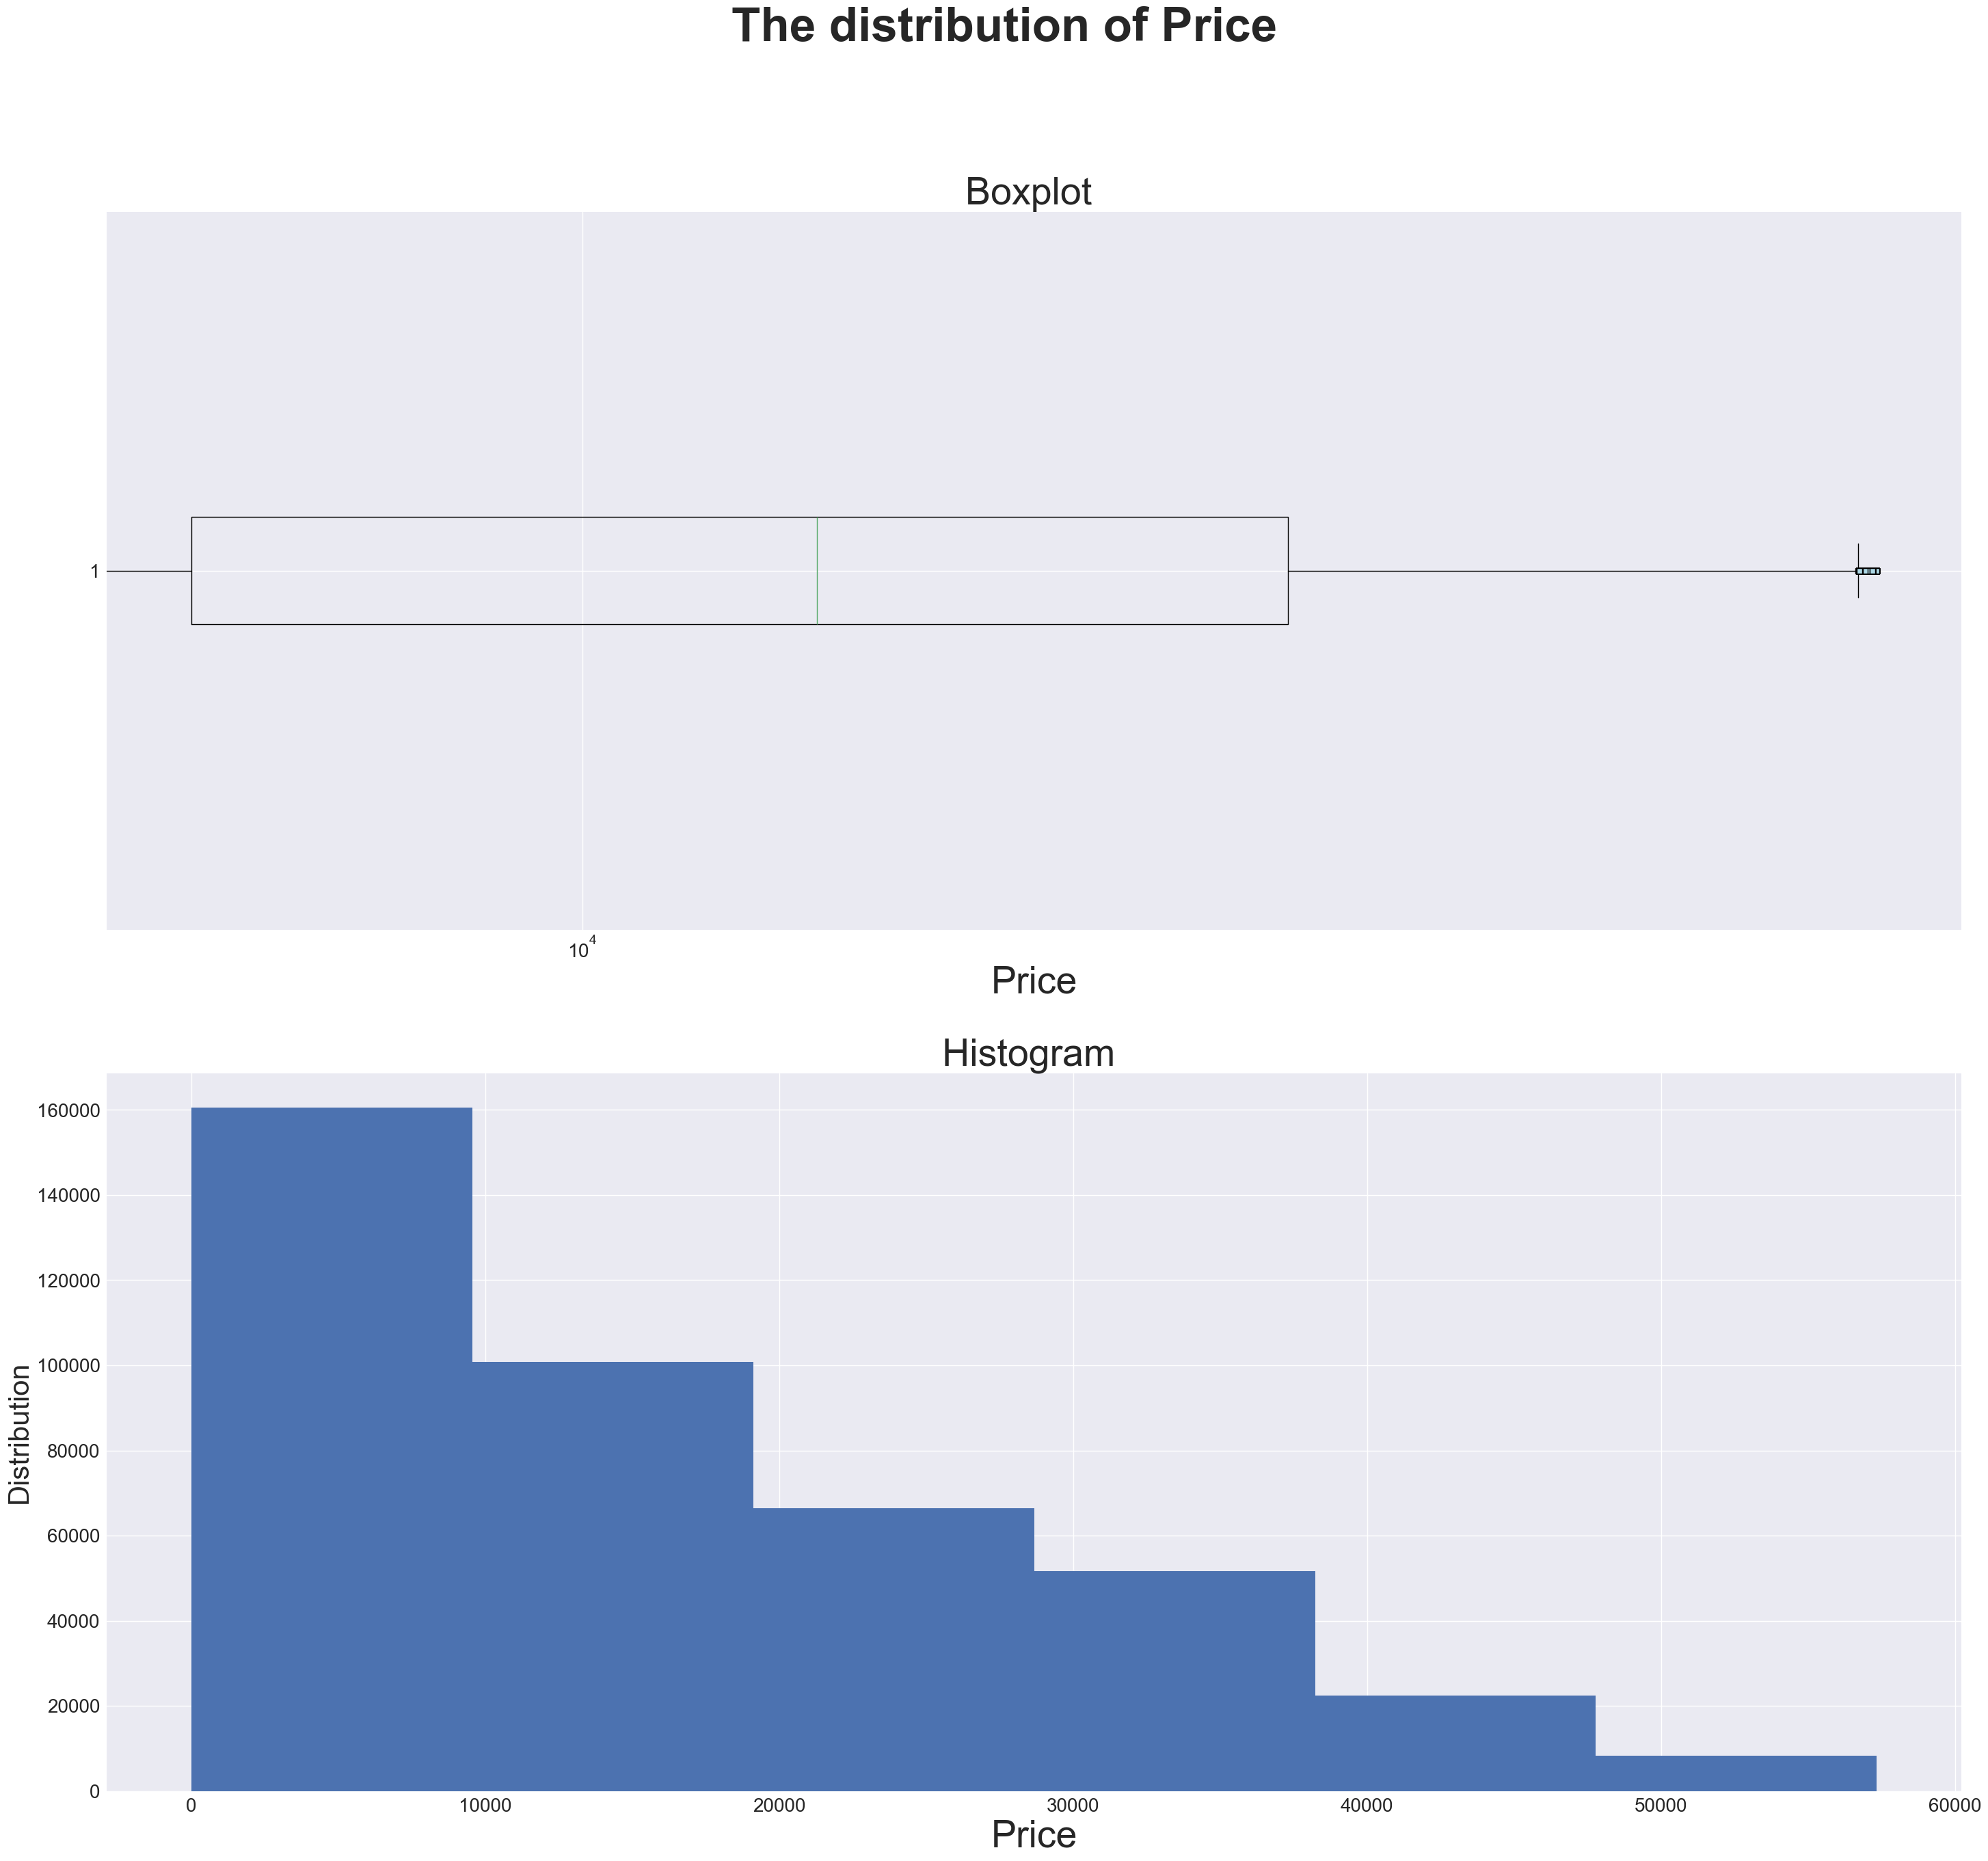

In [245]:
visualize_distribution(df_dropped_empty_outliers, "price", "Price", False)

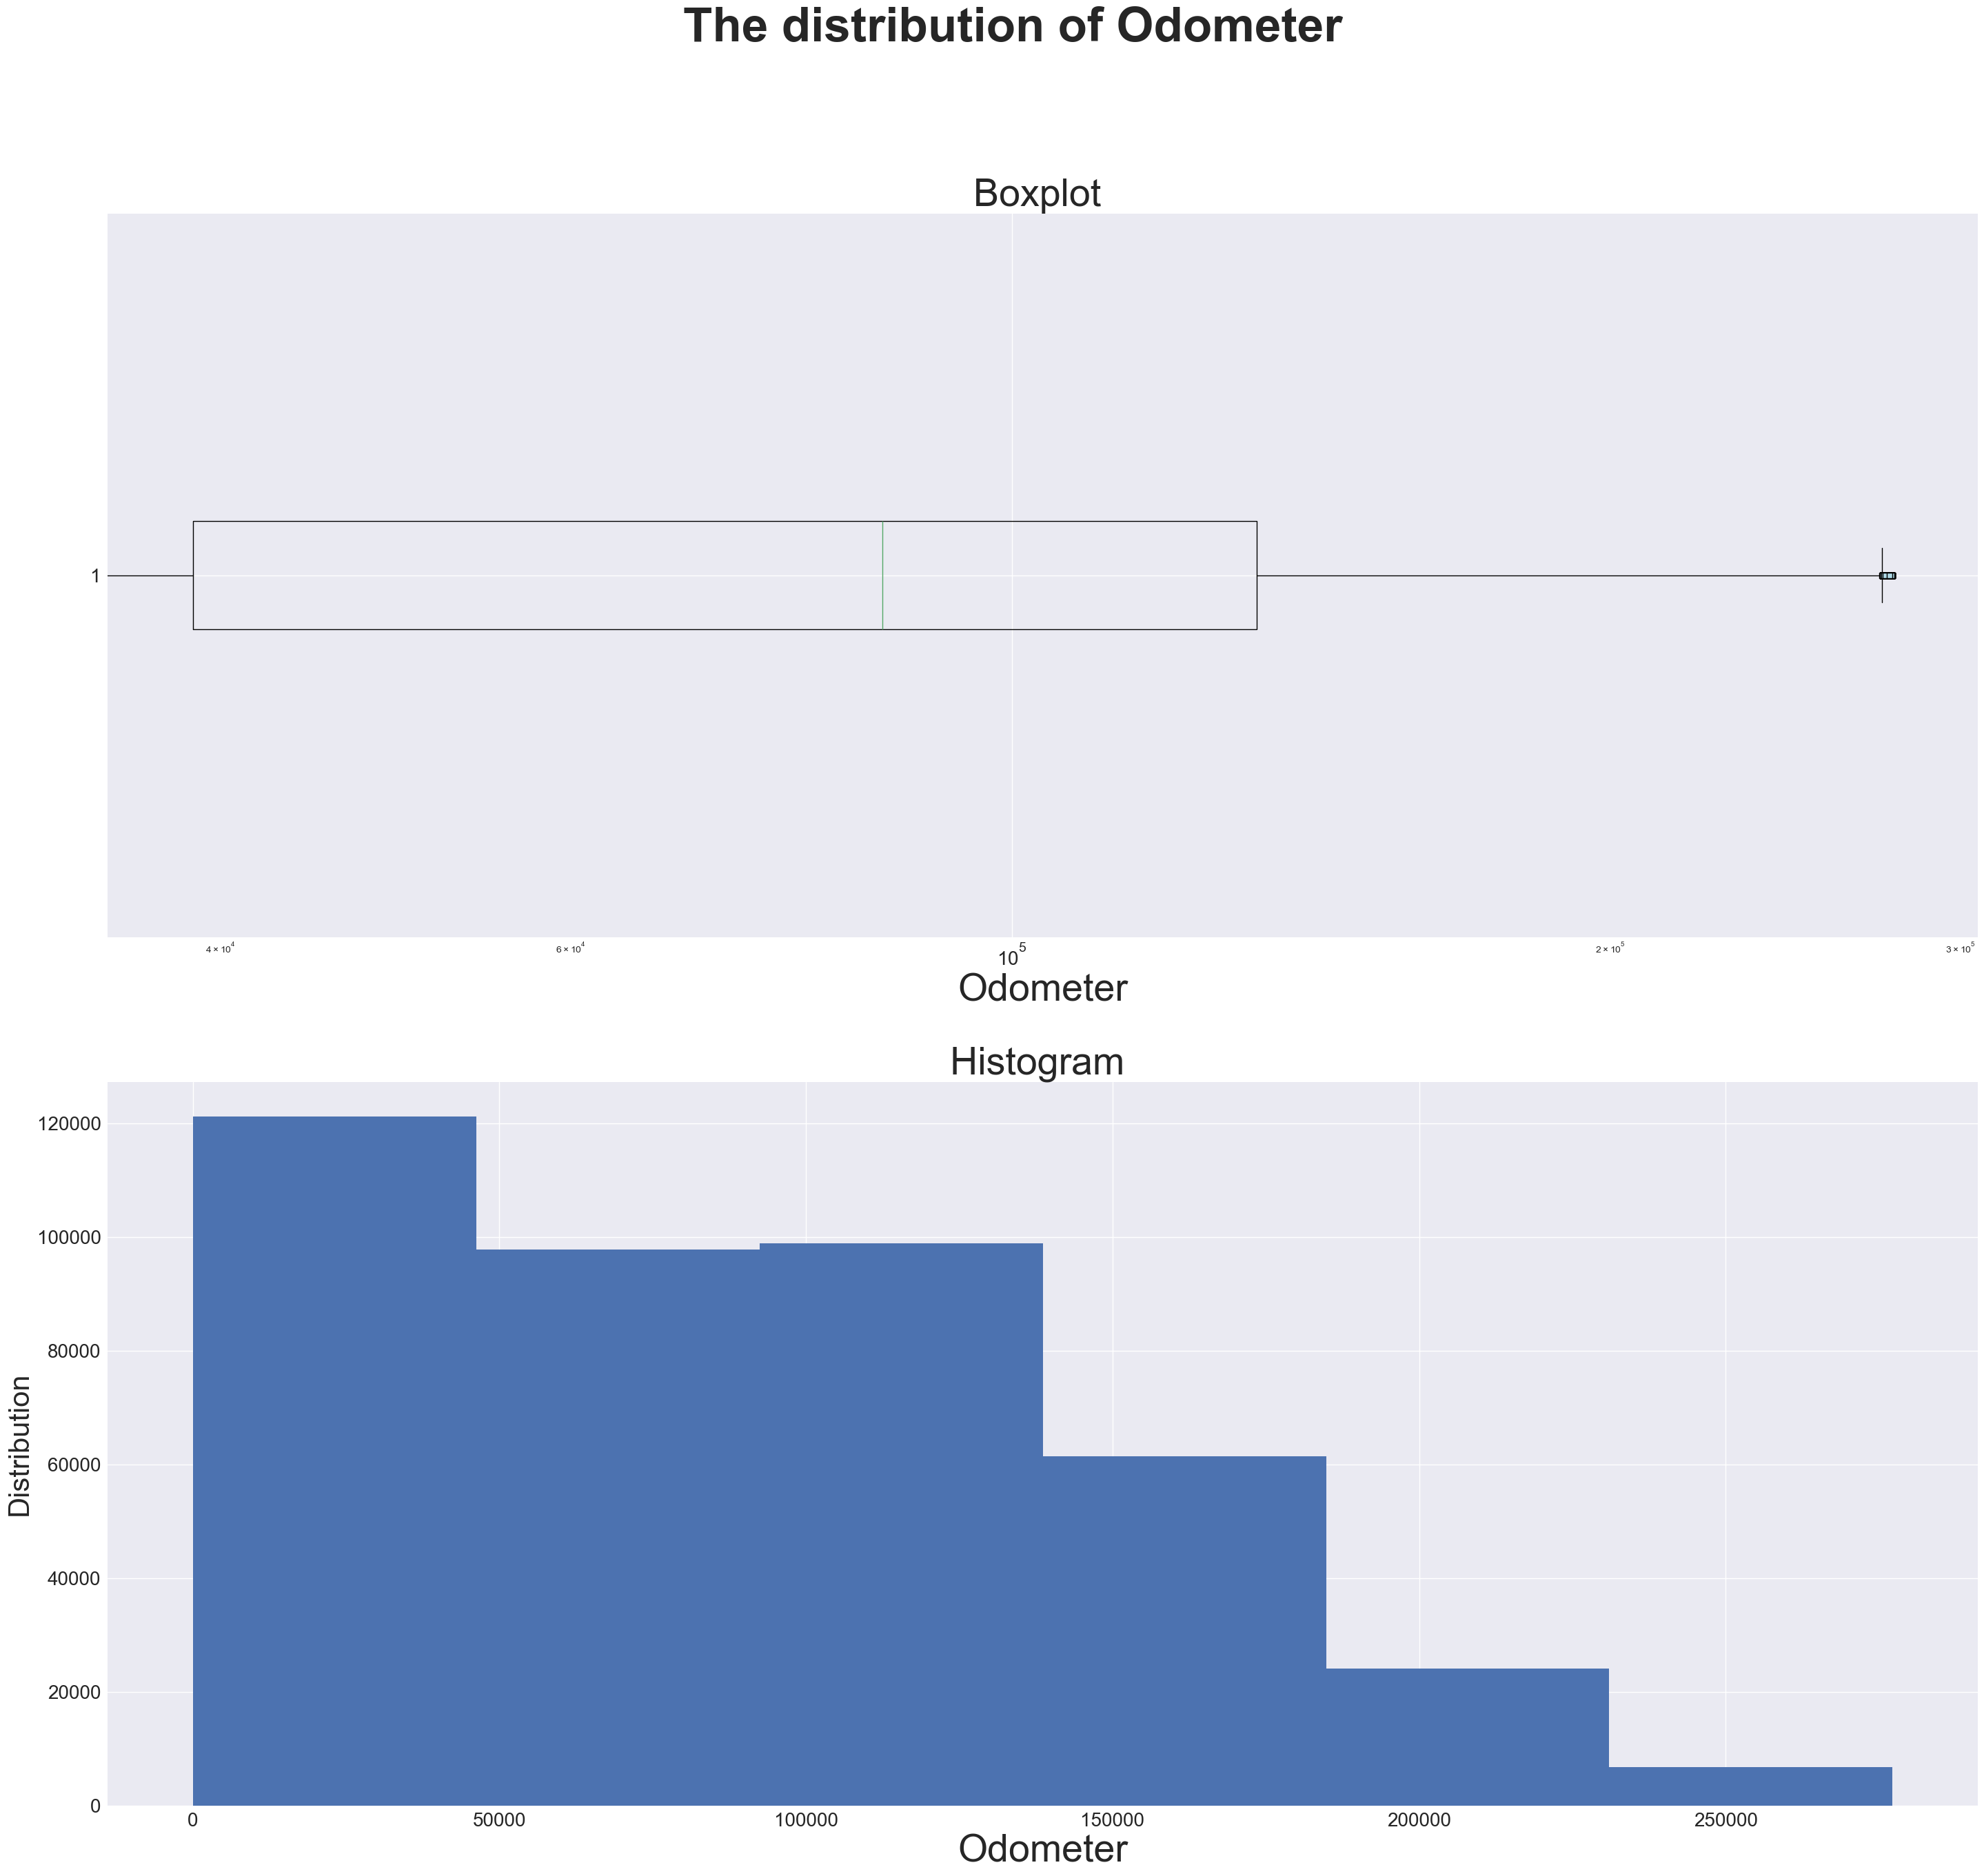

In [246]:
visualize_distribution(df_dropped_empty_outliers, "odometer", "Odometer", False)

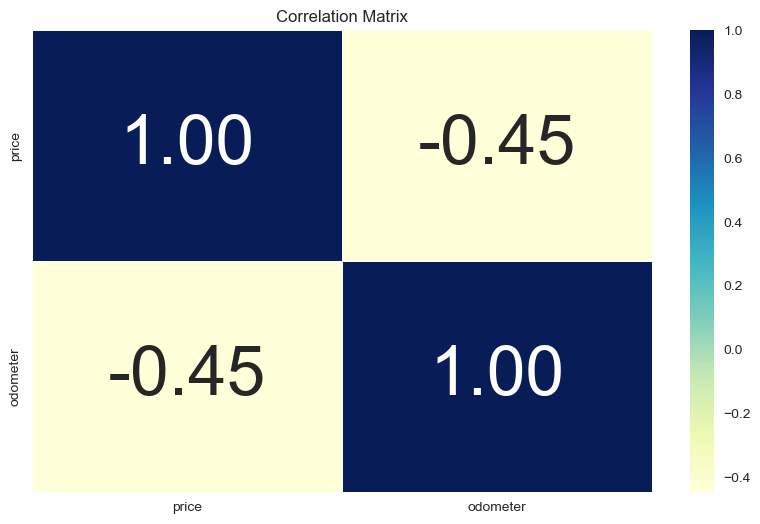

In [247]:
# Drop columns where any of the specified rows contain NaN values
df_temp_numeric = df_dropped_empty_outliers.drop(["id", "region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"], axis=1)

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu",
            annot=True)
plt.title('Correlation Matrix')
plt.show()

#### Turn categorical values into numbers & fill empty values

##### Check empty values

In [135]:
df_filled_empty_outliers_dyn.isna().sum()

id                   0
region               0
price                0
year                 0
manufacturer         0
model             5209
condition       174012
cylinders       177586
fuel              2921
odometer          4308
title_status      8150
transmission      2464
drive           130475
size            306269
type             92766
paint_color     130111
state                0
dtype: int64

In [136]:
# percentage of empty values
np.round(df_filled_empty_outliers_dyn.isnull().sum()/len(df_filled_empty_outliers_dyn)*100)

id              0.00
region          0.00
price           0.00
year            0.00
manufacturer    0.00
model           1.00
condition      41.00
cylinders      42.00
fuel            1.00
odometer        1.00
title_status    2.00
transmission    1.00
drive          31.00
size           72.00
type           22.00
paint_color    30.00
state           0.00
dtype: float64

##### Check if there is any non numerical columns

In [137]:
# Check if there is any non numerical values
for label, content in df_filled_empty_outliers_dyn.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

region
year
manufacturer
model
condition
cylinders
fuel
title_status
transmission
drive
size
type
paint_color
state


##### Turn categorical variables into numbers and fill missing

In [138]:
# Turn categorical variables into numbers and fill missing in df_filled_empty_outliers
for label, content in df_filled_empty_outliers.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column for rows with missing values
        df_filled_empty_outliers[label + "_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add 1
        df_filled_empty_outliers[label] = pd.Categorical(content).codes + 1

# Turn categorical variables into numbers and fill missing in df_filled_empty_outliers_dyn
for label, content in df_filled_empty_outliers_dyn.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column for rows with missing values
        df_filled_empty_outliers_dyn[label + "_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add 1
        df_filled_empty_outliers_dyn[label] = pd.Categorical(content).codes + 1

# Turn categorical variables into numbers and fill missing in df_filled_empty_outliers_dyn1
for label, content in df_filled_empty_outliers_dyn1.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column for rows with missing values
        df_filled_empty_outliers_dyn1[label + "_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add 1
        df_filled_empty_outliers_dyn1[label] = pd.Categorical(content).codes + 1

##### Check dataframes

In [139]:
df_filled_empty_outliers.head().T

,27,28,29,30,31
id,7316814884,7316814758,7316814989,7316743432,7316356412
region,17,17,17,17,17
price,33590.00,22590.00,39590.00,30990.00,15000.00
year,107,103,113,110,106
manufacturer,15,8,8,40,14
model,24354,24755,24802,27863,14526
condition,3,3,3,3,1
cylinders,7,7,7,7,6
fuel,3,3,3,3,3
odometer,57923.00,71229.00,19160.00,41124.00,128000.00


In [140]:
df_filled_empty_outliers_dyn.head().T

,27,28,29,30,31
id,7316814884,7316814758,7316814989,7316743432,7316356412
region,17,17,17,17,17
price,33590.00,22590.00,39590.00,30990.00,15000.00
year,107,103,113,110,106
manufacturer,16,9,9,41,15
model,24354,24755,24802,27863,14526
condition,3,3,3,3,1
cylinders,7,7,7,7,6
fuel,3,3,3,3,3
odometer,57923.00,71229.00,19160.00,41124.00,128000.00


##### Check correlation

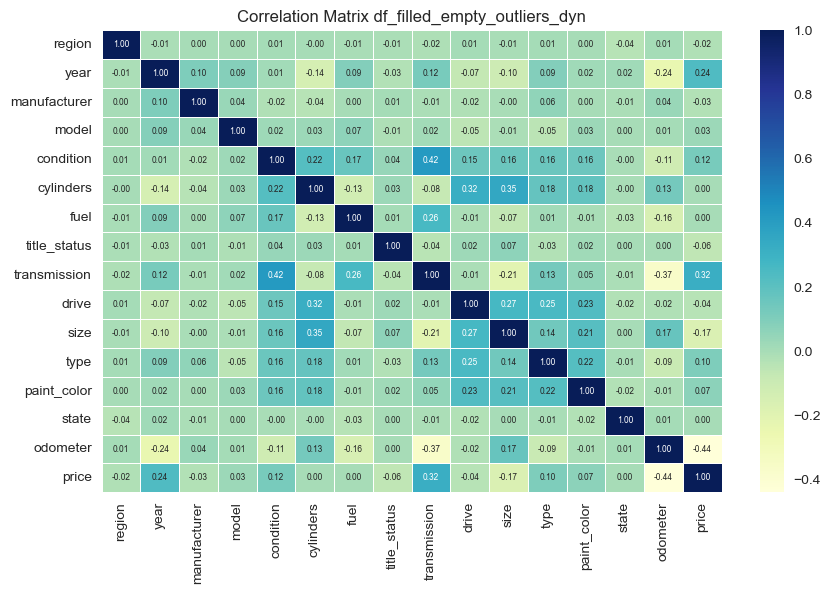

In [141]:
# Select numerical columns in df_filled_empty_outliers_dyn
df_temp_numeric = df_filled_empty_outliers_dyn[["region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state", "odometer", "price"]]

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu", 
            annot=True, 
            annot_kws={"size": 6})
plt.title('Correlation Matrix df_filled_empty_outliers_dyn')
plt.show()

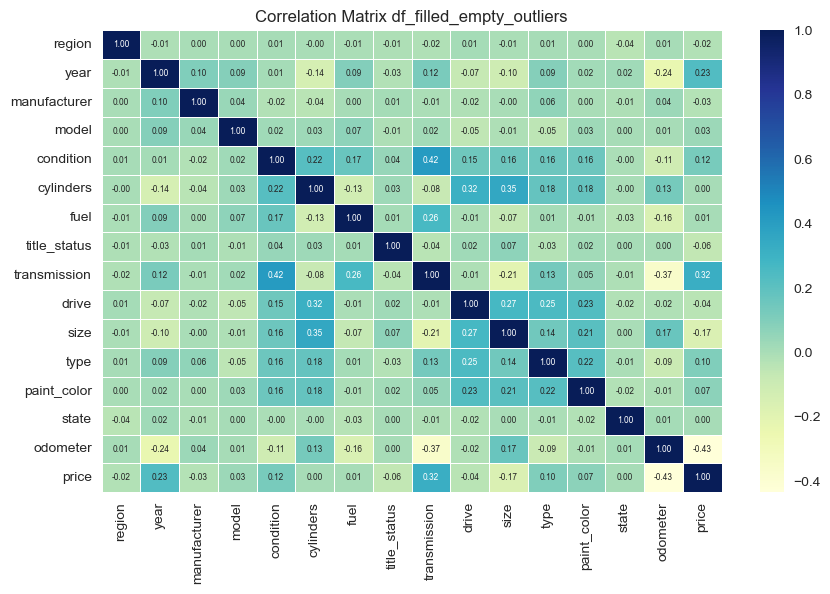

In [142]:
# Select numerical columns in df_filled_empty_outliers
df_temp_numeric = df_filled_empty_outliers[["region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state", "odometer", "price"]]

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu", 
            annot=True, 
            annot_kws={"size": 6})
plt.title('Correlation Matrix df_filled_empty_outliers')
plt.show()